In [584]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Učitavanje podataka

In [585]:
X = pd.read_csv("CBWDB.csv") #učitavanje podataka iz .csv datoteke

# Tipovi podataka i nedostajući podaci

Dtype - tipovi podataka u skupu, Non-Null Count ukazuje na nedostajuće podatke (1800 - NNC)

In [587]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SEC           1150 non-null   object 
 1   Age(years)    1786 non-null   float64
 2   Height(cm)    1527 non-null   float64
 3   Bgroup        798 non-null    object 
 4   Parity        1767 non-null   float64
 5   ANC           1781 non-null   float64
 6   Iwt(kg)       1751 non-null   float64
 7   FWt(kg)       1739 non-null   float64
 8   IBP_sys       1760 non-null   float64
 9   IBP_dias      1760 non-null   float64
 10  FBP_sys       1749 non-null   float64
 11  FBP_dias      1748 non-null   float64
 12  IHb(gm%)      1395 non-null   float64
 13  FHb(gm%)      1393 non-null   float64
 14  BS(RBS)       608 non-null    float64
 15  Term/Preterm  962 non-null    object 
 16  Sex           1142 non-null   object 
 17  BWt(kg)       1072 non-null   float64
 18  LNH           1072 non-null 

In [588]:
X.describe()

,Age(years),Height(cm),Parity,ANC,Iwt(kg),FWt(kg),IBP_sys,IBP_dias,FBP_sys,FBP_dias,IHb(gm%),FHb(gm%),BS(RBS),BWt(kg),LNH
count,1786.000000,1527.000000,1767.000000,1781.000000,1751.000000,1739.000000,1760.000000,1760.000000,1749.000000,1748.000000,1395.000000,1393.000000,608.000000,1072.000000,1072.000000
mean,22.986002,143.785855,0.667233,3.423358,45.749857,51.645371,108.032386,66.091477,111.819325,69.405606,9.919398,10.401651,100.898026,2.759580,1.871269
std,4.050843,19.702879,0.993277,0.889005,6.655457,6.905943,12.021658,8.263232,11.809435,9.249682,1.052058,0.989487,17.251874,0.430413,0.346026
min,8.000000,10.000000,0.000000,1.000000,30.000000,30.000000,10.000000,14.000000,10.000000,10.000000,6.000000,1.500000,12.000000,0.500000,1.000000
25%,20.000000,135.000000,0.000000,3.000000,41.000000,47.000000,100.000000,60.000000,110.000000,60.000000,9.200000,10.000000,93.000000,2.500000,2.000000
50%,22.000000,150.000000,0.000000,4.000000,45.000000,51.000000,110.000000,66.000000,110.000000,70.000000,10.000000,10.400000,100.000000,2.700000,2.000000
75%,25.000000,150.000000,1.000000,4.000000,50.000000,55.000000,112.000000,70.000000,120.000000,78.000000,10.600000,11.000000,109.000000,3.000000,2.000000
max,55.000000,195.000000,6.000000,4.000000,93.000000,100.000000,196.000000,100.000000,160.000000,117.000000,13.000000,13.200000,240.000000,4.500000,3.000000


Broj jedinstvenih vrijednosti stupca (monolitni atributi), u ovom slučaju ih nema (ni za jednu značajku ne vrijedi da svaki zapis ima jedinstvenu vrijednost):

In [589]:
X.nunique()

SEC              2
Age(years)      28
Height(cm)      59
Bgroup          13
Parity           7
ANC              4
Iwt(kg)         45
FWt(kg)         48
IBP_sys         59
IBP_dias        48
FBP_sys         55
FBP_dias        52
IHb(gm%)        55
FHb(gm%)        52
BS(RBS)         83
Term/Preterm     3
Sex              3
BWt(kg)         36
LNH              3
dtype: int64

Nedostajući podaci - prikazuju broj nedostajućih podataka

In [590]:
X.isna().sum()

SEC              650
Age(years)        14
Height(cm)       273
Bgroup          1002
Parity            33
ANC               19
Iwt(kg)           49
FWt(kg)           61
IBP_sys           40
IBP_dias          40
FBP_sys           51
FBP_dias          52
IHb(gm%)         405
FHb(gm%)         407
BS(RBS)         1192
Term/Preterm     838
Sex              658
BWt(kg)          728
LNH              728
dtype: int64

In [591]:
X.shape

(1800, 19)

In [592]:
X.head()

,SEC,Age(years),Height(cm),Bgroup,Parity,ANC,Iwt(kg),FWt(kg),IBP_sys,IBP_dias,FBP_sys,FBP_dias,IHb(gm%),FHb(gm%),BS(RBS),Term/Preterm,Sex,BWt(kg),LNH
0,BPL,23.0,146.0,A(+ve),1.0,4.0,34.0,42.0,116.0,78.0,120.0,70.0,10.0,13.2,90.0,T,F,2.7,2.0
1,BPL,25.0,165.0,NIL,1.0,3.0,68.0,71.0,96.0,70.0,110.0,72.0,10.4,11.0,96.0,T,M,2.9,2.0
2,BPL,24.0,155.0,B(+ve),1.0,3.0,49.0,55.0,91.0,52.0,110.0,70.0,11.0,11.6,102.0,T,M,2.4,1.0
3,BPL,19.0,154.0,NIL,1.0,2.0,49.0,50.0,90.0,52.0,100.0,60.0,10.0,10.6,103.0,T,F,2.6,2.0
4,BPL,21.0,150.0,NIL,1.0,4.0,41.0,48.0,100.0,60.0,110.0,70.0,9.0,10.2,99.0,T,F,2.3,1.0


In [593]:
X.columns.values #nazivi stupaca

array(['SEC', 'Age(years)', 'Height(cm)', 'Bgroup', 'Parity', 'ANC',
       'Iwt(kg)', 'FWt(kg)', 'IBP_sys', 'IBP_dias', 'FBP_sys', 'FBP_dias',
       'IHb(gm%)', 'FHb(gm%)', 'BS(RBS)', 'Term/Preterm', 'Sex',
       'BWt(kg)', 'LNH'], dtype=object)

# Nedostajući podaci 
Stvaranje novog skupa u kojem ćemo riješiti problem nedostajućih podataka:

In [595]:
X_tmp = X.copy()

# ubaci srednju vrijednost godina tamo gdje nedostaje ta informacija
X_tmp.loc[X_tmp['Age(years)'].isna(),'Age(years)'] = X_tmp.loc[:,'Age(years)'].mean()

# ubaci srednju vrijednost visine tamo gdje nedostaje ta informacija
X_tmp.loc[X_tmp['Height(cm)'].isna(),'Height(cm)'] = X_tmp.loc[:,'Height(cm)'].mean()

# ubaci srednju vrijednost broja prethodnoh trudnoća tamo gdje nedostaje ta informacija
X_tmp.loc[X_tmp['Parity'].isna(),'Parity'] = X_tmp.loc[:,'Parity'].mean()

# ubaci srednju vrijednost ANC-a tamo gdje nedostaje ta informacija
X_tmp.loc[X_tmp['ANC'].isna(),'ANC'] = X_tmp.loc[:,'ANC'].mean()

# ubaci srednju vrijednost početne mase majke tamo gdje nedostaje ta informacija
X_tmp.loc[X_tmp['Iwt(kg)'].isna(),'Iwt(kg)'] = X_tmp.loc[:,'Iwt(kg)'].mean()

# ubaci srednju vrijednost konačne visine majke tamo gdje nedostaje ta informacija
X_tmp.loc[X_tmp['FWt(kg)'].isna(),'FWt(kg)'] = X_tmp.loc[:,'FWt(kg)'].mean()

# ubaci srednju vrijednost početnog sistoličkog tlaka tamo gdje nedostaje ta informacija
X_tmp.loc[X_tmp['IBP_sys'].isna(),'IBP_sys'] = X_tmp.loc[:,'IBP_sys'].mean()

# ubaci srednju vrijednost početnog dijastoličkog tlaka tamo gdje nedostaje ta informacija
X_tmp.loc[X_tmp['IBP_dias'].isna(),'IBP_dias'] = X_tmp.loc[:,'IBP_dias'].mean()

# ubaci srednju vrijednost konačnog sistoličkog tlaka tamo gdje nedostaje ta informacija
X_tmp.loc[X_tmp['FBP_sys'].isna(),'FBP_sys'] = X_tmp.loc[:,'FBP_sys'].mean()

# ubaci srednju vrijednost konačnog dijastoličkog tlaka tamo gdje nedostaje ta informacija
X_tmp.loc[X_tmp['FBP_dias'].isna(),'FBP_dias'] = X_tmp.loc[:,'FBP_dias'].mean()

# ubaci srednju vrijednost početne razine hemoglobina tamo gdje nedostaje ta informacija
X_tmp.loc[X_tmp['IHb(gm%)'].isna(),'IHb(gm%)'] = X_tmp.loc[:,'IHb(gm%)'].mean()

# ubaci srednju vrijednost konačne razine hemoglobina tamo gdje nedostaje ta informacija
X_tmp.loc[X_tmp['FHb(gm%)'].isna(),'FHb(gm%)'] = X_tmp.loc[:,'FHb(gm%)'].mean()

# ubaci srednju vrijednost razine šećera u krvi tamo gdje nedostaje ta informacija
X_tmp.loc[X_tmp['BS(RBS)'].isna(),'BS(RBS)'] = X_tmp.loc[:,'BS(RBS)'].mean()

# ubaci srednju vrijednost bebine mase tamo gdje nedostaje ta informacija
X_tmp.loc[X_tmp['BWt(kg)'].isna(),'BWt(kg)'] = X_tmp.loc[:,'BWt(kg)'].mean()

# postavi LNH na noramlan tamo gdje nedostaje ta informacija
X_tmp.loc[X_tmp['LNH'].isna(),'LNH'] = 2.0

In [597]:
X_tmp.isna().sum()

SEC              650
Age(years)         0
Height(cm)         0
Bgroup          1002
Parity             0
ANC                0
Iwt(kg)            0
FWt(kg)            0
IBP_sys            0
IBP_dias           0
FBP_sys            0
FBP_dias           0
IHb(gm%)           0
FHb(gm%)           0
BS(RBS)            0
Term/Preterm     838
Sex              658
BWt(kg)            0
LNH                0
dtype: int64

Iz gornjeg ispisa vidimo kako nema više nedostajućih podataka.

# Nekonzistentni podaci

In [598]:
pd.crosstab(X_tmp['Bgroup'], X_tmp['Sex'])

Sex,F,M
Bgroup,,
A(+VE),2,1
A(+ve),46,63
A(-ve),0,1
AB(+ve),29,26
AB(-ve),0,1
B(+VE),0,4
B(+ve),95,73
B(-ve),2,0
B+(+ve),0,1


Iz gornjeg ispisa vidimo kako su podaci nekonzistentni, npr. oznake O(+VE) i O(+ve) su različite, ali se odnose na istu krvnu grupu.

In [599]:
#Podaci u bgroup su nekonzistentni pa ćemo taj stupac izbaciti
X_tmp.drop(('Bgroup'), axis=1, inplace = True)

In [600]:
X.drop(('Bgroup'), axis=1, inplace=True)

In [601]:
#izbacujemo nenumeričke značajke
#ako bismo izbacili te stupce, izgubilo bi se puno redaka
X_tmp.drop(('SEC'), axis=1, inplace=True)

In [602]:
X_tmp.drop(('Term/Preterm'), axis=1, inplace=True)

In [603]:
X_tmp.drop(('Sex'), axis=1, inplace=True)

In [604]:
X_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age(years)  1800 non-null   float64
 1   Height(cm)  1800 non-null   float64
 2   Parity      1800 non-null   float64
 3   ANC         1800 non-null   float64
 4   Iwt(kg)     1800 non-null   float64
 5   FWt(kg)     1800 non-null   float64
 6   IBP_sys     1800 non-null   float64
 7   IBP_dias    1800 non-null   float64
 8   FBP_sys     1800 non-null   float64
 9   FBP_dias    1800 non-null   float64
 10  IHb(gm%)    1800 non-null   float64
 11  FHb(gm%)    1800 non-null   float64
 12  BS(RBS)     1800 non-null   float64
 13  BWt(kg)     1800 non-null   float64
 14  LNH         1800 non-null   float64
dtypes: float64(15)
memory usage: 211.1 KB


In [499]:
#Provjera značajki koje jako odskaču (Parity i BS)
print('Parity 0: ', (X.Parity ==  0).sum())
print('Parity 1: ', (X.Parity == 1).sum())
print('Parity 2: ', (X.Parity == 2).sum())
print('Parity 3: ', (X.Parity == 3).sum())
print('Parity 4: ', (X.Parity  == 4).sum())
print('Parity 5: ', (X.Parity  == 5).sum())
print('Parity 6: ', (X.Parity  == 6).sum())

Parity 0:  1067
Parity 1:  366
Parity 2:  225
Parity 3:  84
Parity 4:  18
Parity 5:  3
Parity 6:  4


In [500]:
print('BS 0: ', (X['BS(RBS)'] <  20).sum())
print('BS 1: ', (X['BS(RBS)'] < 40).sum())
print('BS 2: ', (X['BS(RBS)'] < 60).sum())
print('BS 3: ', (X['BS(RBS)'] < 80).sum())
print('BS 4: ', (X['BS(RBS)'] < 100).sum())
print('BS 5: ', (X['BS(RBS)']  > 100).sum())
print('BS 5: ', (X['BS(RBS)']  > 120).sum())
print('BS 5: ', (X['BS(RBS)']  > 140).sum())
print('BS 5: ', (X['BS(RBS)']  > 160).sum())

BS 0:  1
BS 1:  1
BS 2:  9
BS 3:  56
BS 4:  285
BS 5:  301
BS 5:  76
BS 5:  6
BS 5:  1


In [501]:
#gdje je BS > 160 i koliko iznosi
X_tmp.loc[X['BS(RBS)'] > 160, 'BS(RBS)']

1578    240.0
Name: BS(RBS), dtype: float64

In [502]:
X[['Sex', 'BWt(kg)']].groupby(['Sex'], as_index=False).mean() #prosječna masa bebe po spolovima

,Sex,BWt(kg)
0,F,2.74073
1,M,2.76471
2,T,3.00000


In [503]:
X[['Age(years)', 'BWt(kg)']].groupby(['Age(years)'], as_index=False).mean() #prosječna masa bebe po dobi majke

,Age(years),BWt(kg)
0,8.0,2.900000
1,13.0,3.000000
2,14.0,3.000000
3,15.0,2.680000
4,16.0,2.642857
5,17.0,2.615385
6,18.0,2.671250
7,19.0,2.716495
8,20.0,2.710995
9,21.0,2.822500


# Transformacija u numerički oblik

In [605]:
le = LabelEncoder()# inicijalizacija enkodera

le.fit(X.loc[:,'Sex'])
X.loc[:,'Sex'] = le.transform(X.loc[:,'Sex']) #Transformiramo Sex u numerički oblik

C:\Users\muha\AppData\Local\Temp\ipykernel_14308\4066657769.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:,'Sex'] = le.transform(X.loc[:,'Sex']) #Transformiramo Sex u numerički oblik


In [607]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SEC           1150 non-null   object 
 1   Age(years)    1786 non-null   float64
 2   Height(cm)    1527 non-null   float64
 3   Parity        1767 non-null   float64
 4   ANC           1781 non-null   float64
 5   Iwt(kg)       1751 non-null   float64
 6   FWt(kg)       1739 non-null   float64
 7   IBP_sys       1760 non-null   float64
 8   IBP_dias      1760 non-null   float64
 9   FBP_sys       1749 non-null   float64
 10  FBP_dias      1748 non-null   float64
 11  IHb(gm%)      1395 non-null   float64
 12  FHb(gm%)      1393 non-null   float64
 13  BS(RBS)       608 non-null    float64
 14  Term/Preterm  962 non-null    object 
 15  Sex           1800 non-null   int32  
 16  BWt(kg)       1072 non-null   float64
 17  LNH           1072 non-null   float64
dtypes: float64(15), int32(1), ob

Sada vidimo kako je Sex numerički tip (int32)

In [608]:
# izbaci nenumeričke stupce - ~ u ovom slučaju označava "not", odnosno uvjet bi se čitao kao "columns not in ['Name', ...]"
X_tmp = X.loc[:, ~X.columns.isin(['SEC', 'Bgroup', 'Term/Preterm'])].copy()

In [609]:
X[['Sex', 'LNH']].groupby(['Sex'], as_index=False).mean() #prikaži LNH po spolovima

,Sex,LNH
0,0,1.857988
1,1,1.880435
2,2,2.000000
3,3,2.000000


# Korelacija između značajki

In [610]:
X.corr()#korelacija između značajki

C:\Users\muha\AppData\Local\Temp\ipykernel_14308\3534773216.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X.corr()#korelacija između značajki


,Age(years),Height(cm),Parity,ANC,Iwt(kg),FWt(kg),IBP_sys,IBP_dias,FBP_sys,FBP_dias,IHb(gm%),FHb(gm%),BS(RBS),Sex,BWt(kg),LNH
Age(years),1.000000,0.061033,0.448672,-0.089195,0.170195,0.113066,0.013399,0.031618,0.046229,0.020746,-0.030927,-0.060675,0.011784,0.046342,0.073071,0.034462
Height(cm),0.061033,1.000000,0.104427,-0.213399,0.103605,0.007118,0.076279,0.057372,-0.031131,-0.108708,0.070344,0.058683,-0.051602,0.120412,-0.071014,-0.102590
Parity,0.448672,0.104427,1.000000,-0.088080,-0.001824,-0.019441,0.049557,-0.024786,0.036944,-0.056306,-0.165706,-0.181310,-0.075471,0.079942,-0.064057,-0.011550
ANC,-0.089195,-0.213399,-0.088080,1.000000,-0.027581,0.263808,-0.099286,0.013002,0.125052,0.235470,0.076418,0.196163,0.200209,-0.401663,0.098156,0.104689
Iwt(kg),0.170195,0.103605,-0.001824,-0.027581,1.000000,0.732256,0.223809,0.146812,0.149376,0.025881,0.124966,0.112364,0.047144,0.022536,0.145048,0.005831
FWt(kg),0.113066,0.007118,-0.019441,0.263808,0.732256,1.000000,0.138358,0.132900,0.173691,0.115133,0.127126,0.198401,0.117125,-0.159813,0.214921,0.053956
IBP_sys,0.013399,0.076279,0.049557,-0.099286,0.223809,0.138358,1.000000,0.186138,0.220302,-0.077118,-0.017729,-0.035925,-0.035264,0.172751,0.003806,-0.007500
IBP_dias,0.031618,0.057372,-0.024786,0.013002,0.146812,0.132900,0.186138,1.000000,0.052194,0.342611,0.109019,0.062426,0.047130,0.005747,-0.034488,-0.031657
FBP_sys,0.046229,-0.031131,0.036944,0.125052,0.149376,0.173691,0.220302,0.052194,1.000000,0.256926,-0.052328,-0.032008,0.057494,0.045118,0.093408,0.070955
FBP_dias,0.020746,-0.108708,-0.056306,0.235470,0.025881,0.115133,-0.077118,0.342611,0.256926,1.000000,0.093974,0.074937,0.142946,-0.167595,0.067690,0.042320


# Vizualizacija podataka

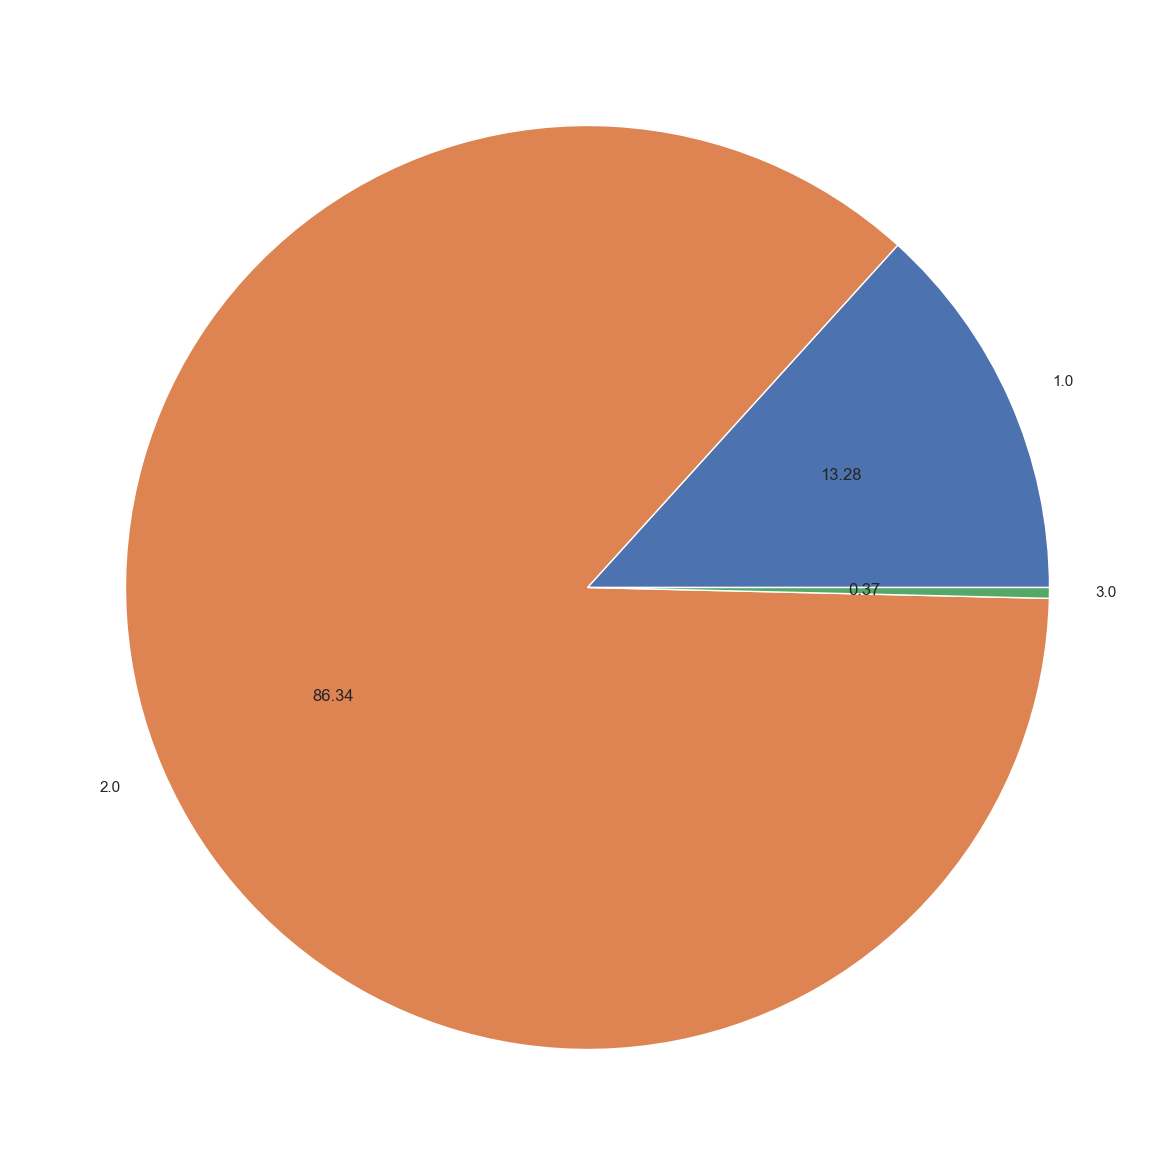

In [612]:
#Prikaz značajke LNH
count_per_LNH = X.groupby('LNH').count().loc[:,'Age(years)'].values
title_name = X.groupby('LNH').count().index.values

plt.pie(count_per_LNH, labels=title_name, autopct='%.2f')
plt.show()

Na dobivenom grafu vidimo kako 86.34% beba ima normalnu težinu, 13.28% maju od normalne i 0.37% veću od normalne.

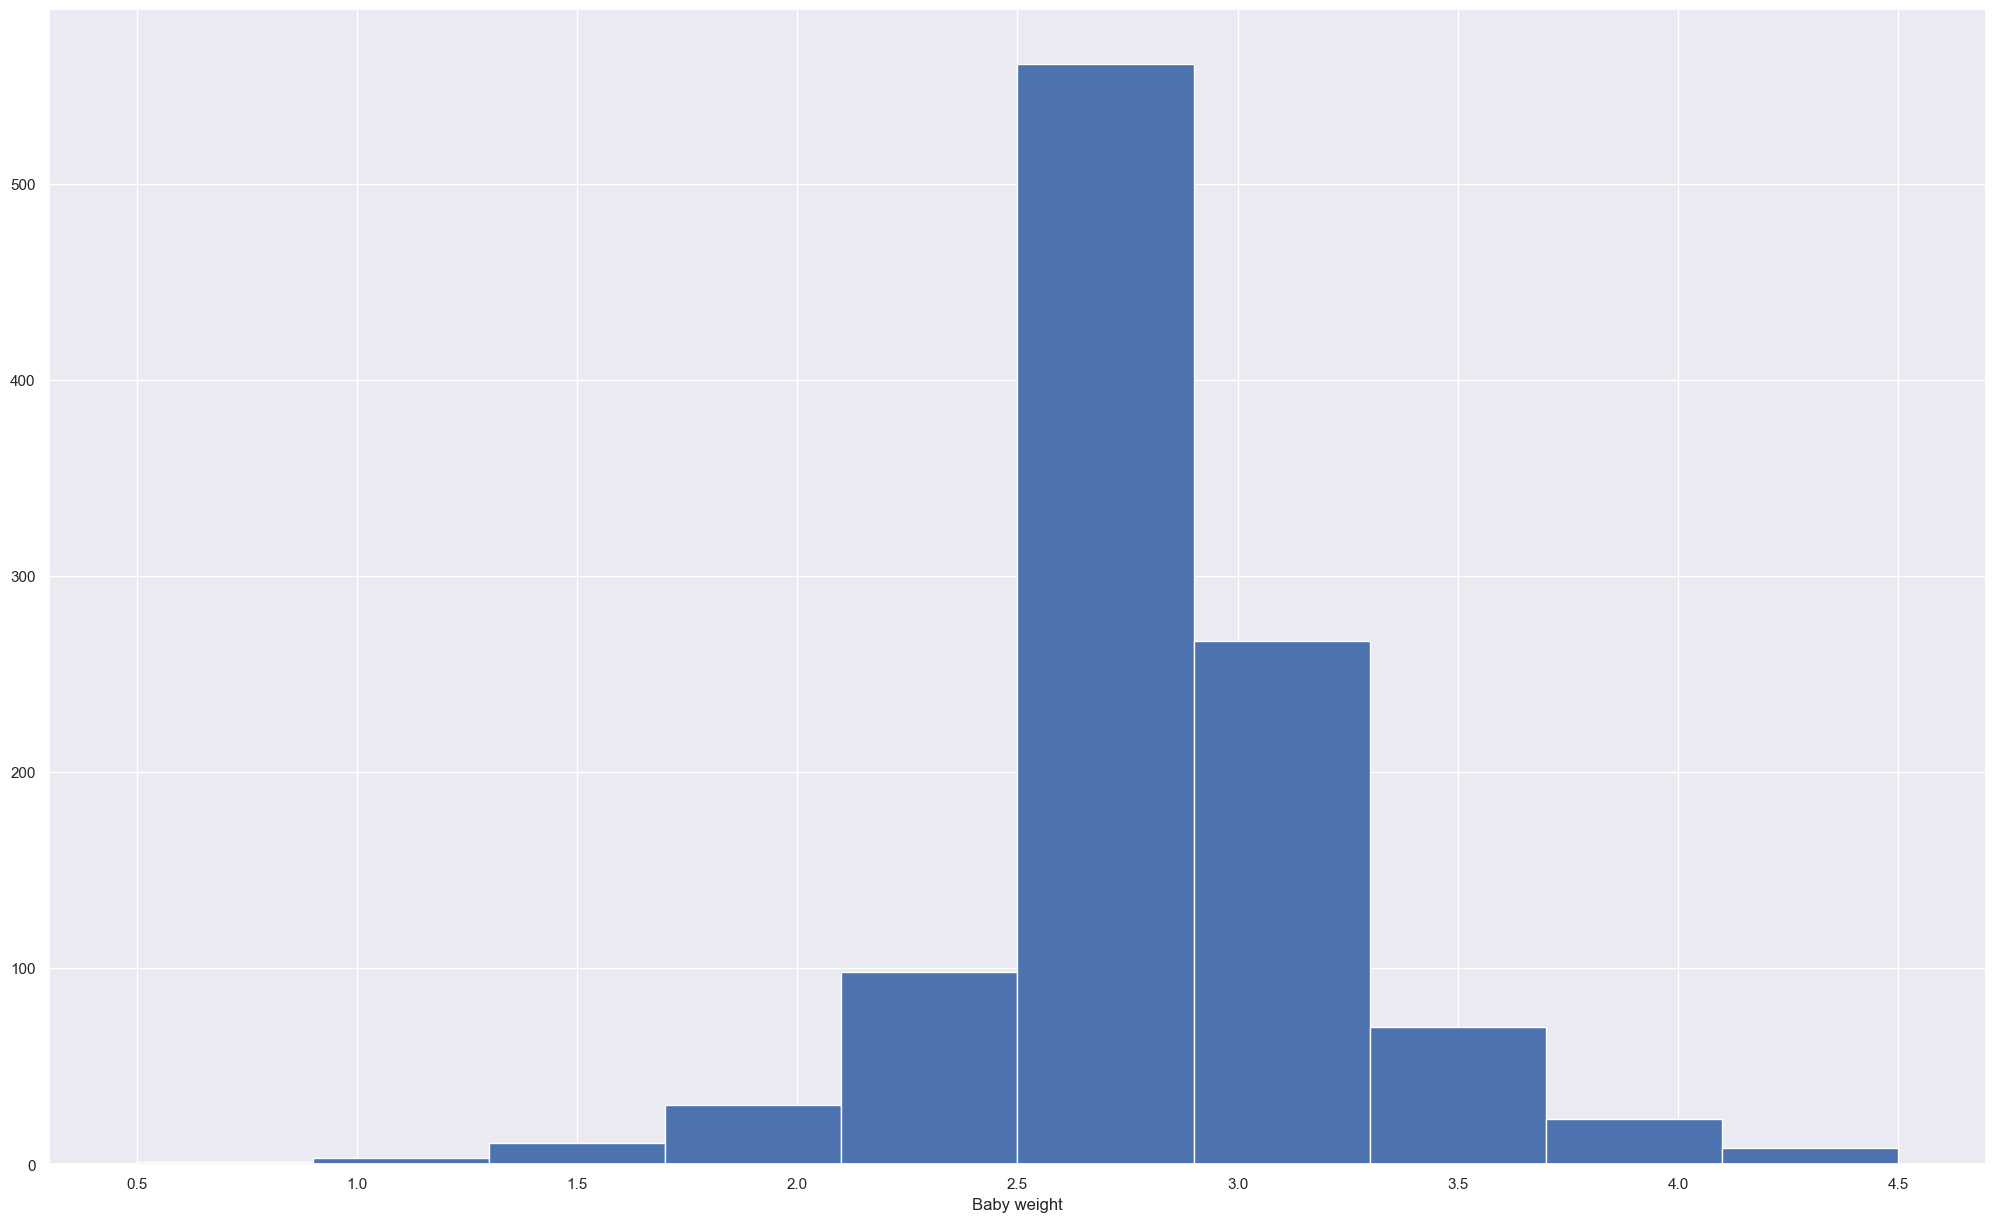

In [613]:
#Distribucija značajke BWt pomoću histograma
plt.hist(X['BWt(kg)'])
plt.xlabel('Baby weight')
plt.show()

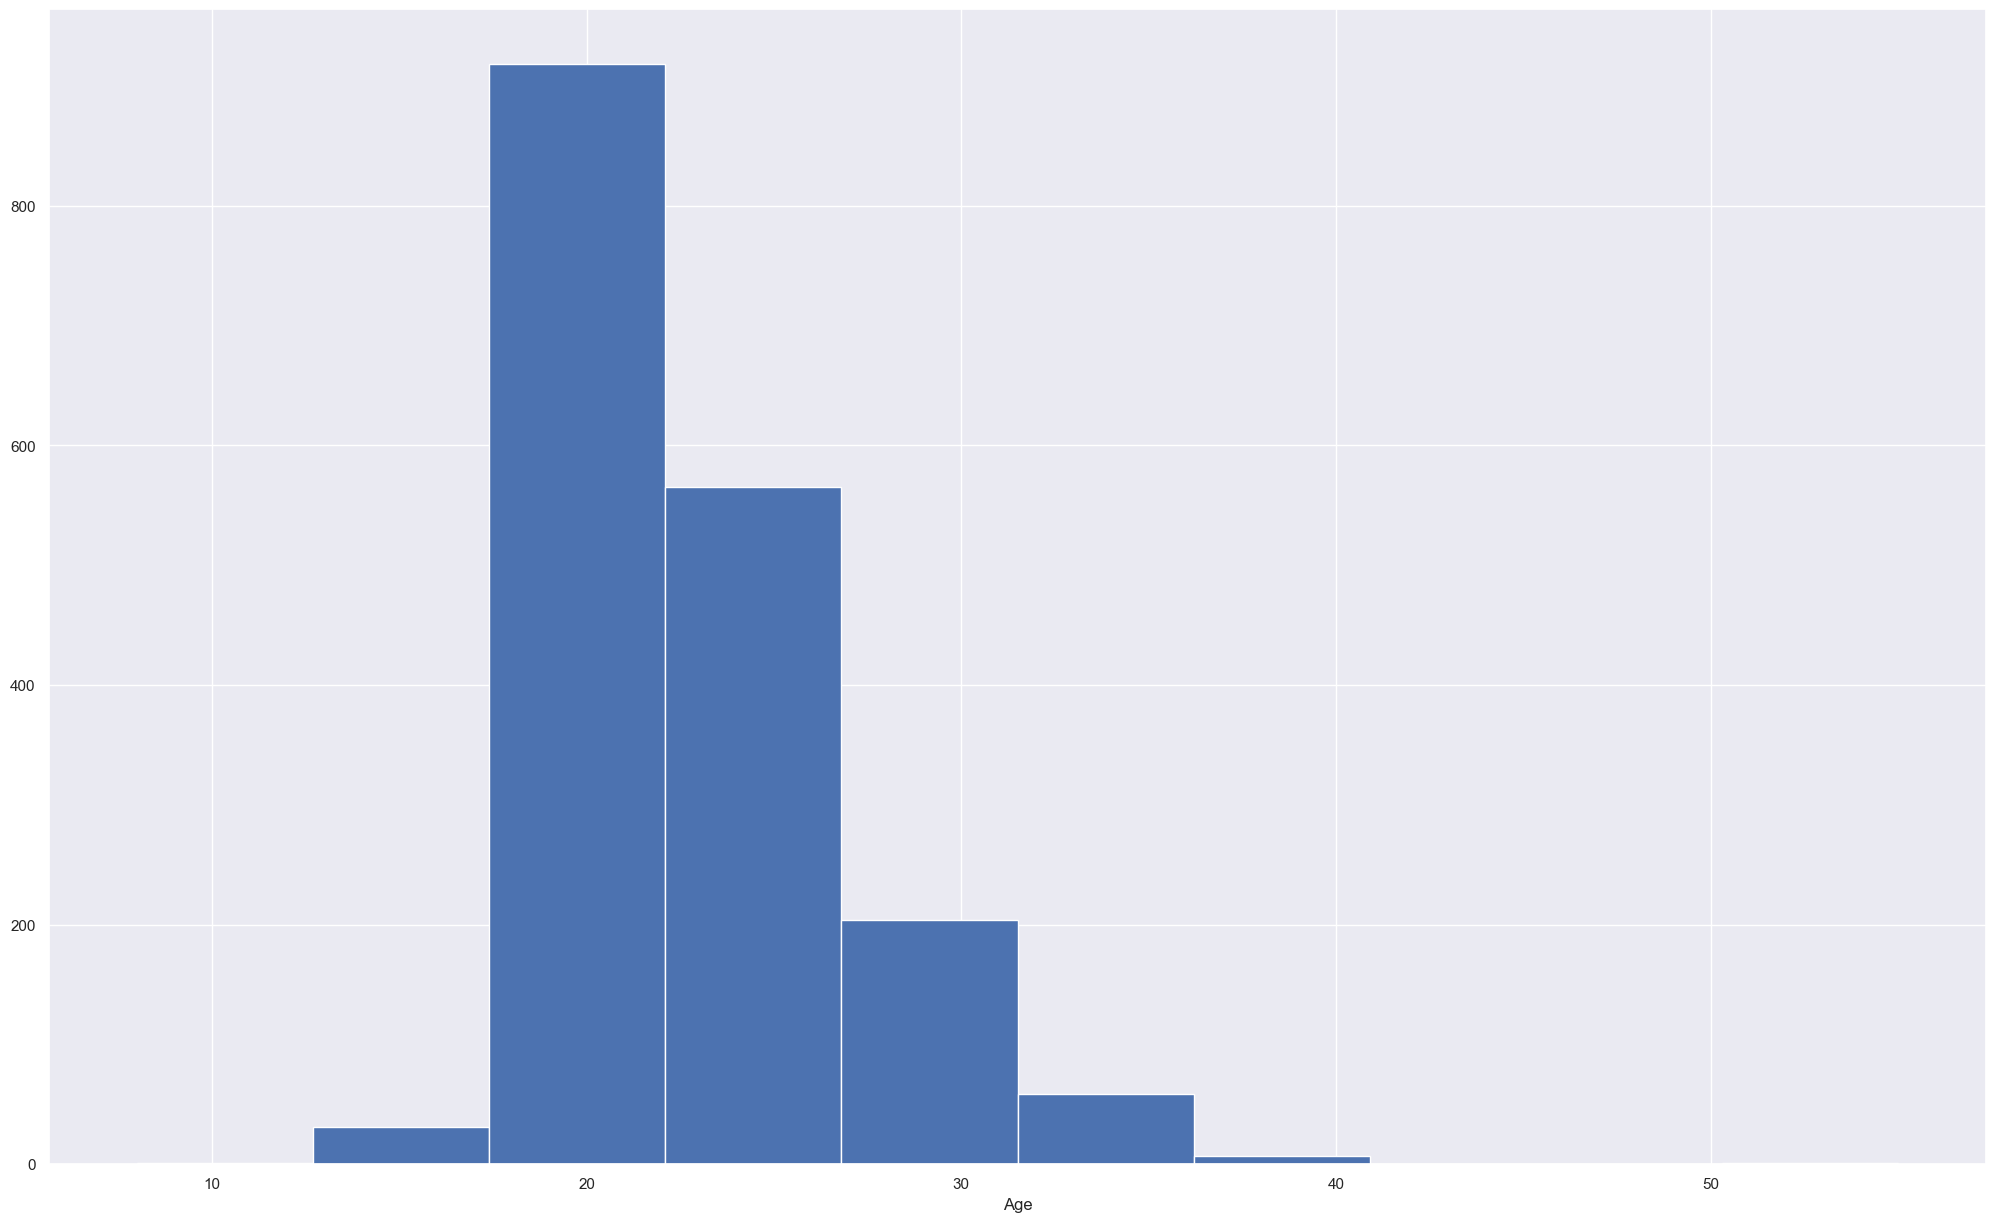

In [614]:
#Distribucija značajke Age pomoću histograma
plt.hist(X['Age(years)'])
plt.xlabel('Age')
plt.show()

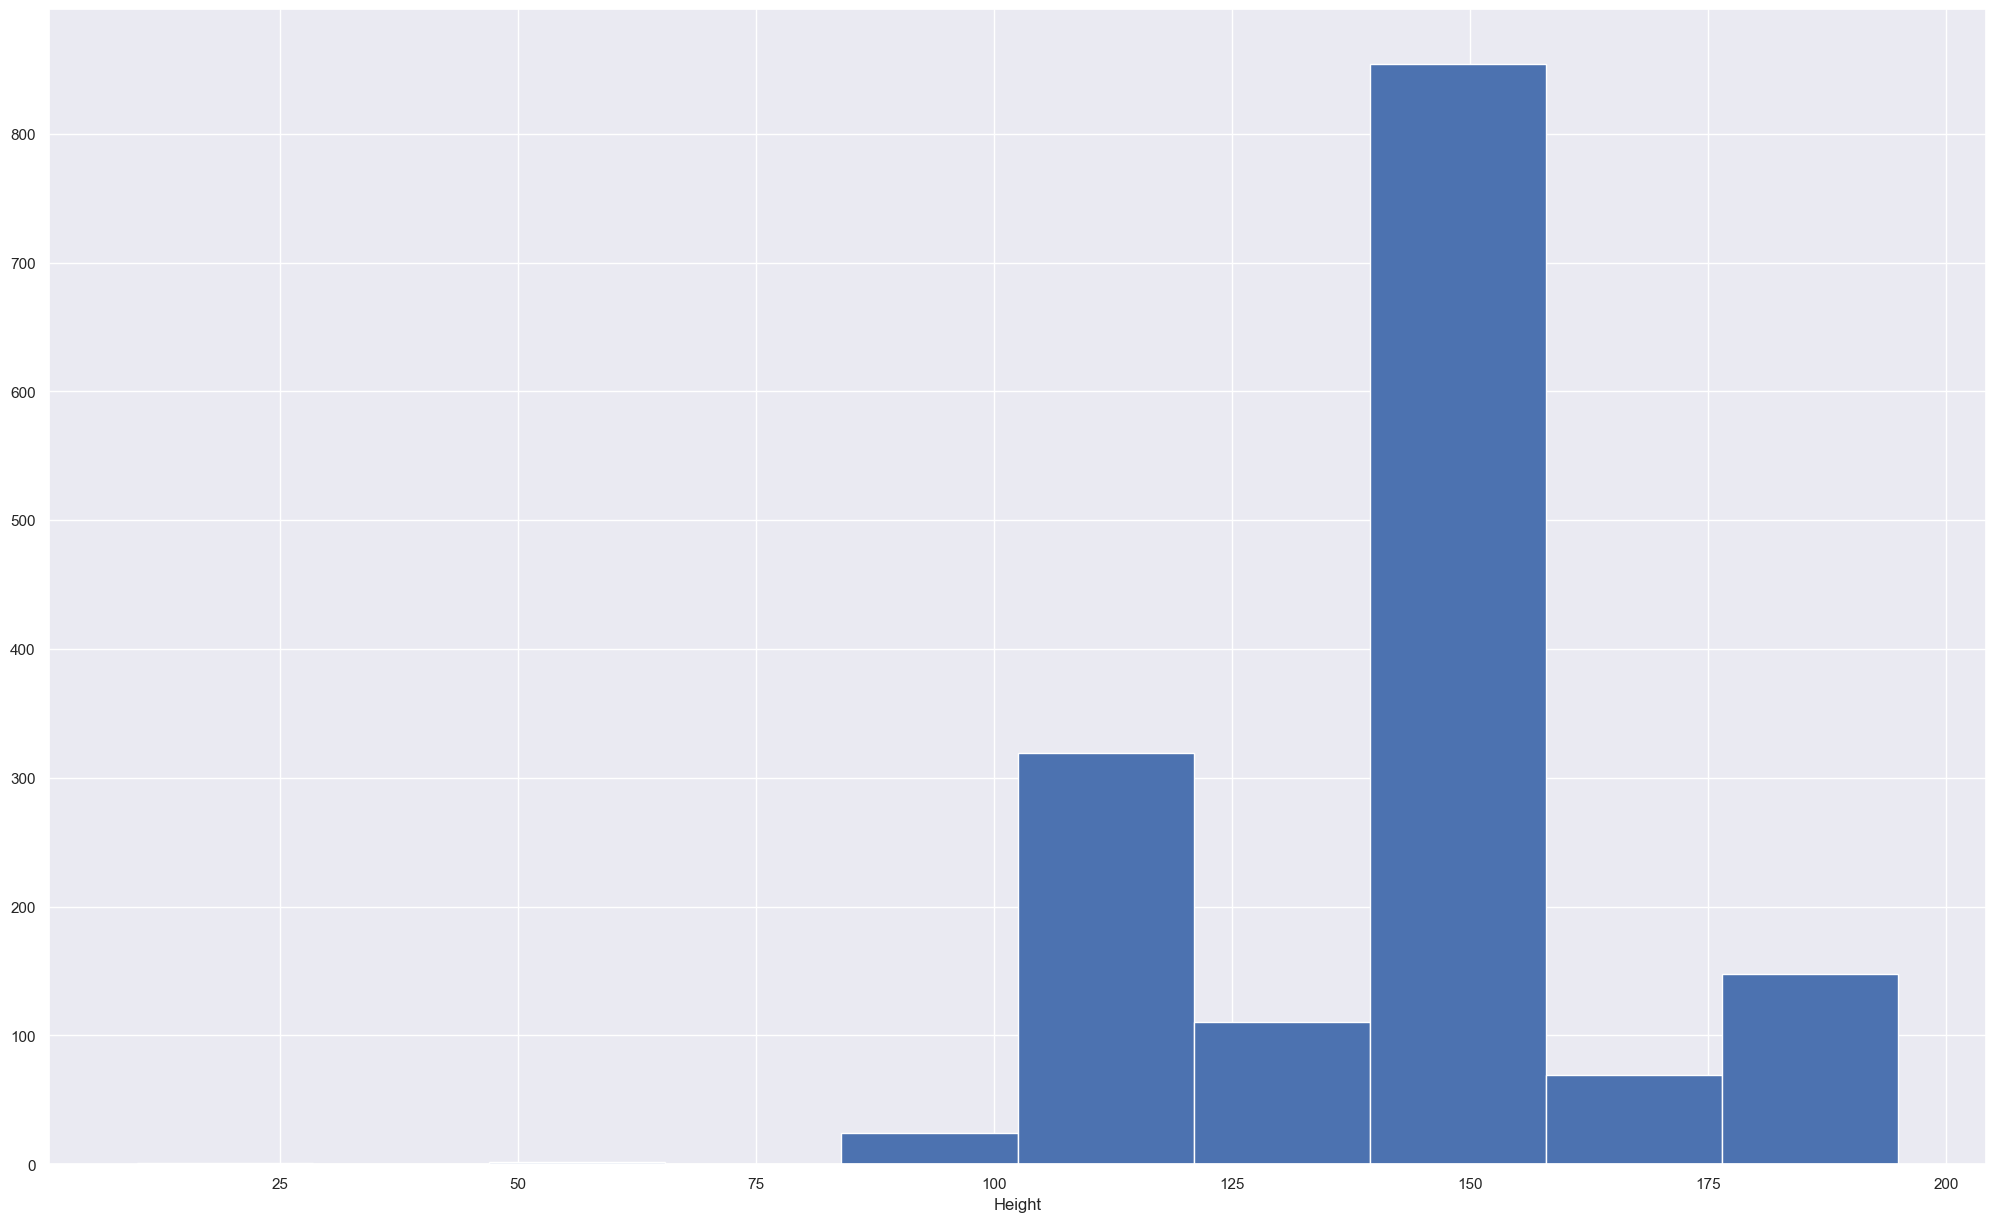

In [615]:
#Distribucija značajke Height pomoću histograma
plt.hist(X['Height(cm)'])
plt.xlabel('Height')
plt.show()

Iz prethodna tri histograma vidimo kako težina bebe, dob i visina majke imaju normalnu distribuciju.

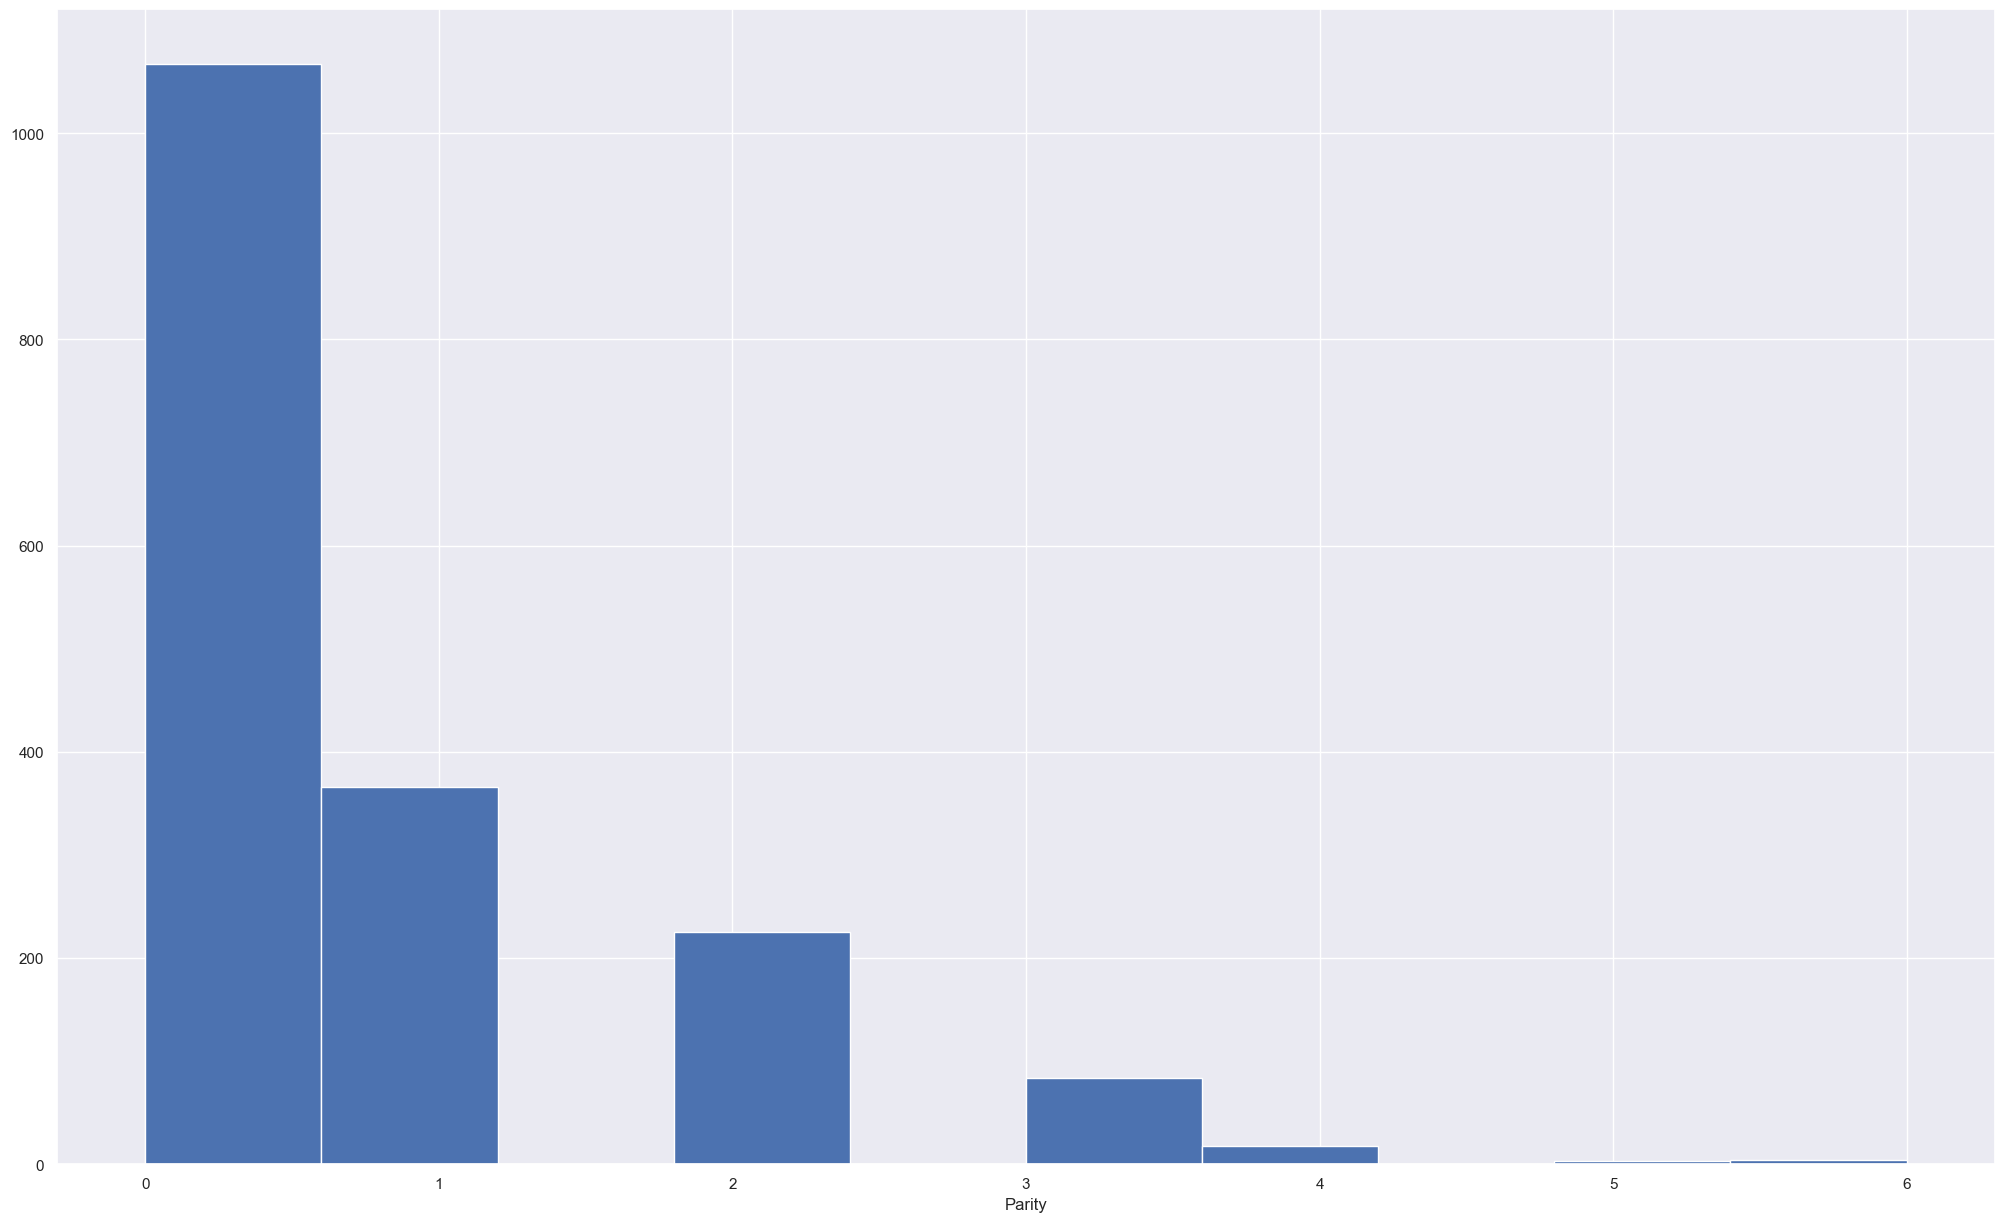

In [617]:
#Distribucija značajke Parity pomoću histograma
plt.hist(X['Parity'])
plt.xlabel('Parity')
plt.show()

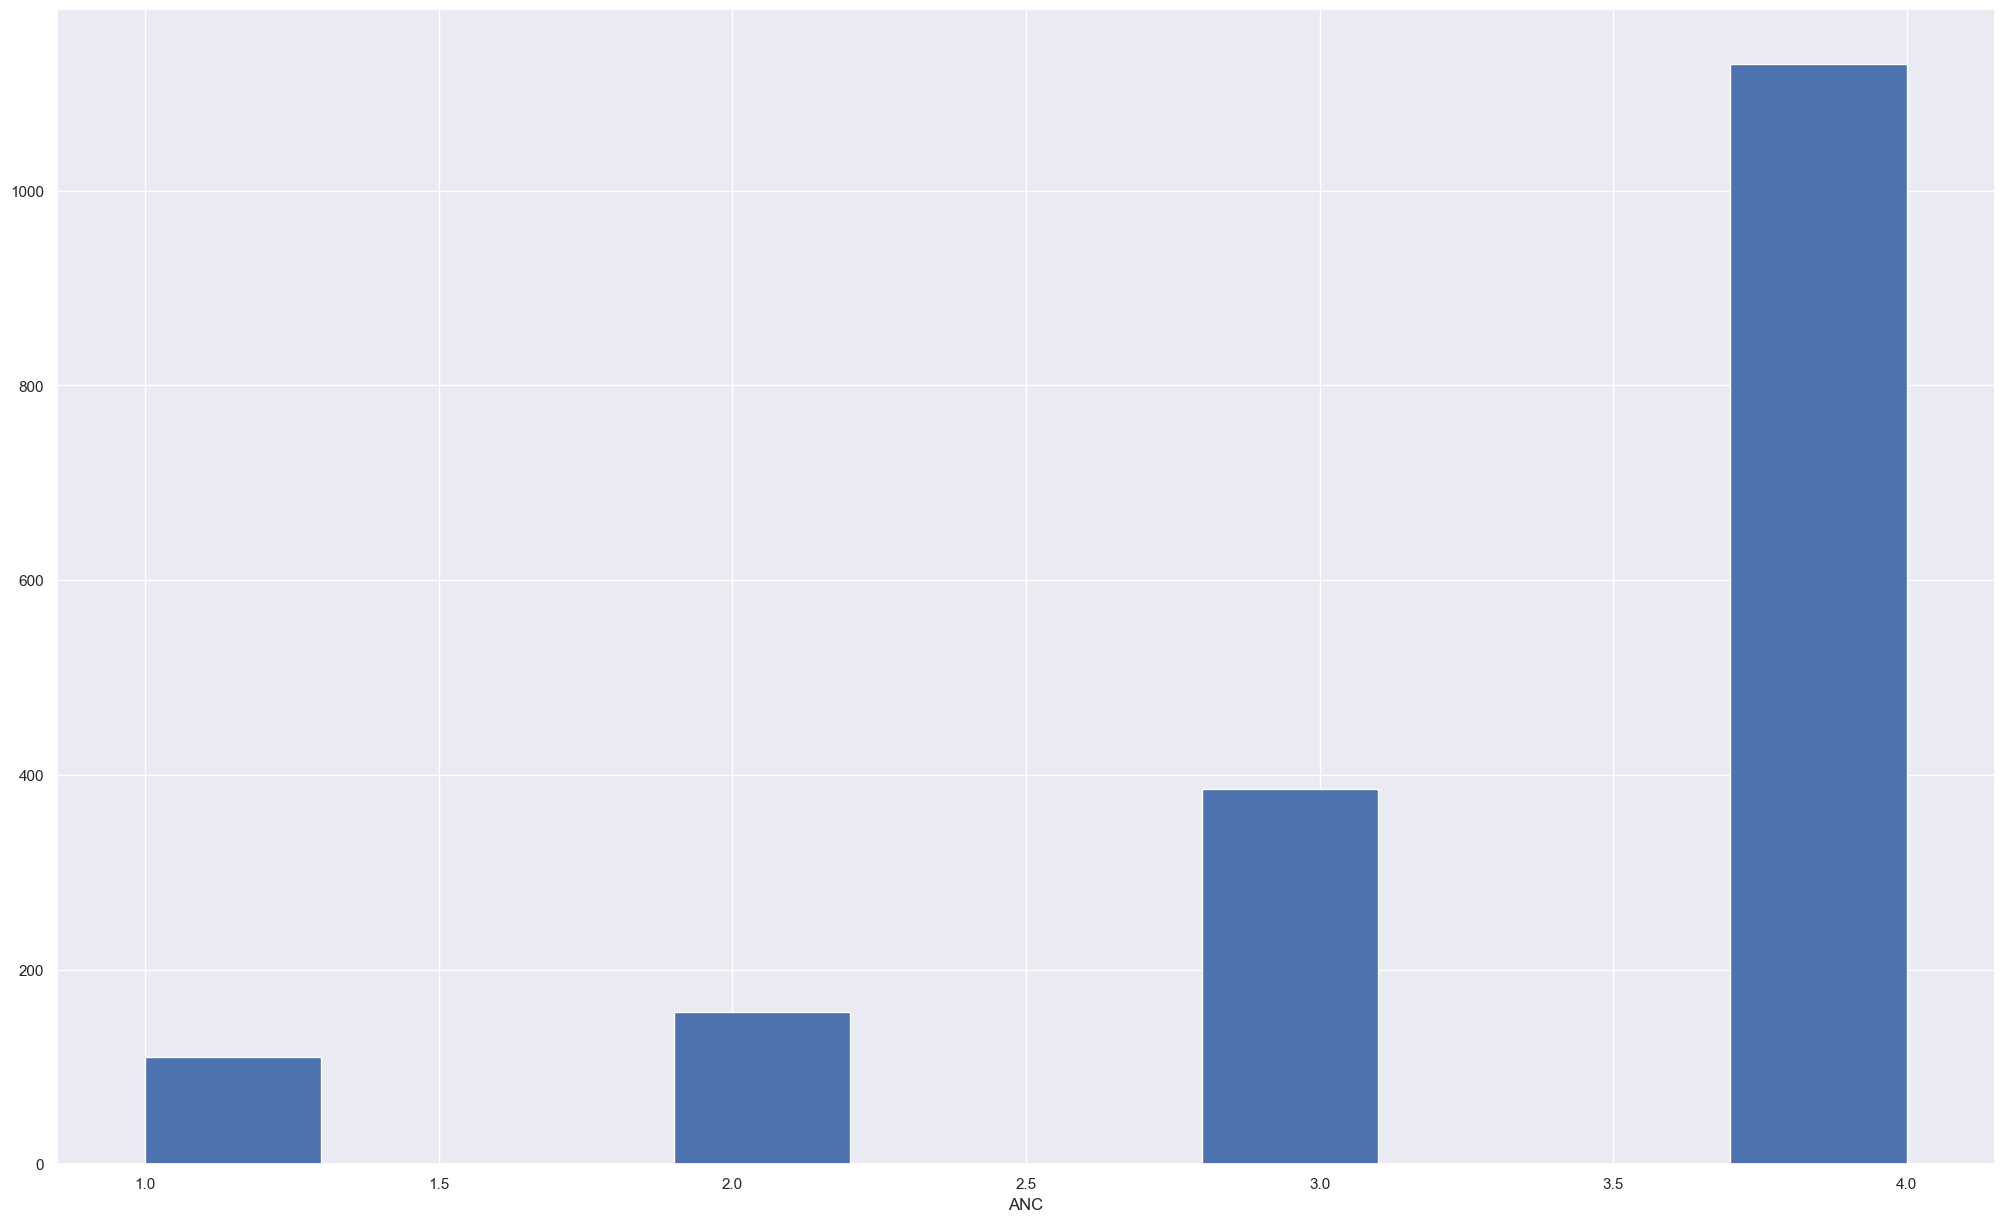

In [618]:
#Distribucija značajke ANC pomoću histograma
plt.hist(X['ANC'])
plt.xlabel('ANC')
plt.show()

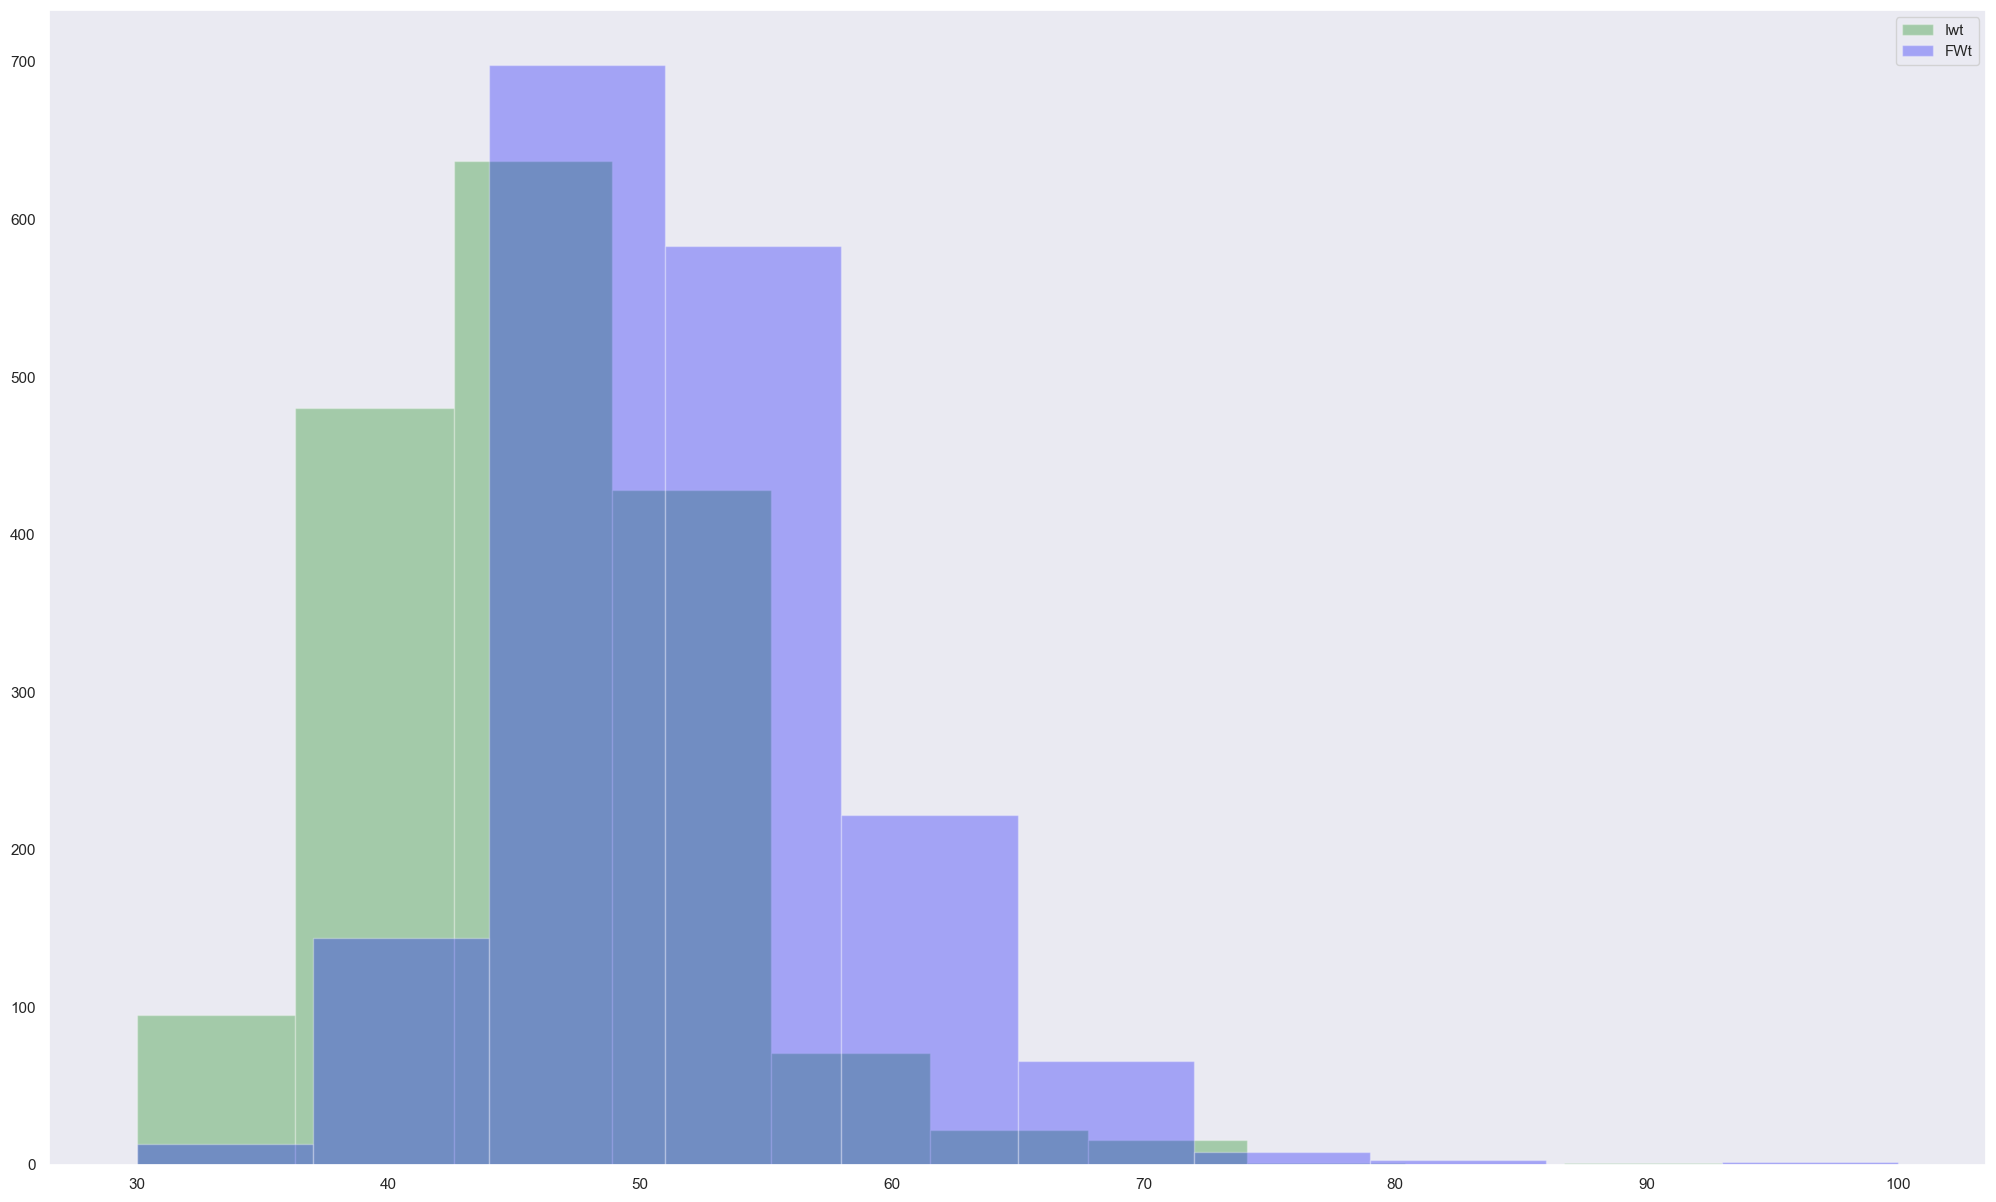

In [619]:
#Distribucija značajki IWt i FWt pomoću histograma
plt.hist(X['Iwt(kg)'], label='Iwt', color='green', alpha=0.3)
plt.hist(X['FWt(kg)'], label='FWt', color='blue', alpha=0.3)
plt.legend(loc='best')
plt.grid()
plt.show()

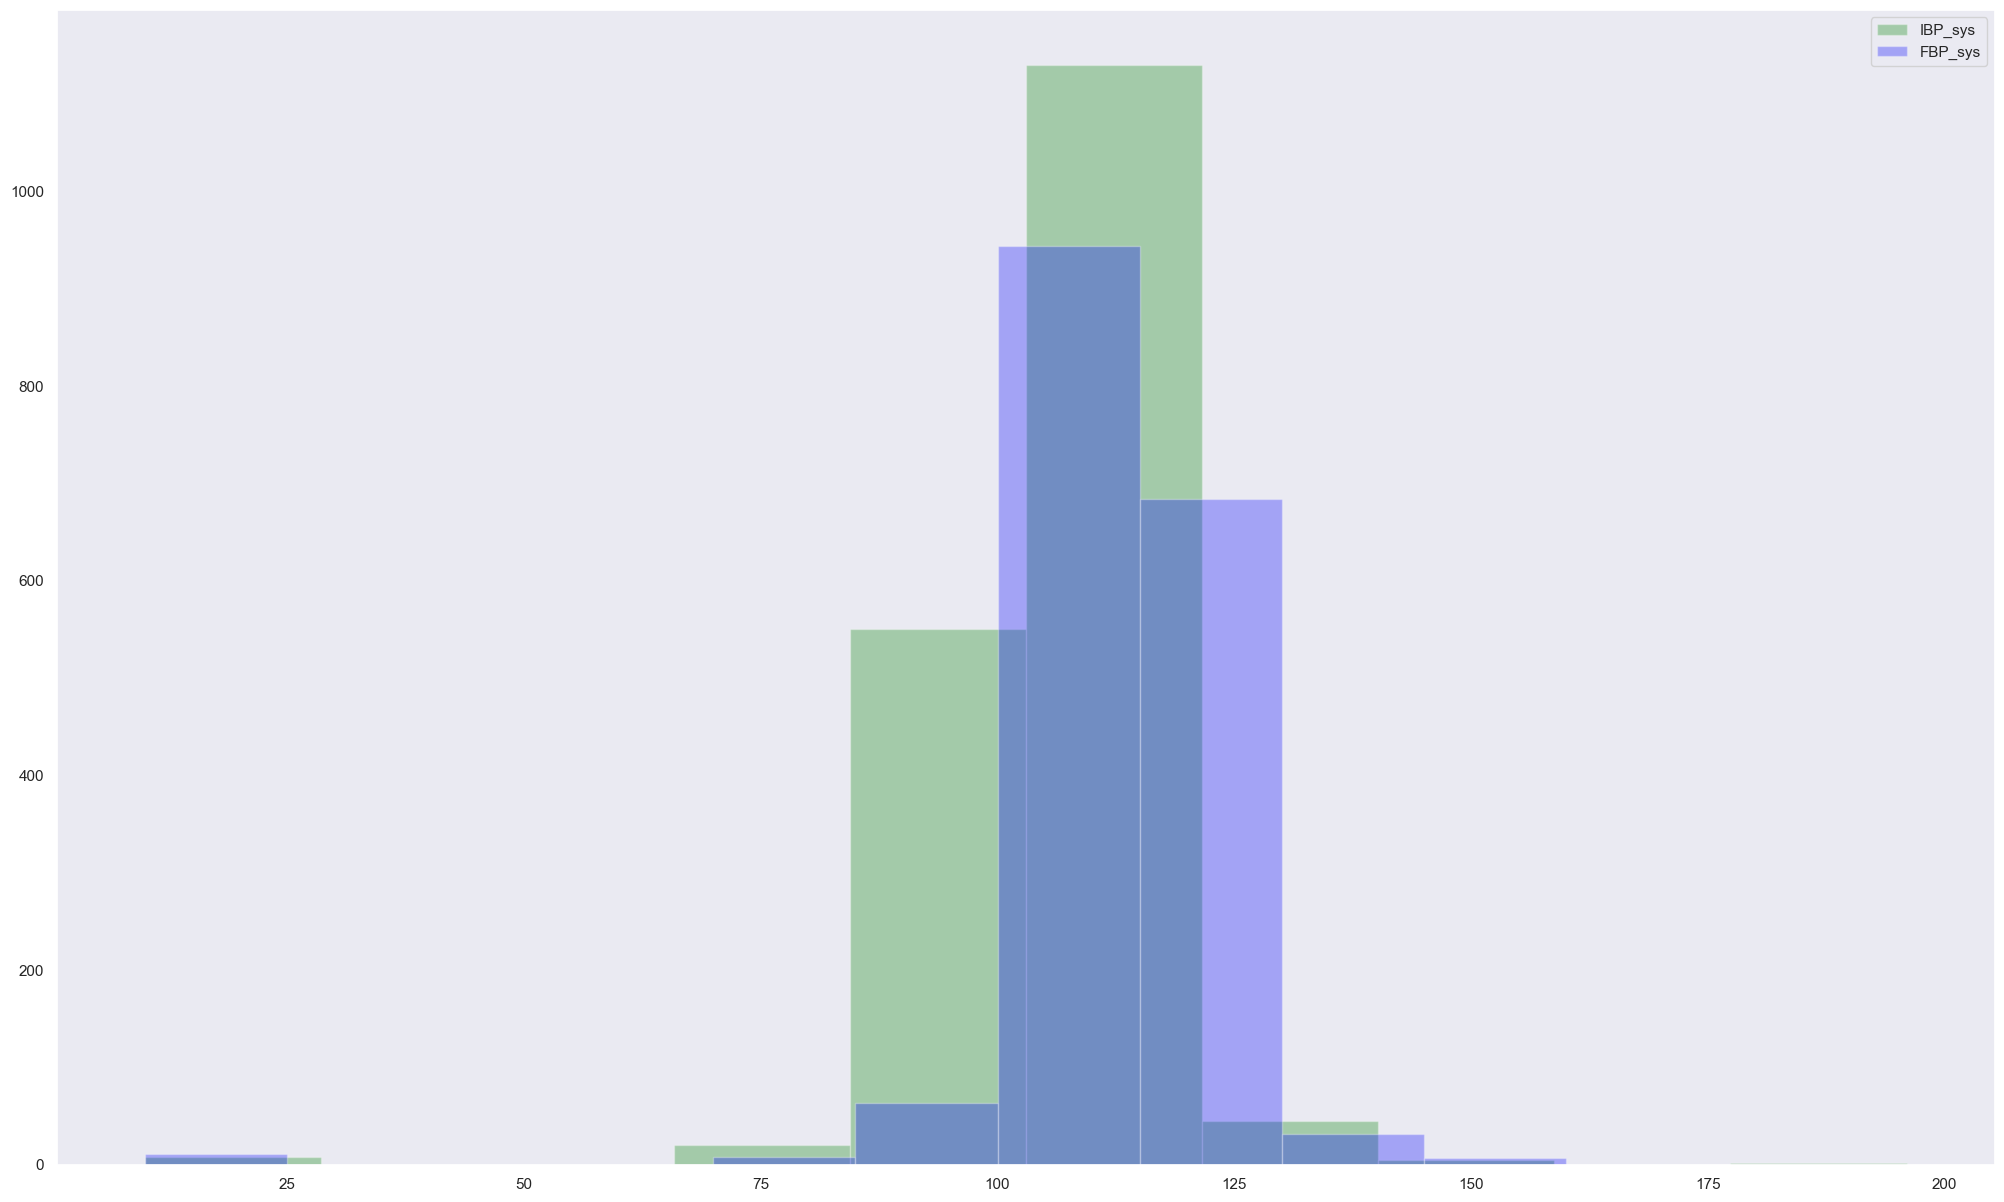

In [620]:
#Distribucija značajki sistoličkog tlaka pomoću histograma
plt.hist(X['IBP_sys'], label='IBP_sys', color='green', alpha=0.3)
plt.hist(X['FBP_sys'], label='FBP_sys', color='blue', alpha=0.3)
plt.legend(loc='best')
plt.grid()
plt.show()

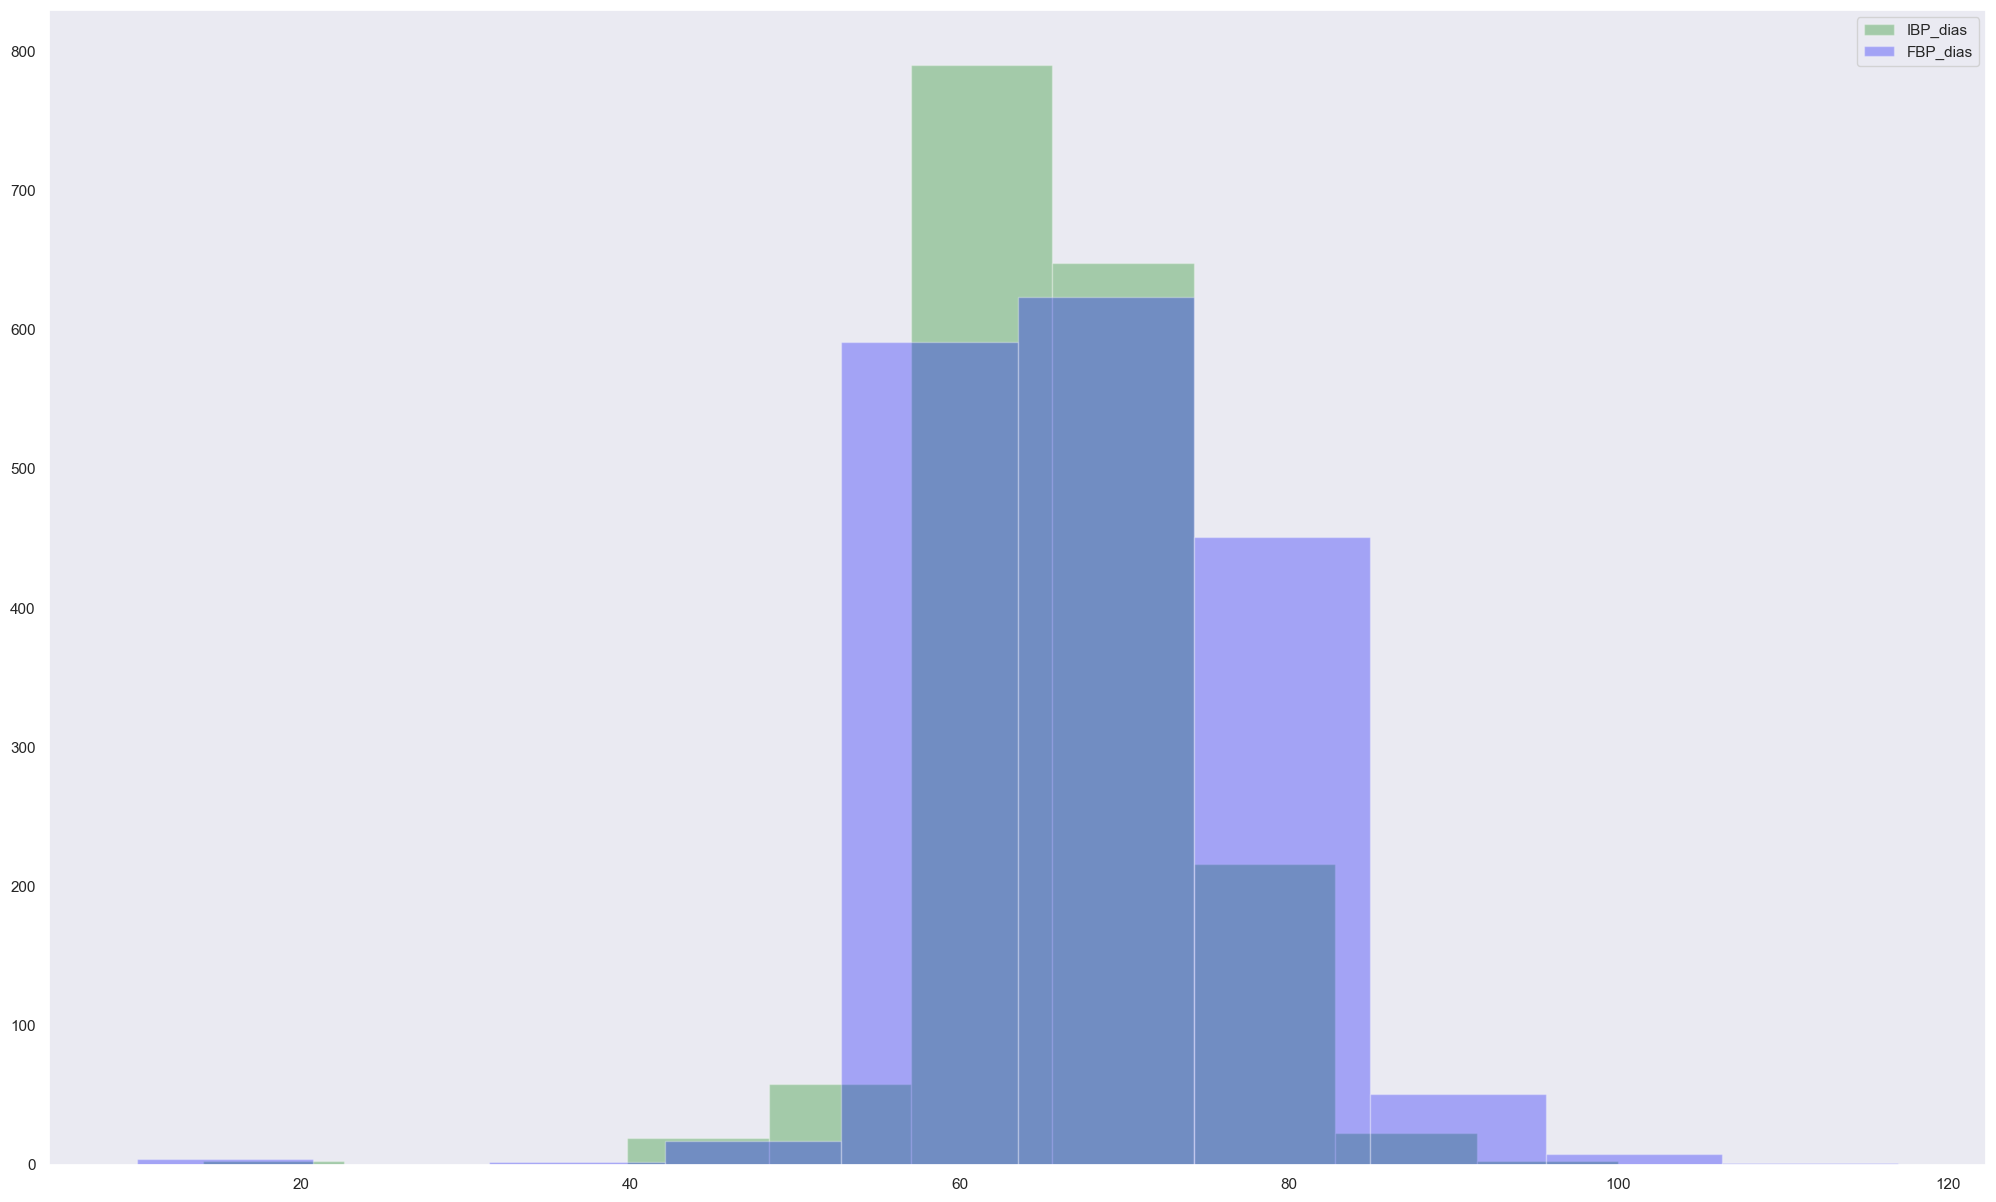

In [621]:
#Distribucija značajki dijastoličkog tlaka pomoću histograma
plt.hist(X['IBP_dias'], label='IBP_dias', color='green', alpha=0.3)
plt.hist(X['FBP_dias'], label='FBP_dias', color='blue', alpha=0.3)
plt.legend(loc='best')
plt.grid()
plt.show()

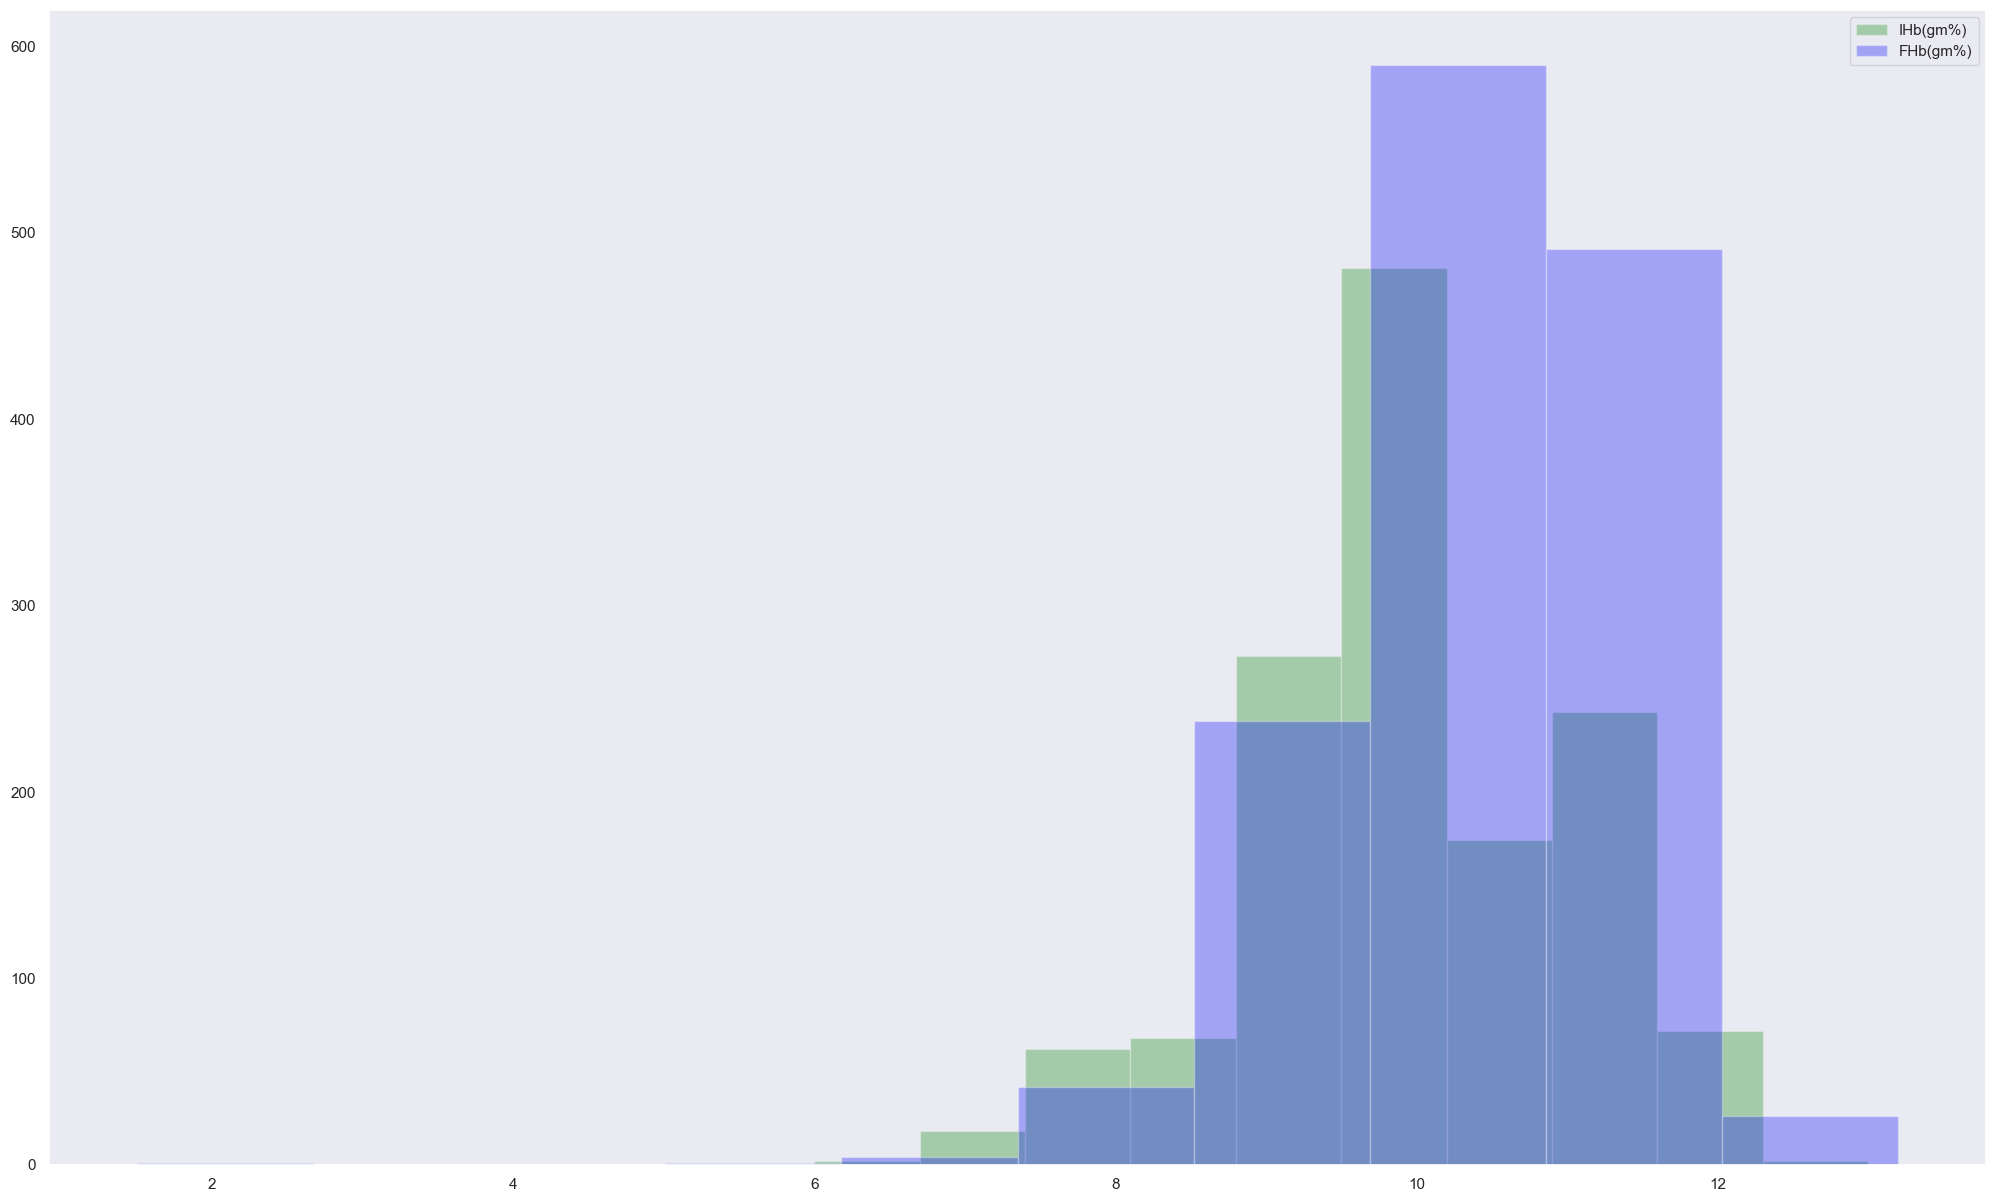

In [622]:
#Distribucija značajki hemoglobina pomoću histograma
plt.hist(X['IHb(gm%)'], label='IHb(gm%)', color='green', alpha=0.3)
plt.hist(X['FHb(gm%)'], label='FHb(gm%)', color='blue', alpha=0.3)
plt.legend(loc='best')
plt.grid()
plt.show()

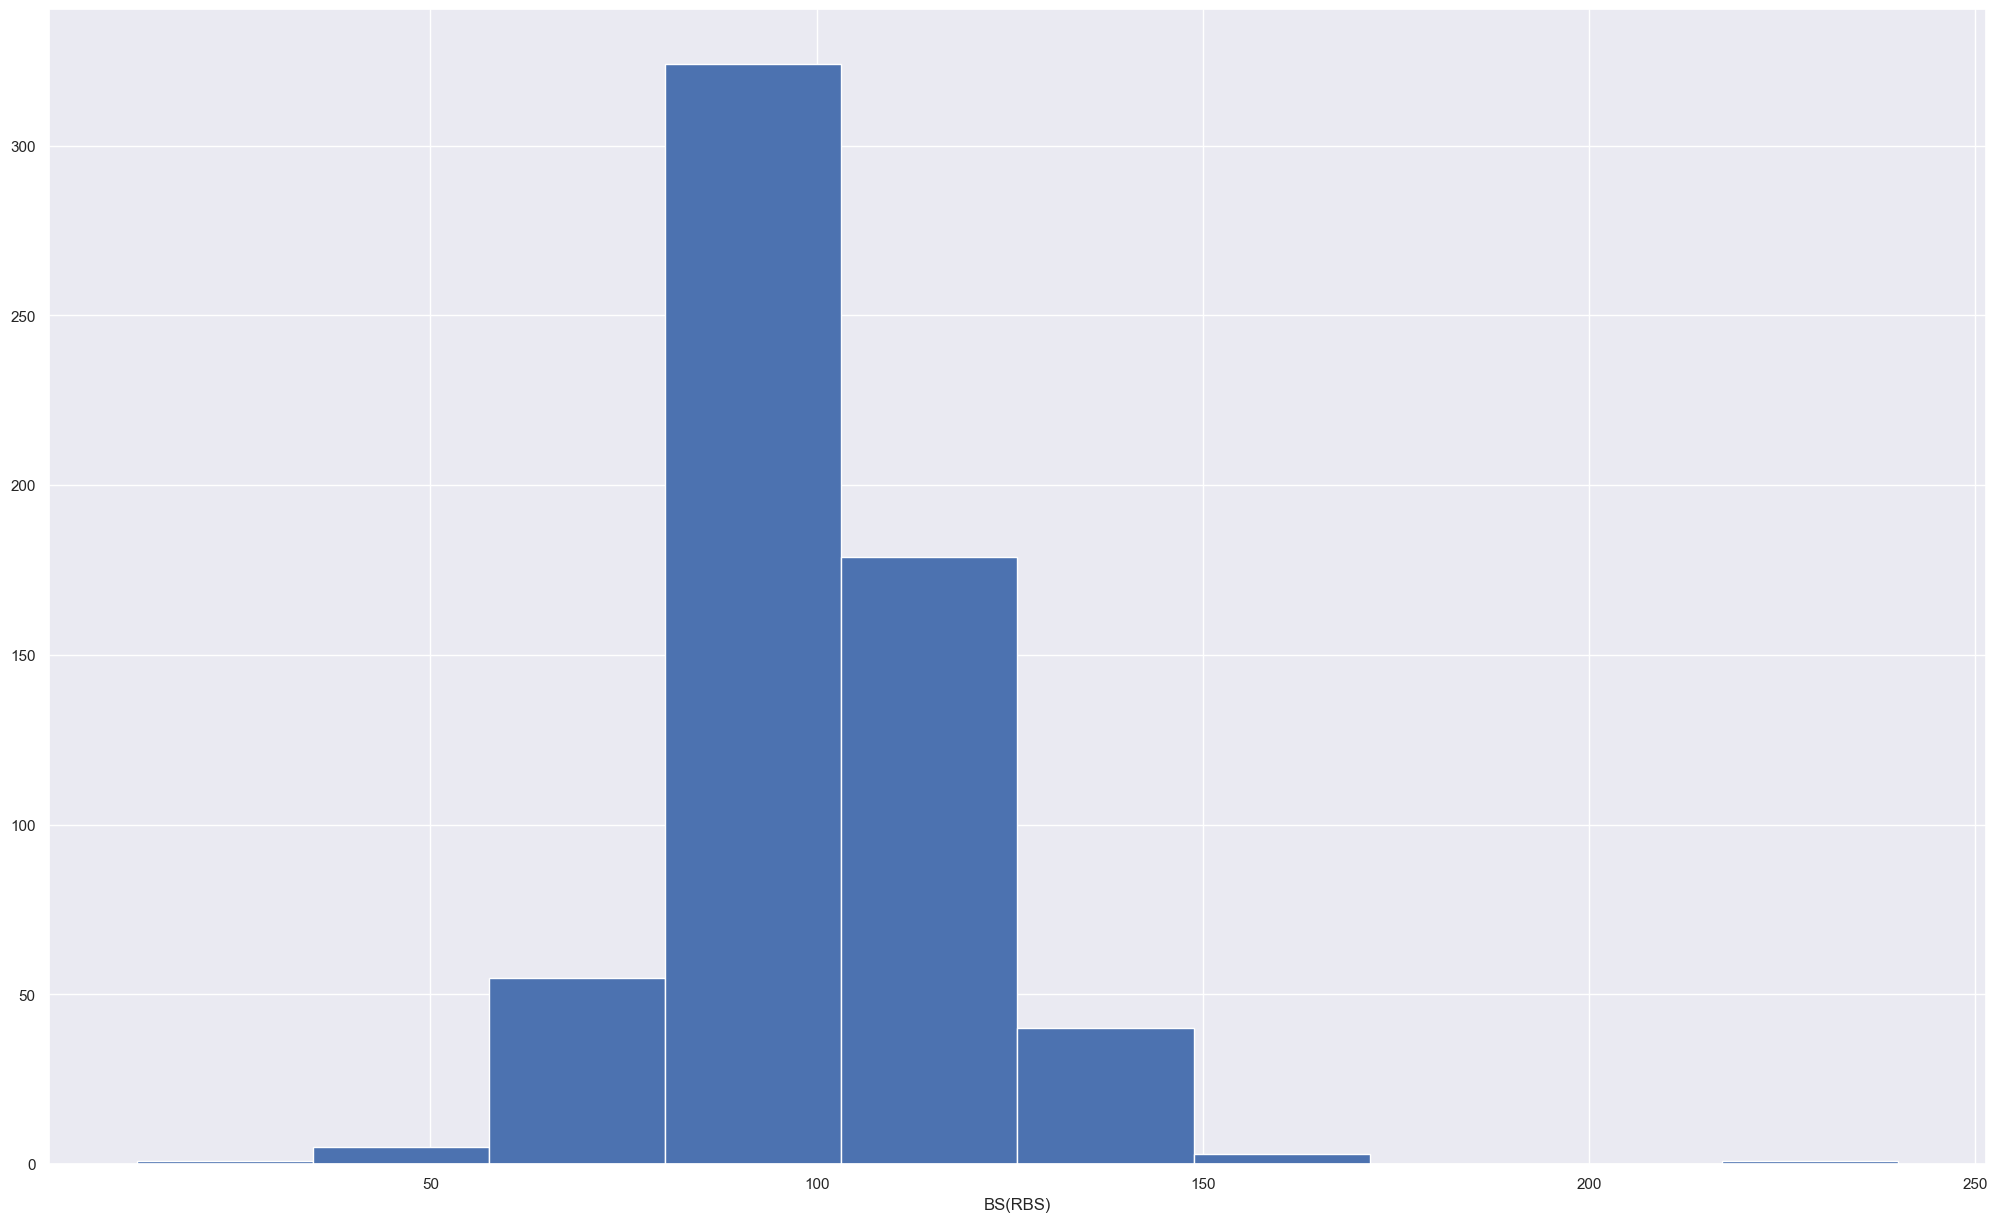

In [623]:
#Distribucija značajke BS pomoću histograma
plt.hist(X['BS(RBS)'])
plt.xlabel('BS(RBS)')
plt.show()

Značajke mase majke, krvnog tlaka, hemoglobina i šećera u krvi također imaju normalnu distribuciju.

C:\Users\muha\AppData\Local\Temp\ipykernel_14308\1626595843.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:,'Term/Preterm'] = le.transform(X.loc[:,'Term/Preterm']) #Transformiramo Term/Preterm u numerički oblik


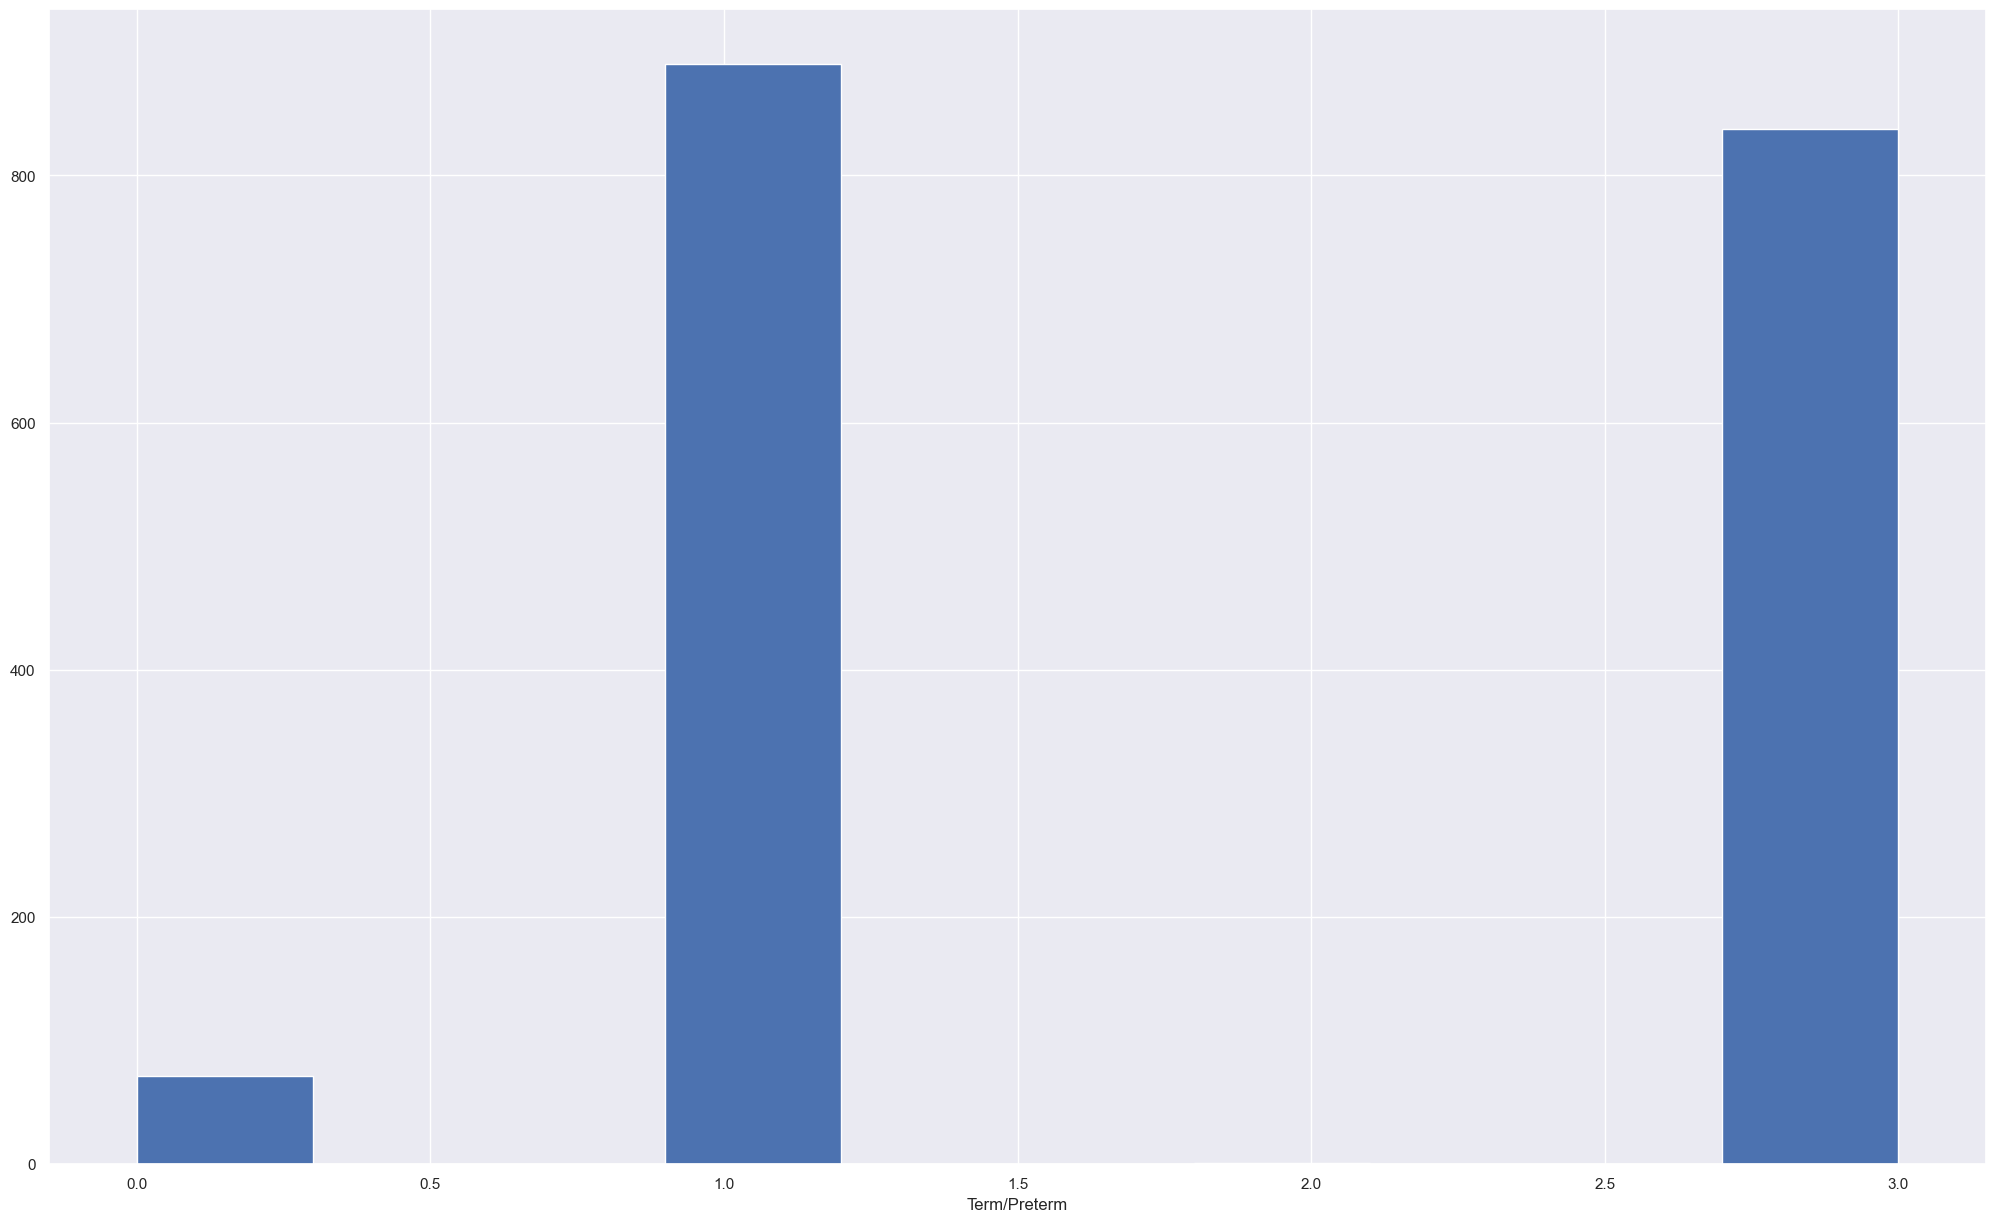

In [624]:
le = LabelEncoder()

le.fit(X.loc[:,'Term/Preterm'])
X.loc[:,'Term/Preterm'] = le.transform(X.loc[:,'Term/Preterm']) #Transformiramo Term/Preterm u numerički oblik

plt.hist(X['Term/Preterm'])
plt.xlabel('Term/Preterm')
plt.show()

# Mean i standardna devijacija

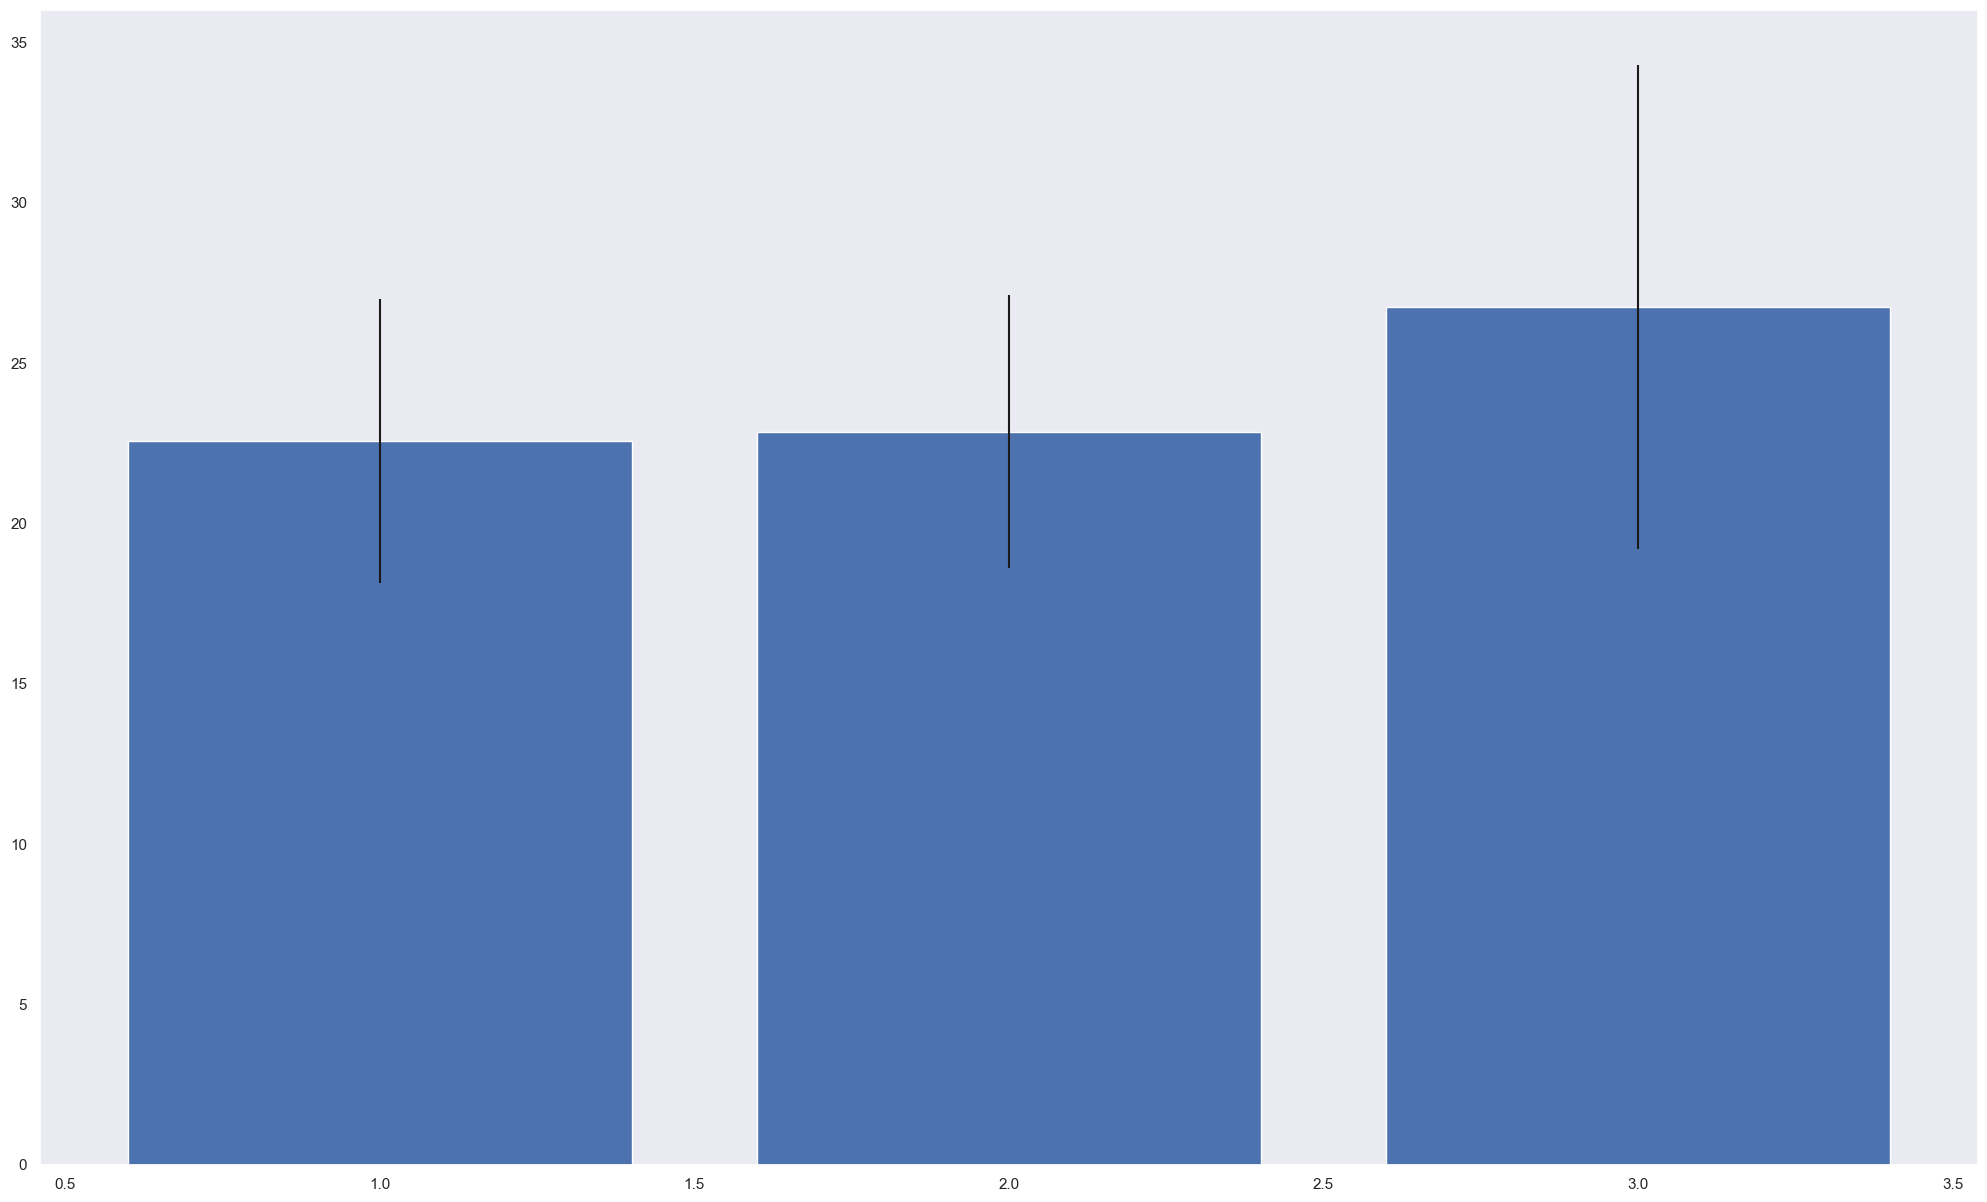

In [625]:
#Prikazujemo prosječnu dob majke i njezinu standardnu devijaciju po LNH-u

low_mean = X.loc[X.loc[:,'LNH'] == 1.0, 'Age(years)'].mean()
low_std = X.loc[X.loc[:,'LNH'] == 1.0, 'Age(years)'].std()

normal_mean = X.loc[X.loc[:,'LNH'] == 2.0, 'Age(years)'].mean()
normal_std = X.loc[X.loc[:,'LNH'] == 2.0, 'Age(years)'].std()

high_mean = X.loc[X.loc[:,'LNH'] == 3.0, 'Age(years)'].mean()
high_std = X.loc[X.loc[:,'LNH'] == 3.0, 'Age(years)'].std()

age_per_LNH = [low_mean, normal_mean, high_mean]
age_per_LNH_std = [low_std, normal_std, high_std]

LNH_name = X.groupby('LNH').count().index.values

# plot
plt.bar(LNH_name, age_per_LNH, yerr=age_per_LNH_std)
plt.grid()
plt.show()

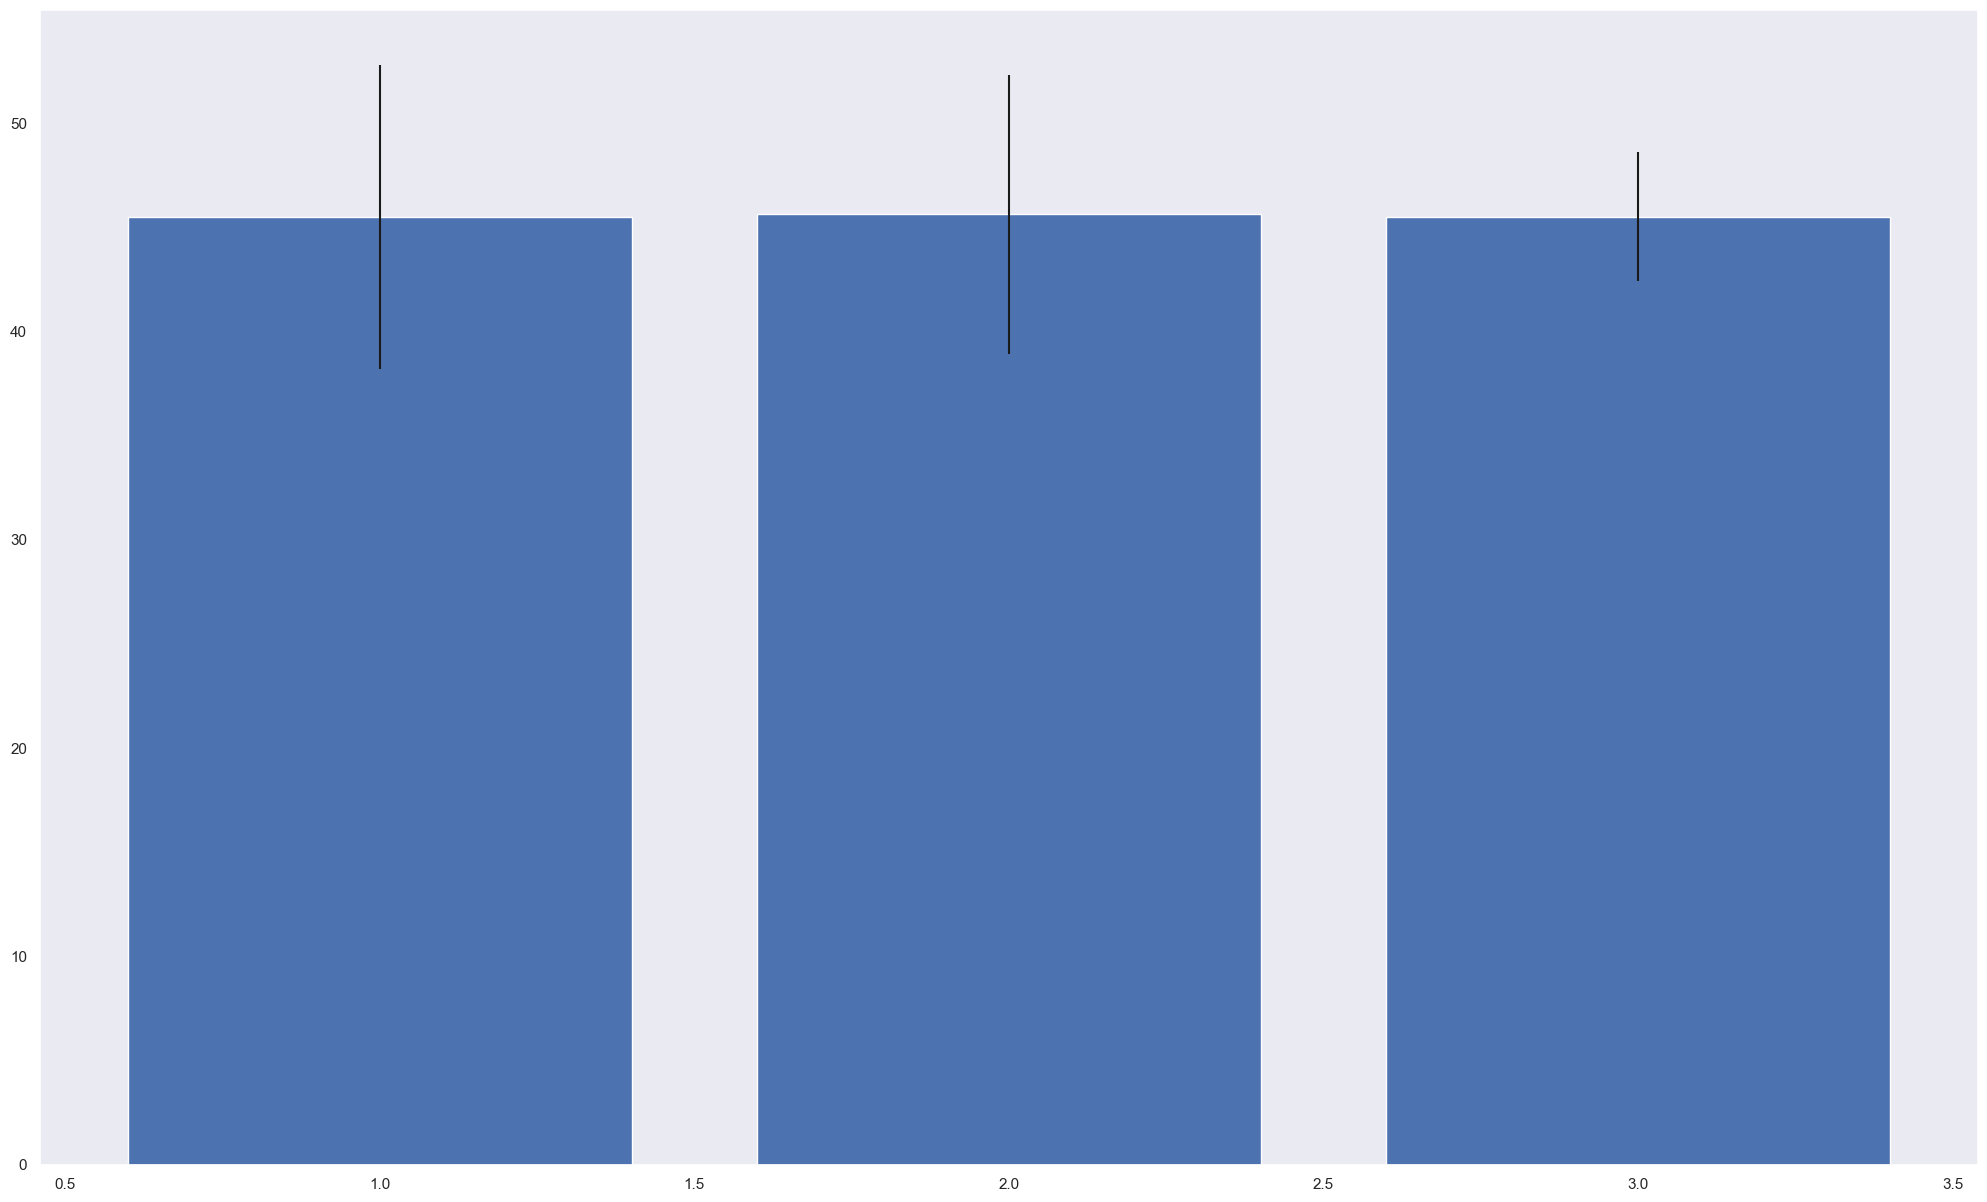

In [626]:
low_mean = X.loc[X.loc[:,'LNH'] == 1.0, 'Iwt(kg)'].mean()
low_std = X.loc[X.loc[:,'LNH'] == 1.0, 'Iwt(kg)'].std()

normal_mean = X.loc[X.loc[:,'LNH'] == 2.0, 'Iwt(kg)'].mean()
normal_std = X.loc[X.loc[:,'LNH'] == 2.0, 'Iwt(kg)'].std()

high_mean = X.loc[X.loc[:,'LNH'] == 3.0, 'Iwt(kg)'].mean()
high_std = X.loc[X.loc[:,'LNH'] == 3.0, 'Iwt(kg)'].std()

age_per_iwt = [low_mean, normal_mean, high_mean]
age_per_iwt_std = [low_std, normal_std, high_std]

iwt_name = X.groupby('LNH').count().index.values

# plot
plt.bar(iwt_name, age_per_iwt, yerr=age_per_iwt_std)
plt.grid()
plt.show()

#Prikazujemo prosječnu početnu težinu majke i njezinu standardnu devijaciju po LNH-u

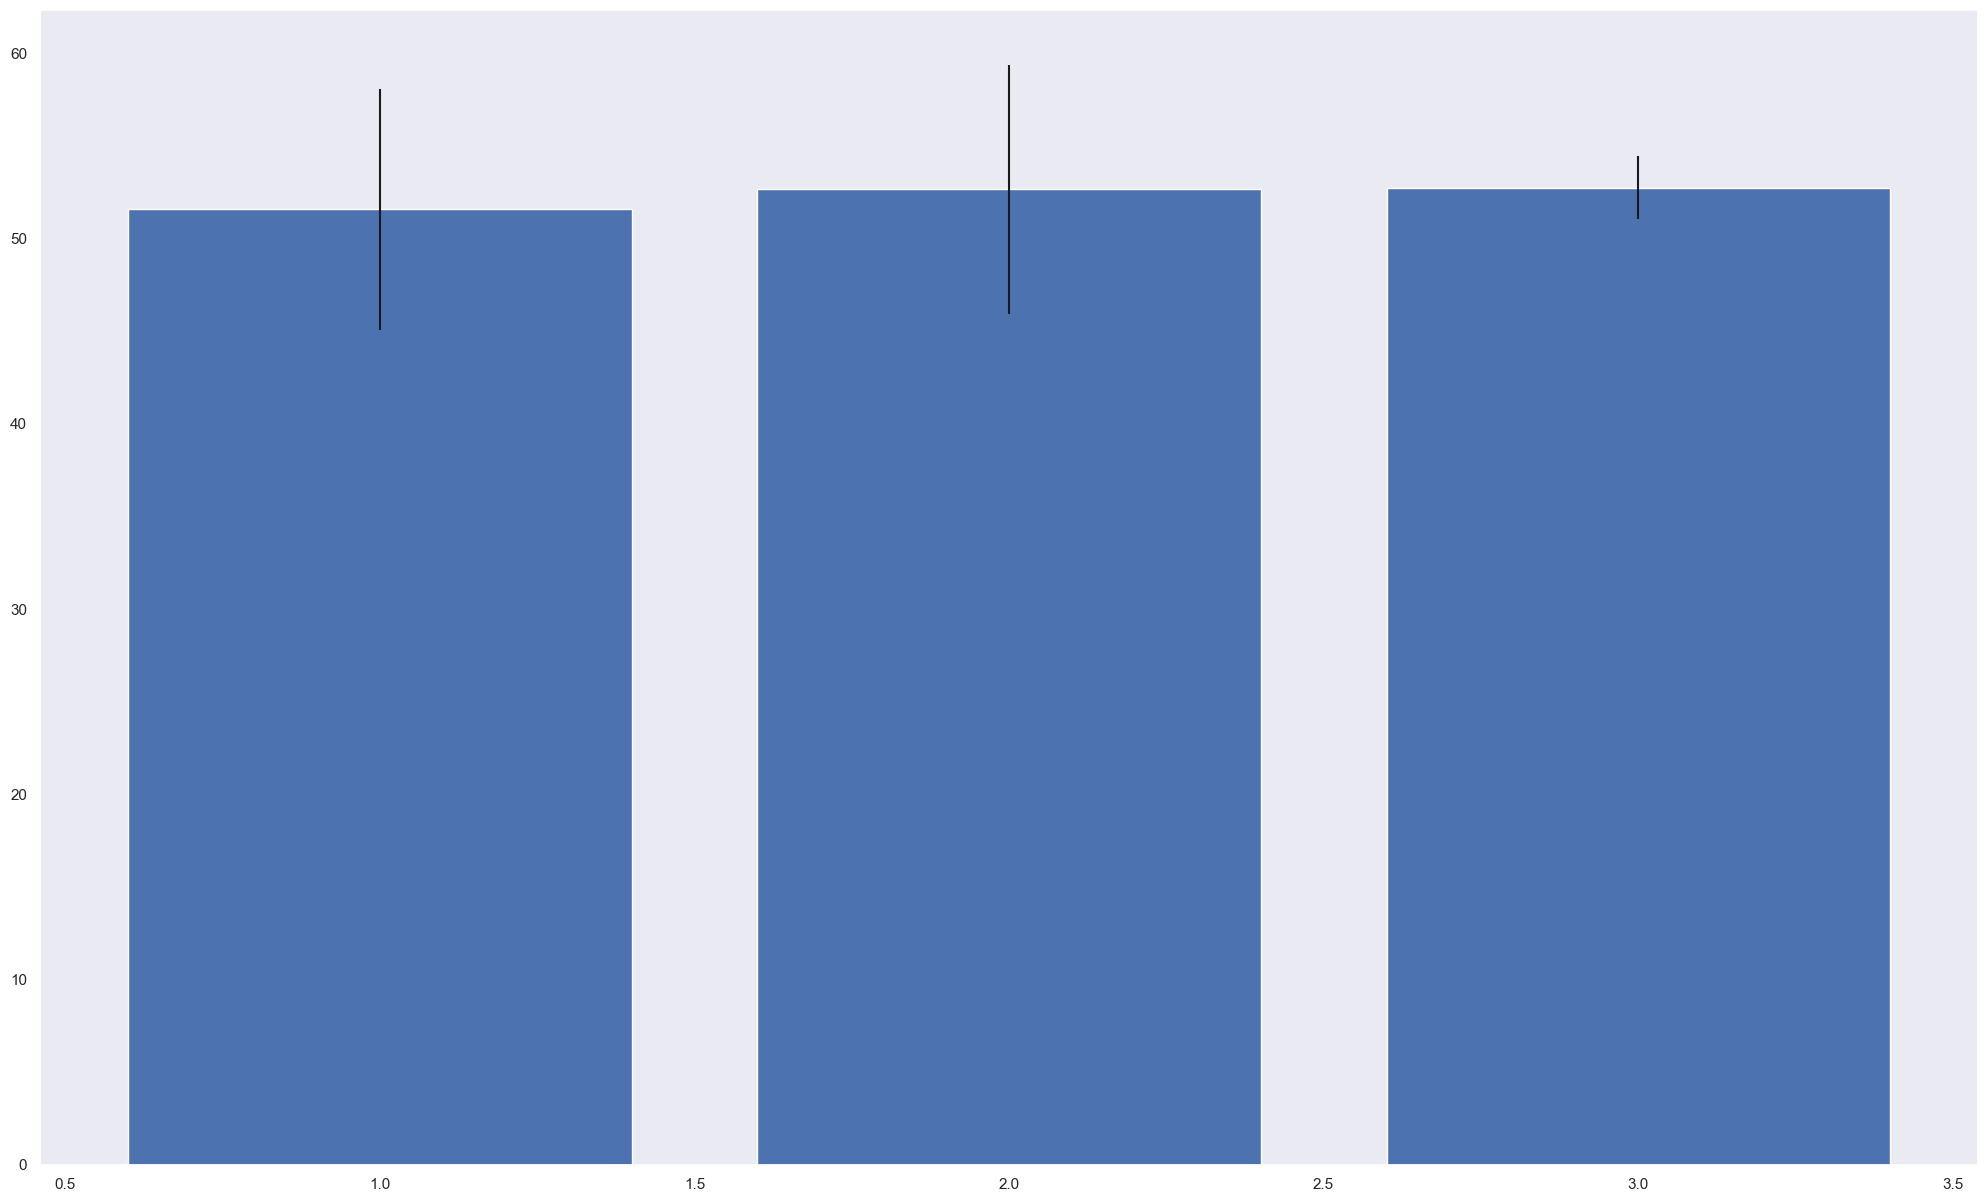

In [627]:
#Prikazujemo prosječnu konačnu težinu majke i njezinu standardnu devijaciju po LNH-u

low_mean = X.loc[X.loc[:,'LNH'] == 1.0, 'FWt(kg)'].mean()
low_std = X.loc[X.loc[:,'LNH'] == 1.0, 'FWt(kg)'].std()

normal_mean = X.loc[X.loc[:,'LNH'] == 2.0, 'FWt(kg)'].mean()
normal_std = X.loc[X.loc[:,'LNH'] == 2.0, 'FWt(kg)'].std()

high_mean = X.loc[X.loc[:,'LNH'] == 3.0, 'FWt(kg)'].mean()
high_std = X.loc[X.loc[:,'LNH'] == 3.0, 'FWt(kg)'].std()

age_per_fwt = [low_mean, normal_mean, high_mean]
age_per_fwt_std = [low_std, normal_std, high_std]

fwt_name = X.groupby('LNH').count().index.values

# plot
plt.bar(fwt_name, age_per_fwt, yerr=age_per_fwt_std)
plt.grid()
plt.show()

# Vizualizacija stršećih vrijednosti

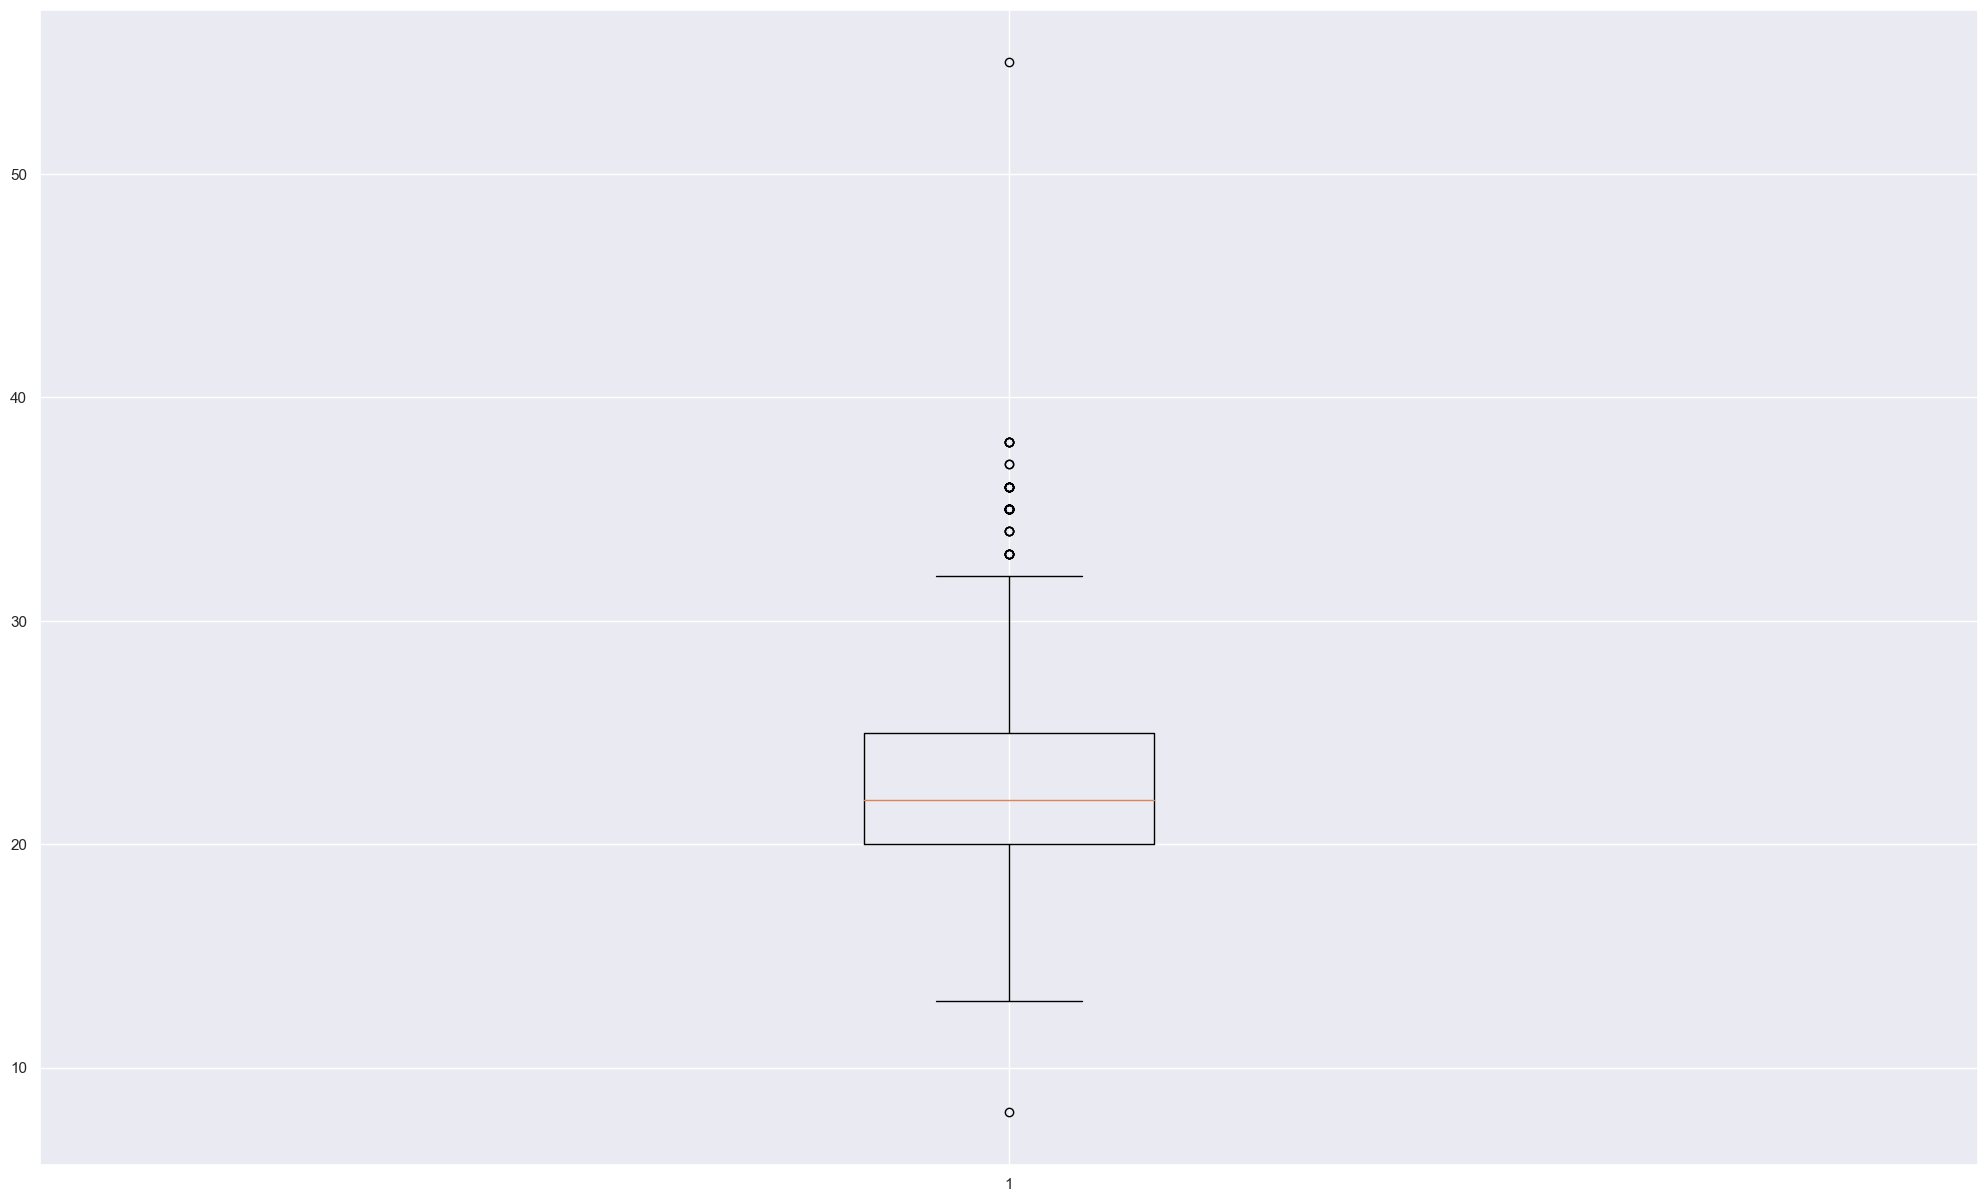

In [628]:
# ubaci srednju vrijednost godina tamo gdje nedostaje ta informacija
X_tmp.loc[X_tmp['Age(years)'].isna(),'Age(years)'] = X_tmp.loc[:,'Age(years)'].mean()

# ubaci srednju vrijednost visine tamo gdje nedostaje ta informacija
X_tmp.loc[X_tmp['Height(cm)'].isna(),'Height(cm)'] = X_tmp.loc[:,'Height(cm)'].mean()

# ubaci srednju vrijednost broja prethodnoh trudnoća tamo gdje nedostaje ta informacija
X_tmp.loc[X_tmp['Parity'].isna(),'Parity'] = X_tmp.loc[:,'Parity'].mean()

# ubaci srednju vrijednost ANC-a tamo gdje nedostaje ta informacija
X_tmp.loc[X_tmp['ANC'].isna(),'ANC'] = X_tmp.loc[:,'ANC'].mean()

# ubaci srednju vrijednost početne mase majke tamo gdje nedostaje ta informacija
X_tmp.loc[X_tmp['Iwt(kg)'].isna(),'Iwt(kg)'] = X_tmp.loc[:,'Iwt(kg)'].mean()

# ubaci srednju vrijednost konačne visine majke tamo gdje nedostaje ta informacija
X_tmp.loc[X_tmp['FWt(kg)'].isna(),'FWt(kg)'] = X_tmp.loc[:,'FWt(kg)'].mean()

# ubaci srednju vrijednost početnog sistoličkog tlaka tamo gdje nedostaje ta informacija
X_tmp.loc[X_tmp['IBP_sys'].isna(),'IBP_sys'] = X_tmp.loc[:,'IBP_sys'].mean()

# ubaci srednju vrijednost početnog dijastoličkog tlaka tamo gdje nedostaje ta informacija
X_tmp.loc[X_tmp['IBP_dias'].isna(),'IBP_dias'] = X_tmp.loc[:,'IBP_dias'].mean()

# ubaci srednju vrijednost konačnog sistoličkog tlaka tamo gdje nedostaje ta informacija
X_tmp.loc[X_tmp['FBP_sys'].isna(),'FBP_sys'] = X_tmp.loc[:,'FBP_sys'].mean()

# ubaci srednju vrijednost konačnog dijastoličkog tlaka tamo gdje nedostaje ta informacija
X_tmp.loc[X_tmp['FBP_dias'].isna(),'FBP_dias'] = X_tmp.loc[:,'FBP_dias'].mean()

# ubaci srednju vrijednost početne razine hemoglobina tamo gdje nedostaje ta informacija
X_tmp.loc[X_tmp['IHb(gm%)'].isna(),'IHb(gm%)'] = X_tmp.loc[:,'IHb(gm%)'].mean()

# ubaci srednju vrijednost konačne razine hemoglobina tamo gdje nedostaje ta informacija
X_tmp.loc[X_tmp['FHb(gm%)'].isna(),'FHb(gm%)'] = X_tmp.loc[:,'FHb(gm%)'].mean()

# ubaci srednju vrijednost razine šećera u krvi tamo gdje nedostaje ta informacija
X_tmp.loc[X_tmp['BS(RBS)'].isna(),'BS(RBS)'] = X_tmp.loc[:,'BS(RBS)'].mean()

# ubaci srednju vrijednost bebine mase tamo gdje nedostaje ta informacija
X_tmp.loc[X_tmp['BWt(kg)'].isna(),'BWt(kg)'] = X_tmp.loc[:,'BWt(kg)'].mean()

# postavi LN na noramlan tamo gdje nedostaje ta informacija
X_tmp.loc[X_tmp['LNH'].isna(),'LNH'] = 2.0

plt.boxplot(X_tmp['Age(years)'])
plt.show()

Na grafu iznad vidimo da postoje stršeće vrijednosti, npr. najmanja dob majke bila je ispod 10 godina, a najvećapreko 50. To prikazuju kružići na dnu i vrhu grafa. Narančasta linija predstavlja medijan.

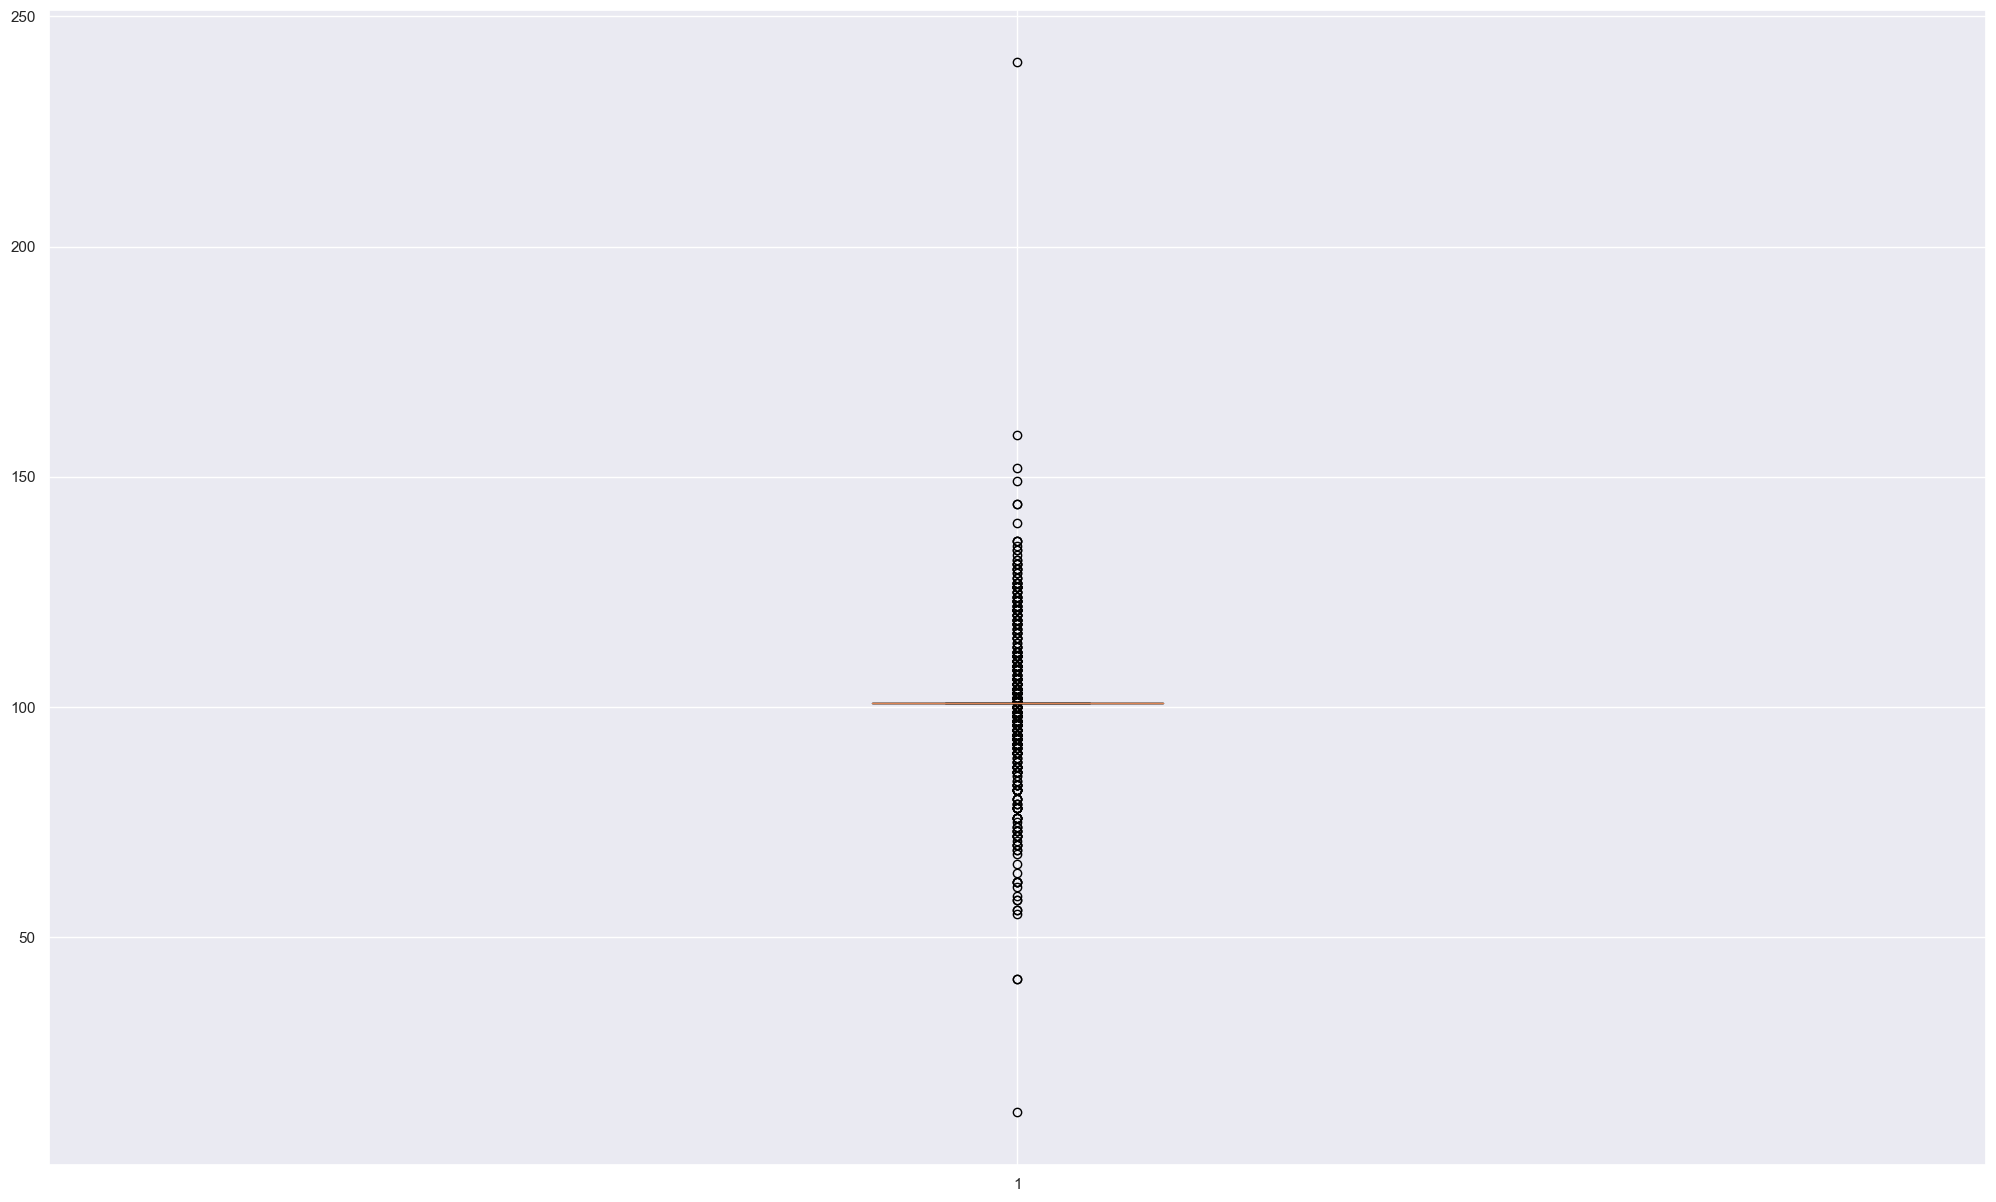

In [630]:
plt.boxplot(X_tmp['BS(RBS)'])
plt.show()

Ovdje također vidimo stršeće vrijednosti koje su daleko od prosjeka i normale za šećer u krvi.

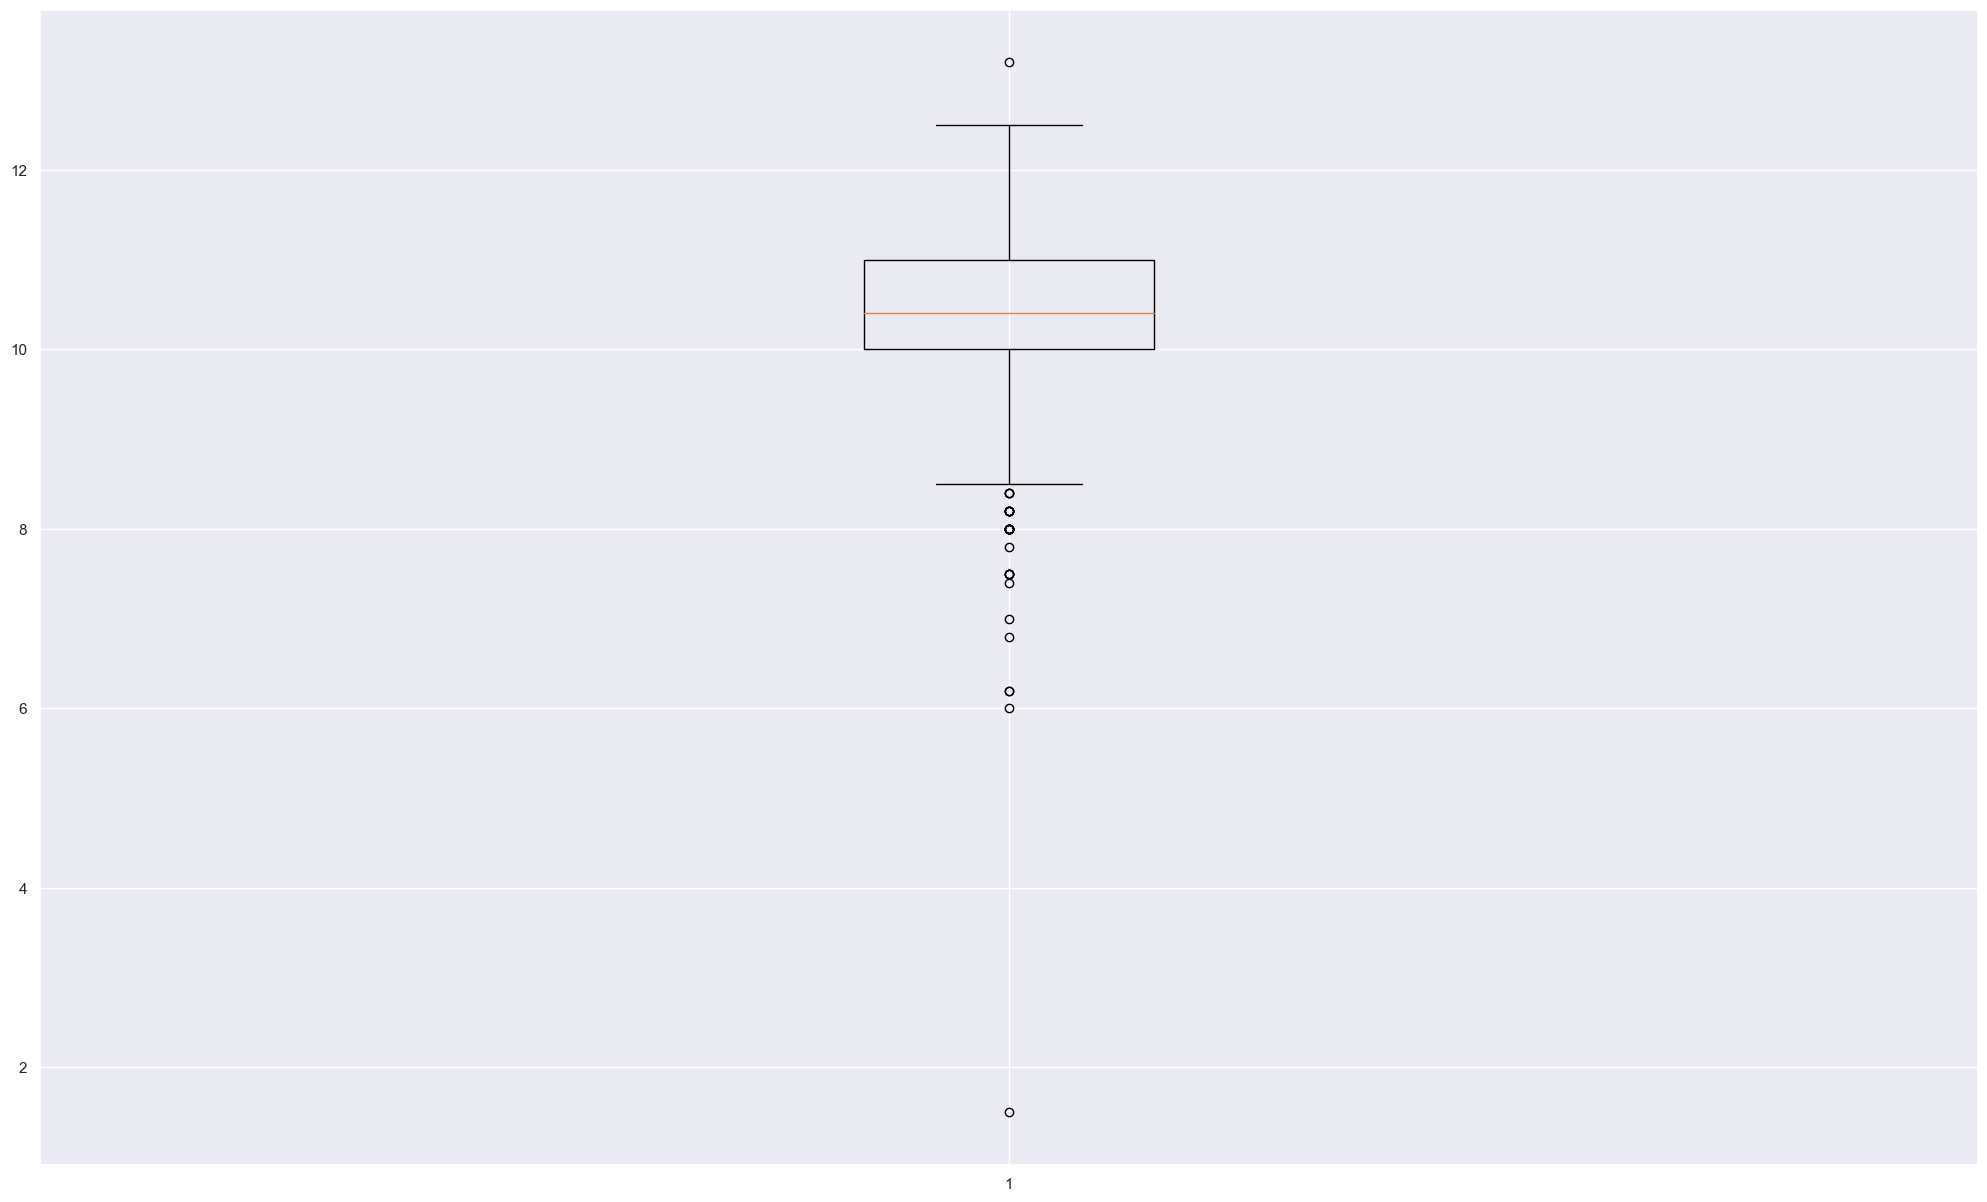

In [631]:
plt.boxplot(X_tmp['FHb(gm%)'])
plt.show()

Na gornjem grafu vidimo da jedna vrijednost za razinu hemoglobina iznosi nešto više od 1, što je izrazito stršeća vrijednost.

# Scatter grafovi

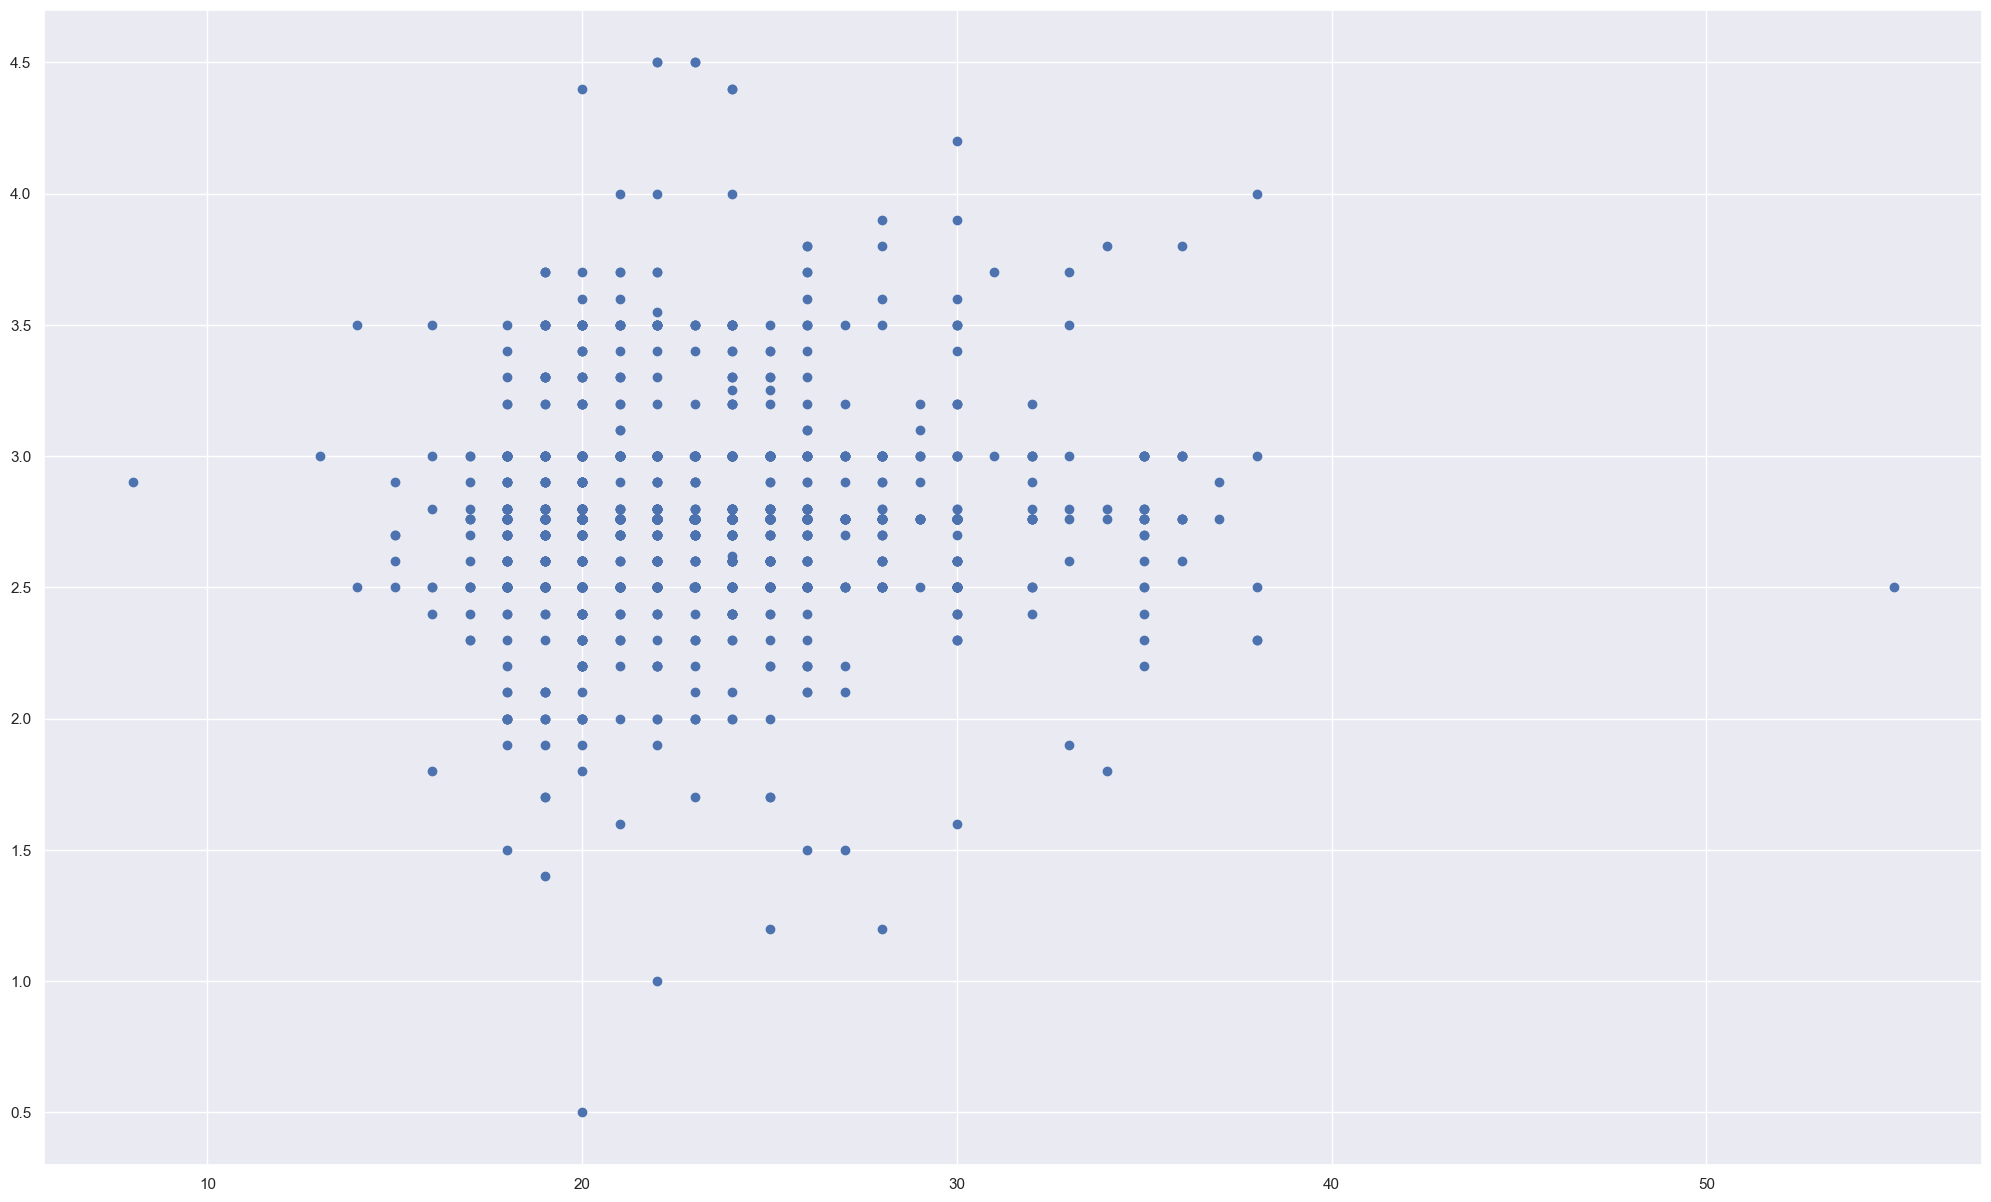

In [632]:
plt.scatter(X_tmp['Age(years)'], X_tmp['BWt(kg)'])
plt.show()

#ovisnost težine bebe o dobi majke

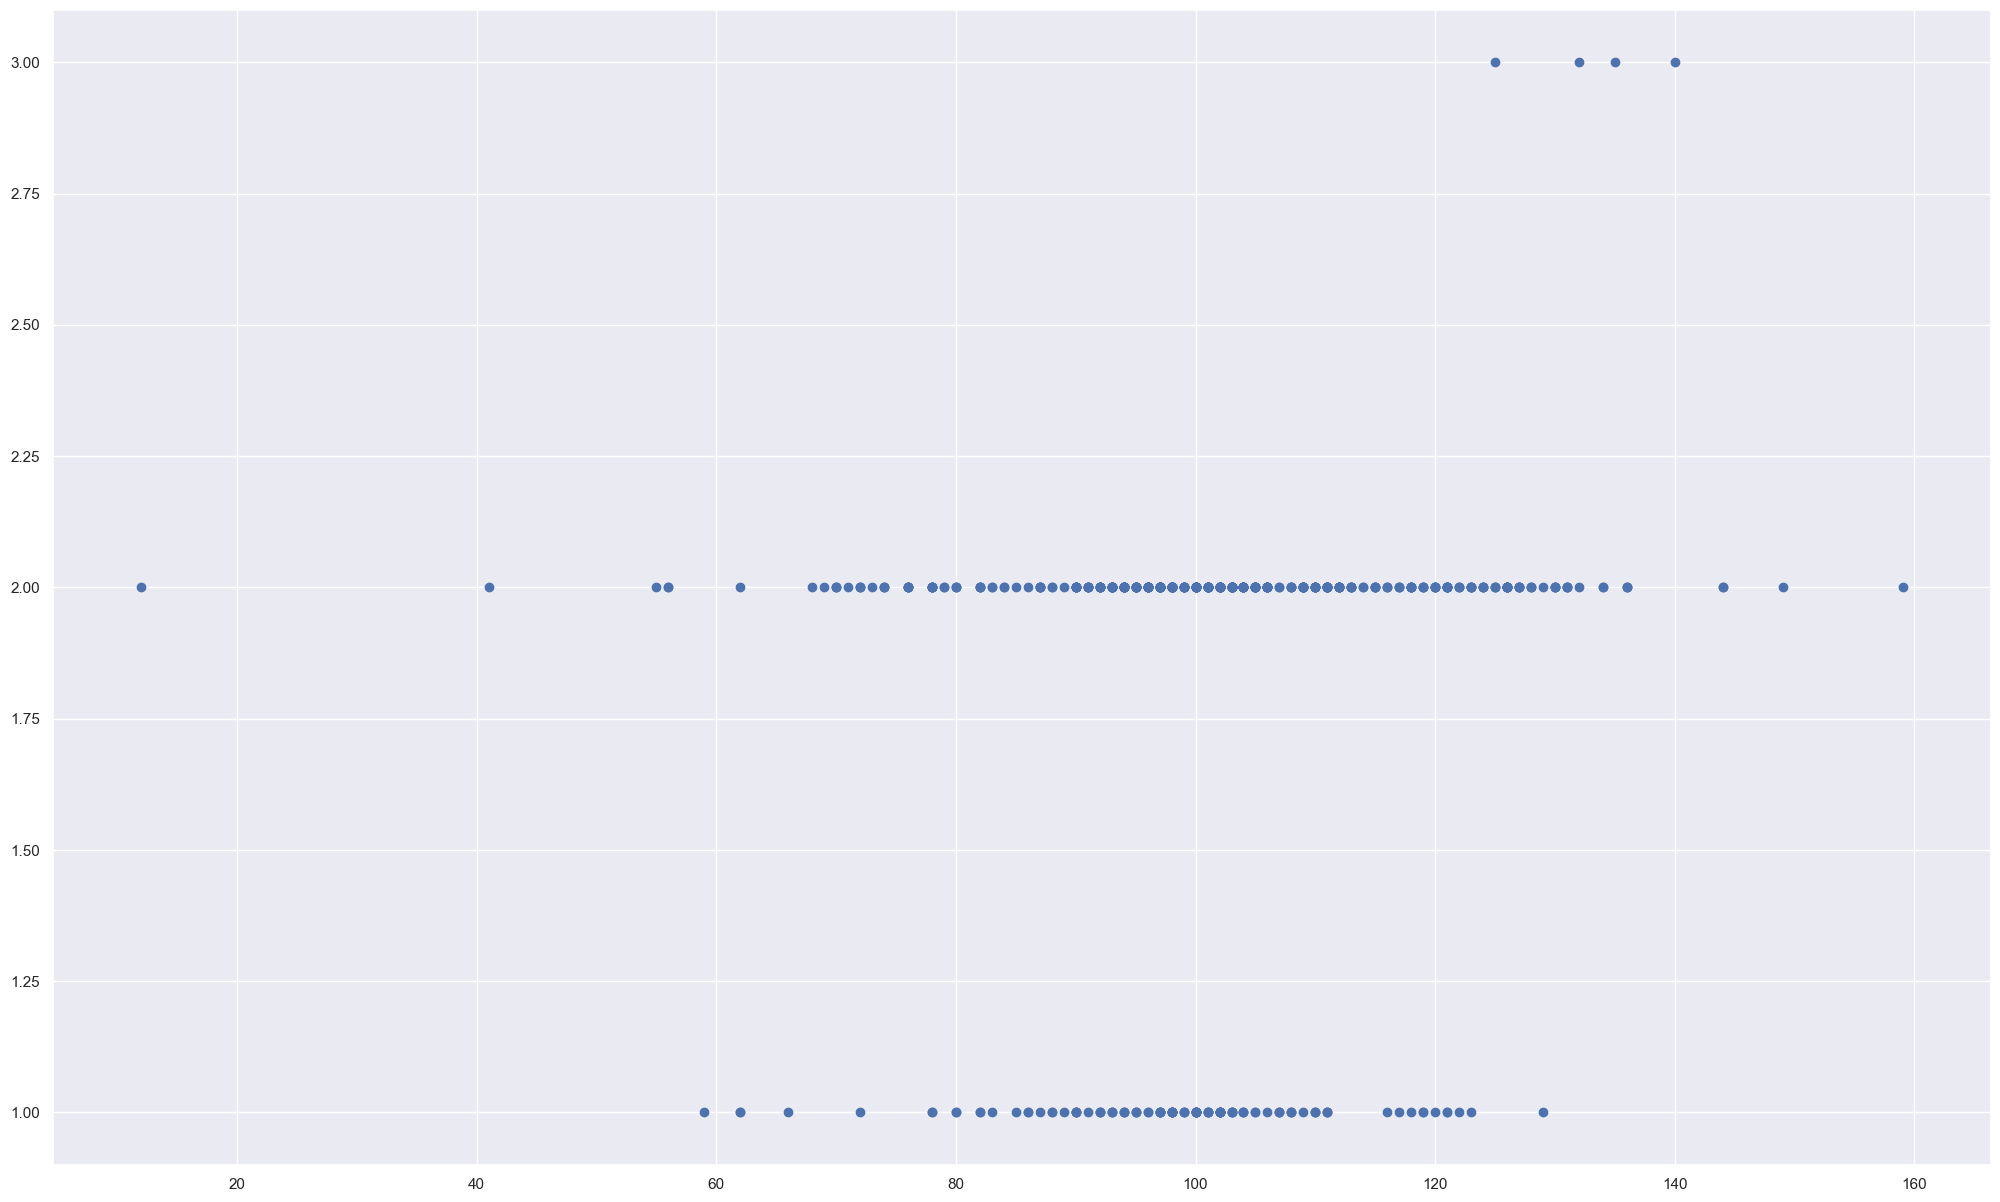

In [633]:
plt.scatter(X['BS(RBS)'], X['LNH'])
plt.show()

Vidimo kako visoka razina šećera u krvi odgovara većoj masi bebe.

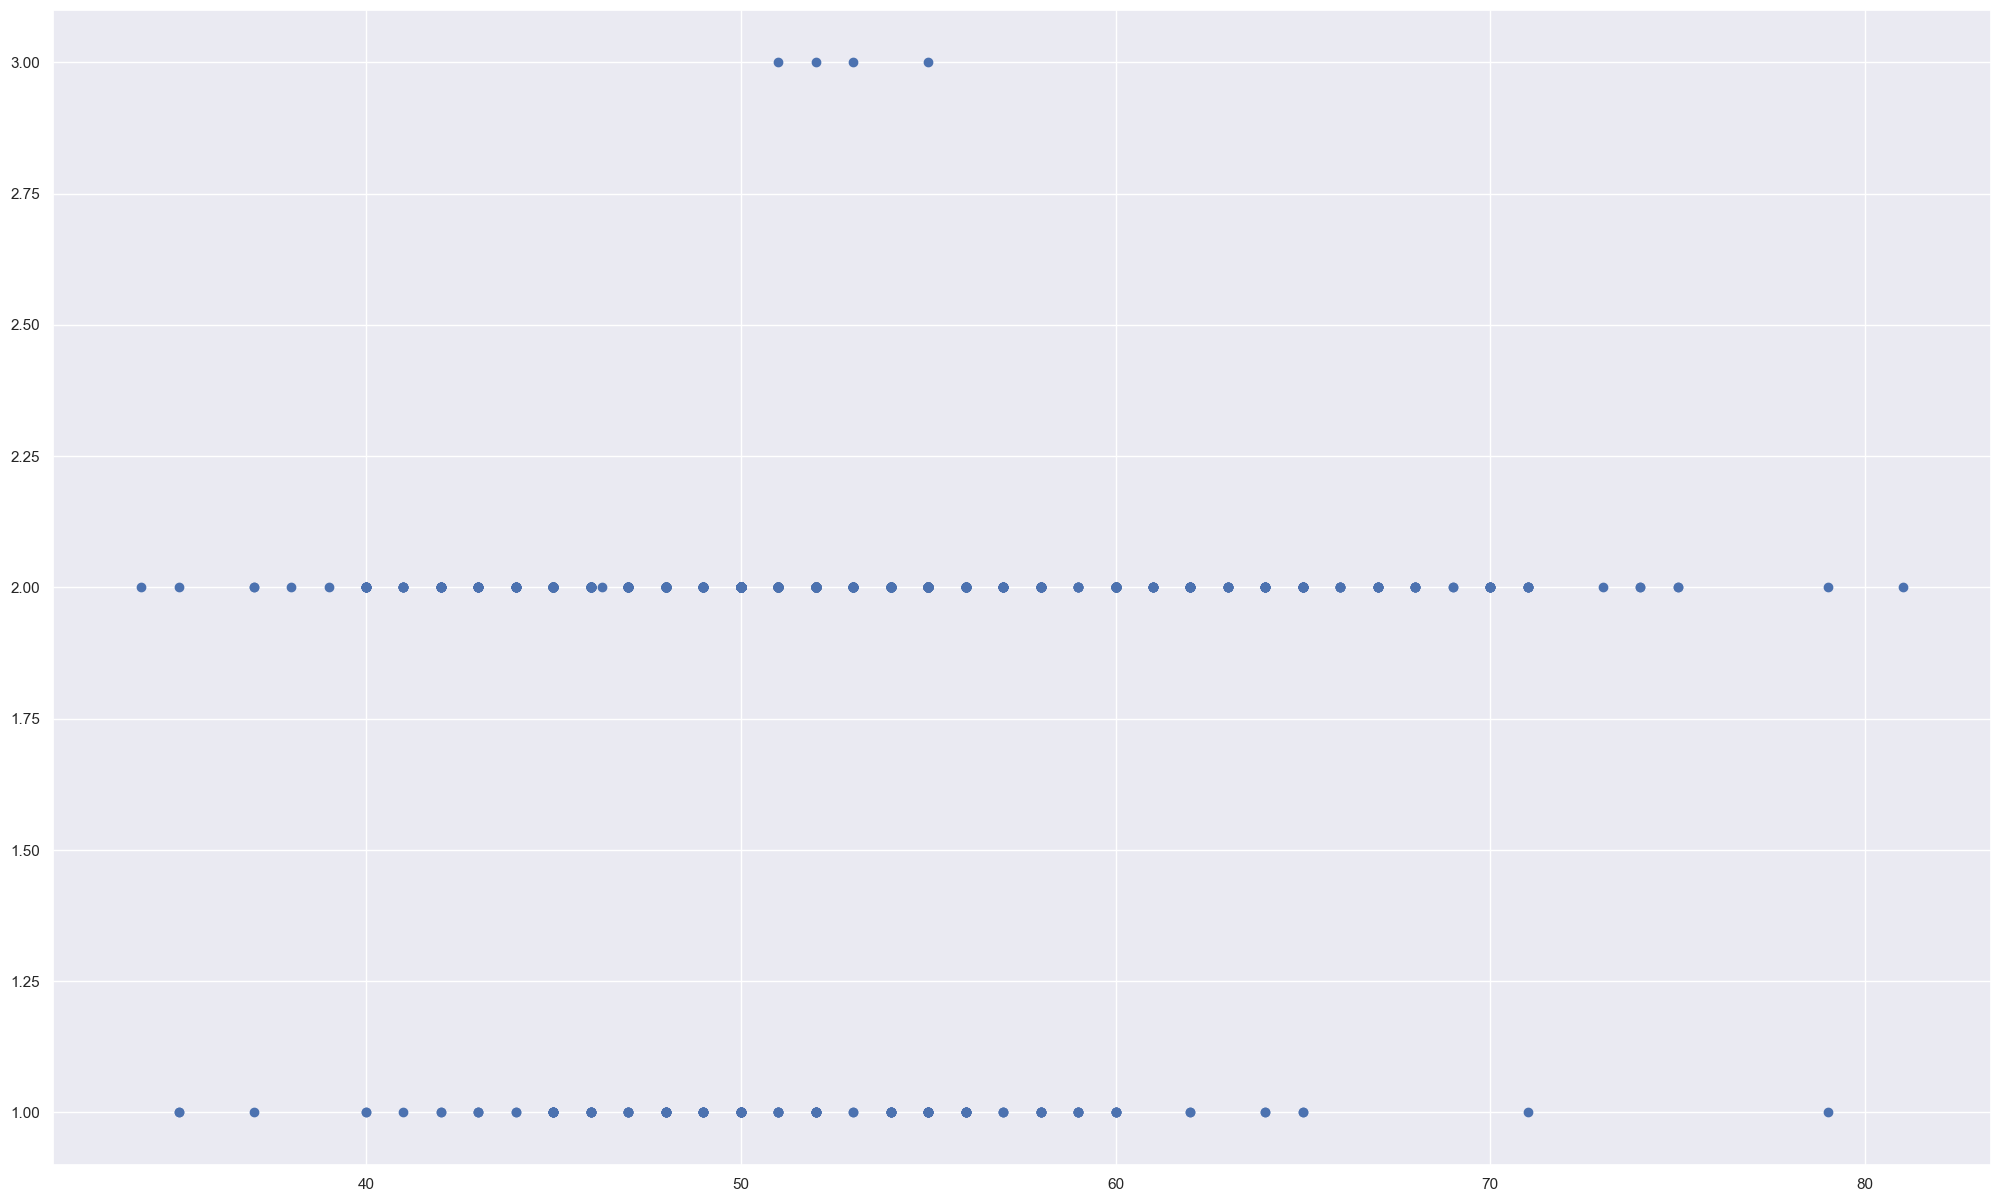

In [634]:
plt.scatter(X['FWt(kg)'], X['LNH'])
plt.show()

# Stupčasti grafovi

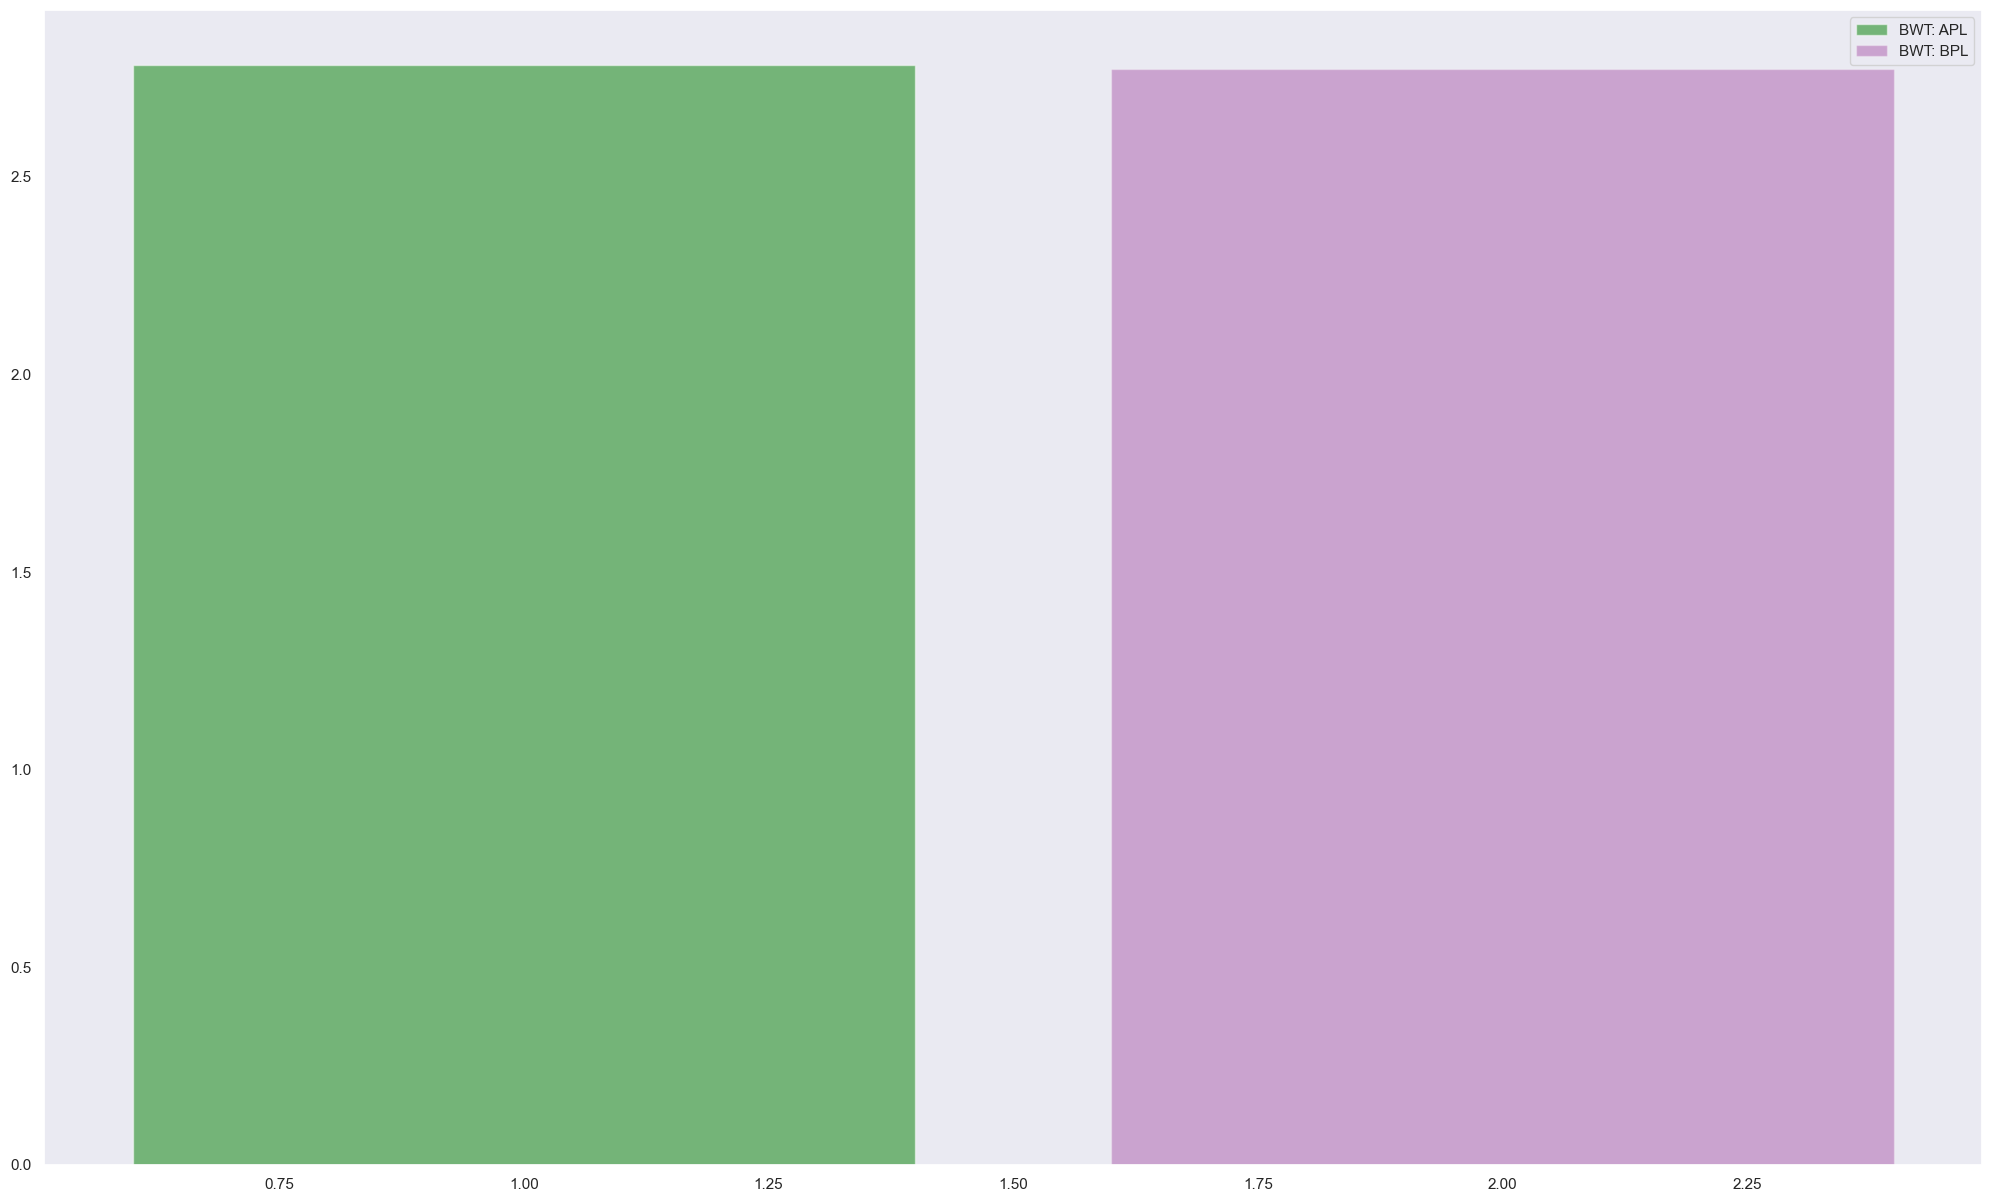

In [635]:
apl = X.loc[X.SEC == "APL"]
a = (X.SEC == "APL").sum()
prTezBebeA = apl['BWt(kg)'].mean()

bpl = X.loc[X.SEC == "BPL"]
b = (X.SEC == "BPL").sum()
prTezBebeB = bpl['BWt(kg)'].mean()



plt.bar(1, prTezBebeA, label='BWT: APL', color='green', alpha=0.5)
plt.bar(2, prTezBebeB, label='BWT: BPL', color='purple', alpha=0.3)
plt.legend(loc='best')
plt.grid()
plt.show()

#prosjek težine bebe u ovisnosti o socioekonomskom statusu

<BarContainer object of 1 artists>

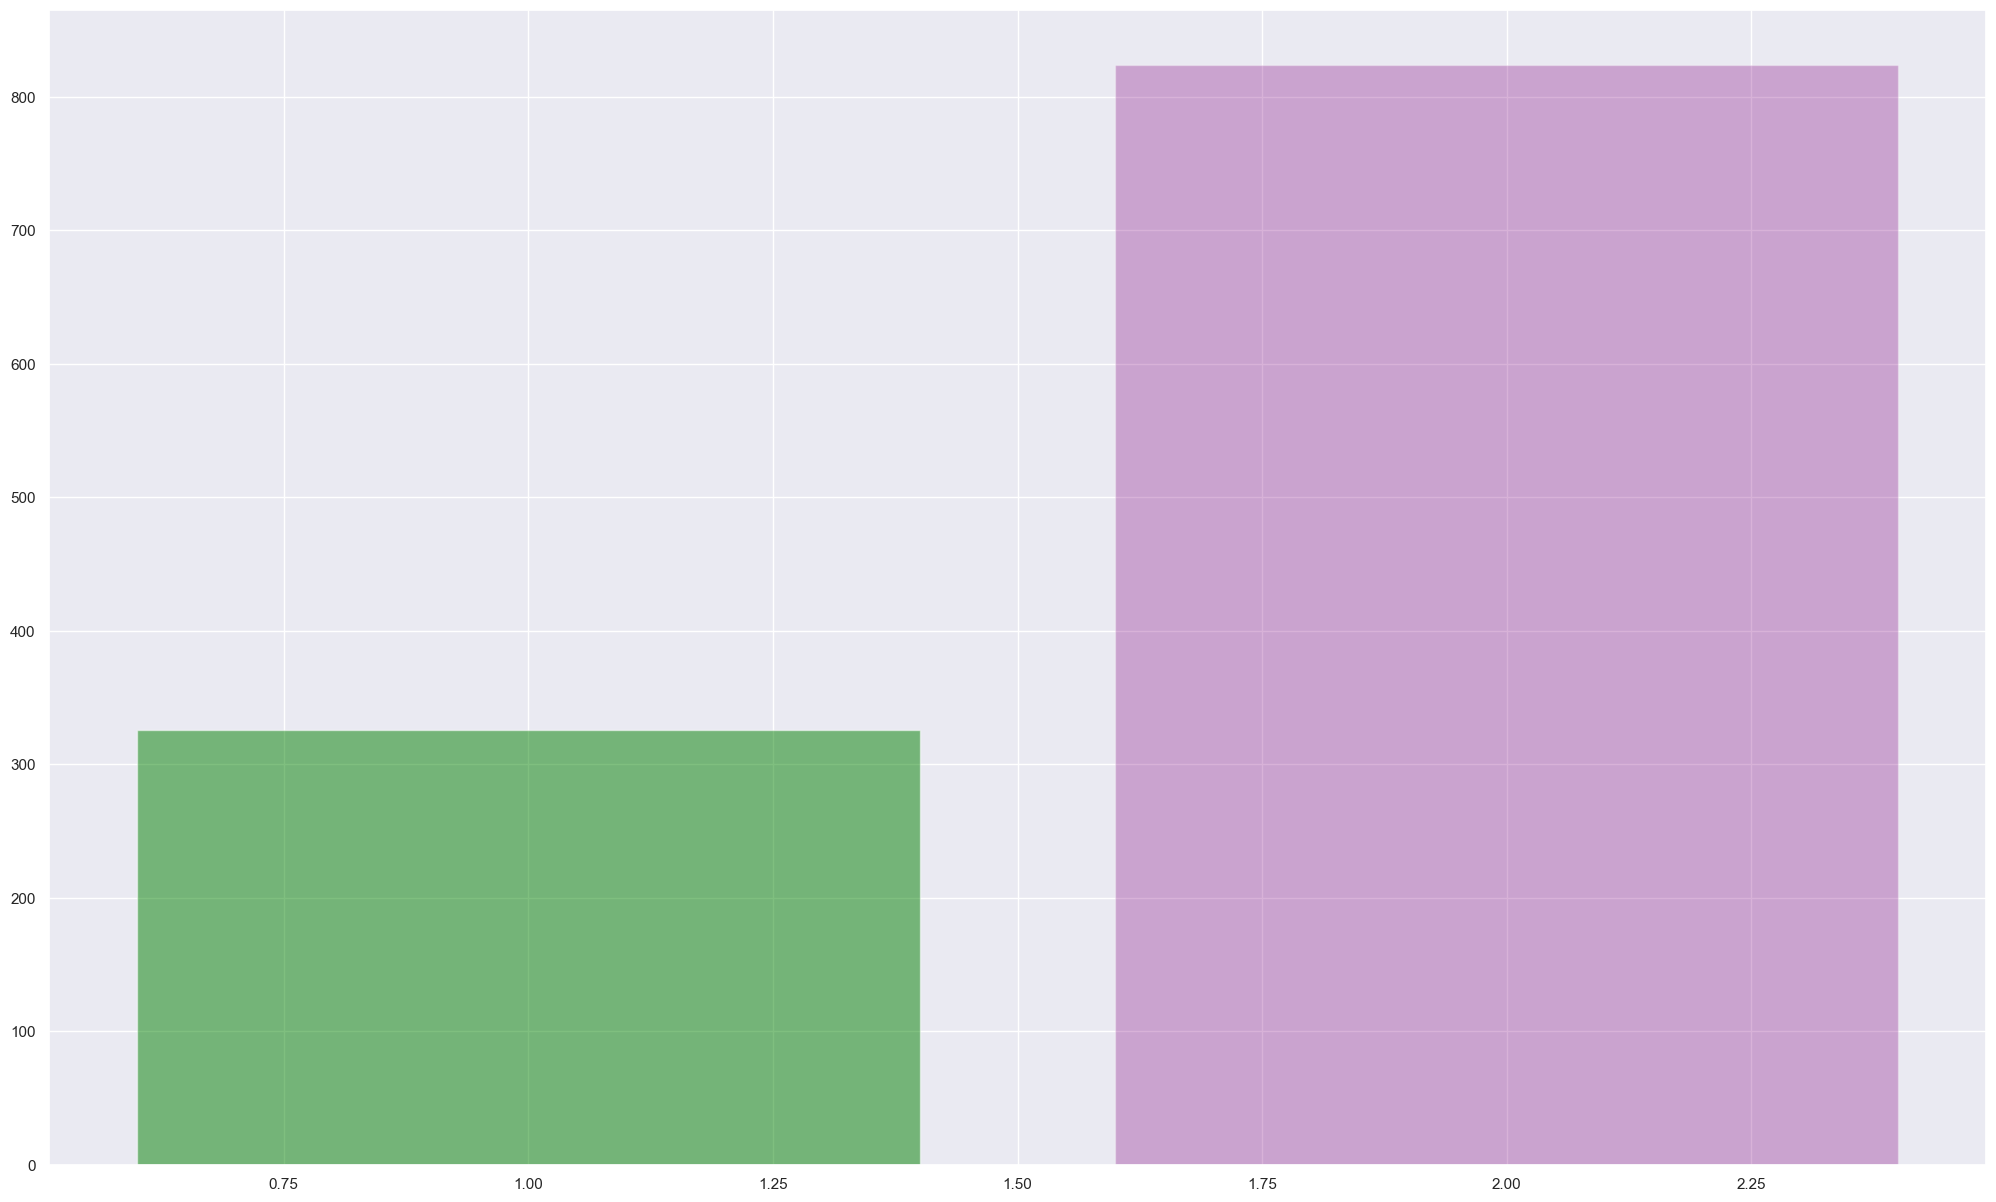

In [636]:
plt.bar(1, a, label='APL', color='green', alpha=0.5)
plt.bar(2, b, label='BPL', color='purple', alpha=0.3)

#koliko je osoba iznad, a koliko ispod granice siromaštva

# Toplinska mapa korelacije numeričkih značajki

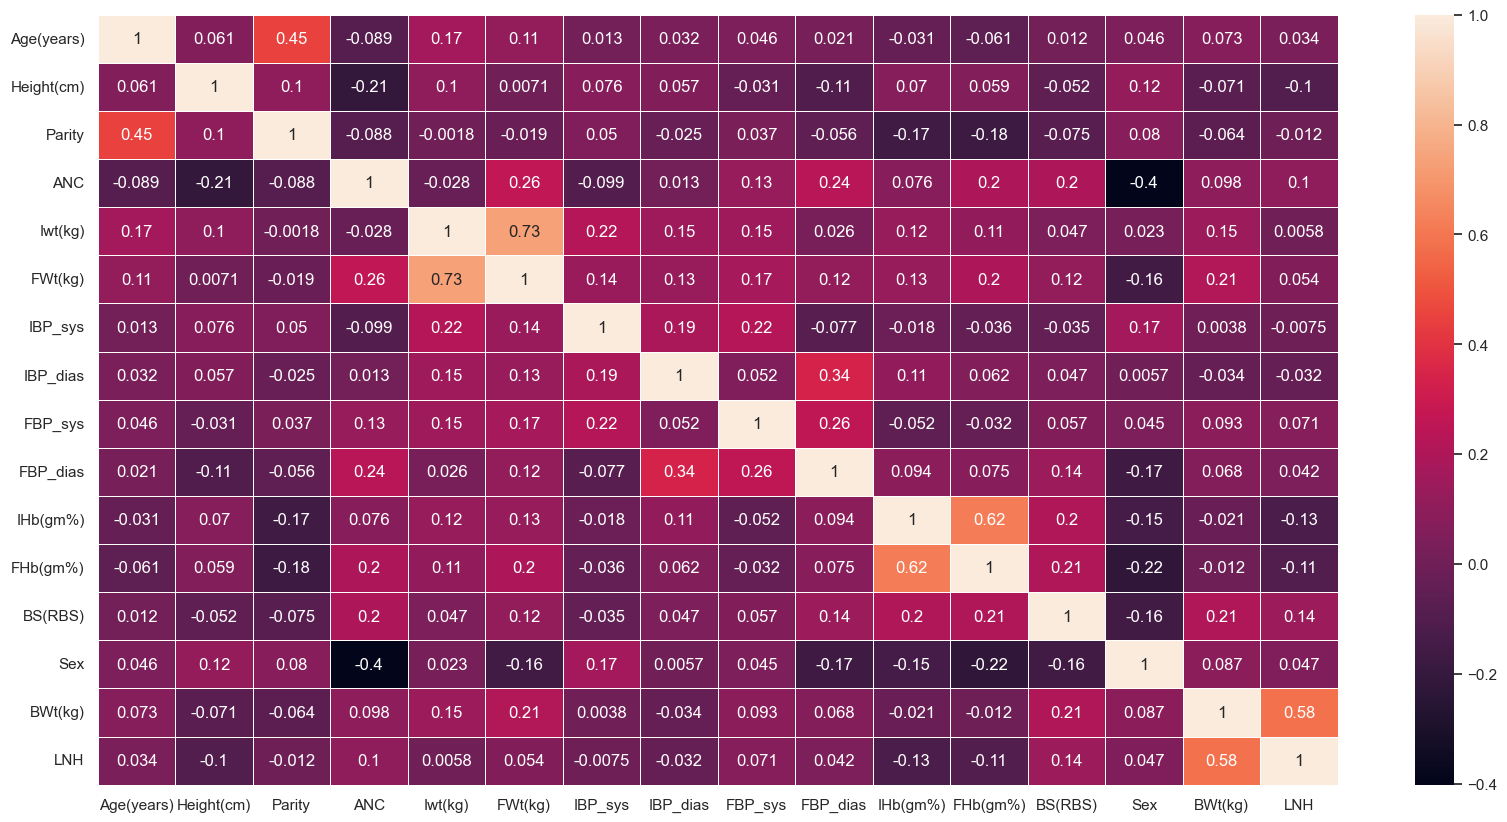

In [637]:
sns.set(rc={'figure.figsize':(20,10)})
X_numeric = X.loc[:,~X.columns.isin(['SEC', 'Bgroup', 'Term/Preterm'])]
sns.heatmap(X_numeric.corr(), annot=True, linewidths=.5)
plt.show()

Vidimo kako su značajke početne i konačne težine, tlaka i razine hemoglobina visoko korelirane, dok je npr. korelacija između tlaka i broja prethodnih trudnoća vrlo niska.

# Matrica dijagrama raspršenja

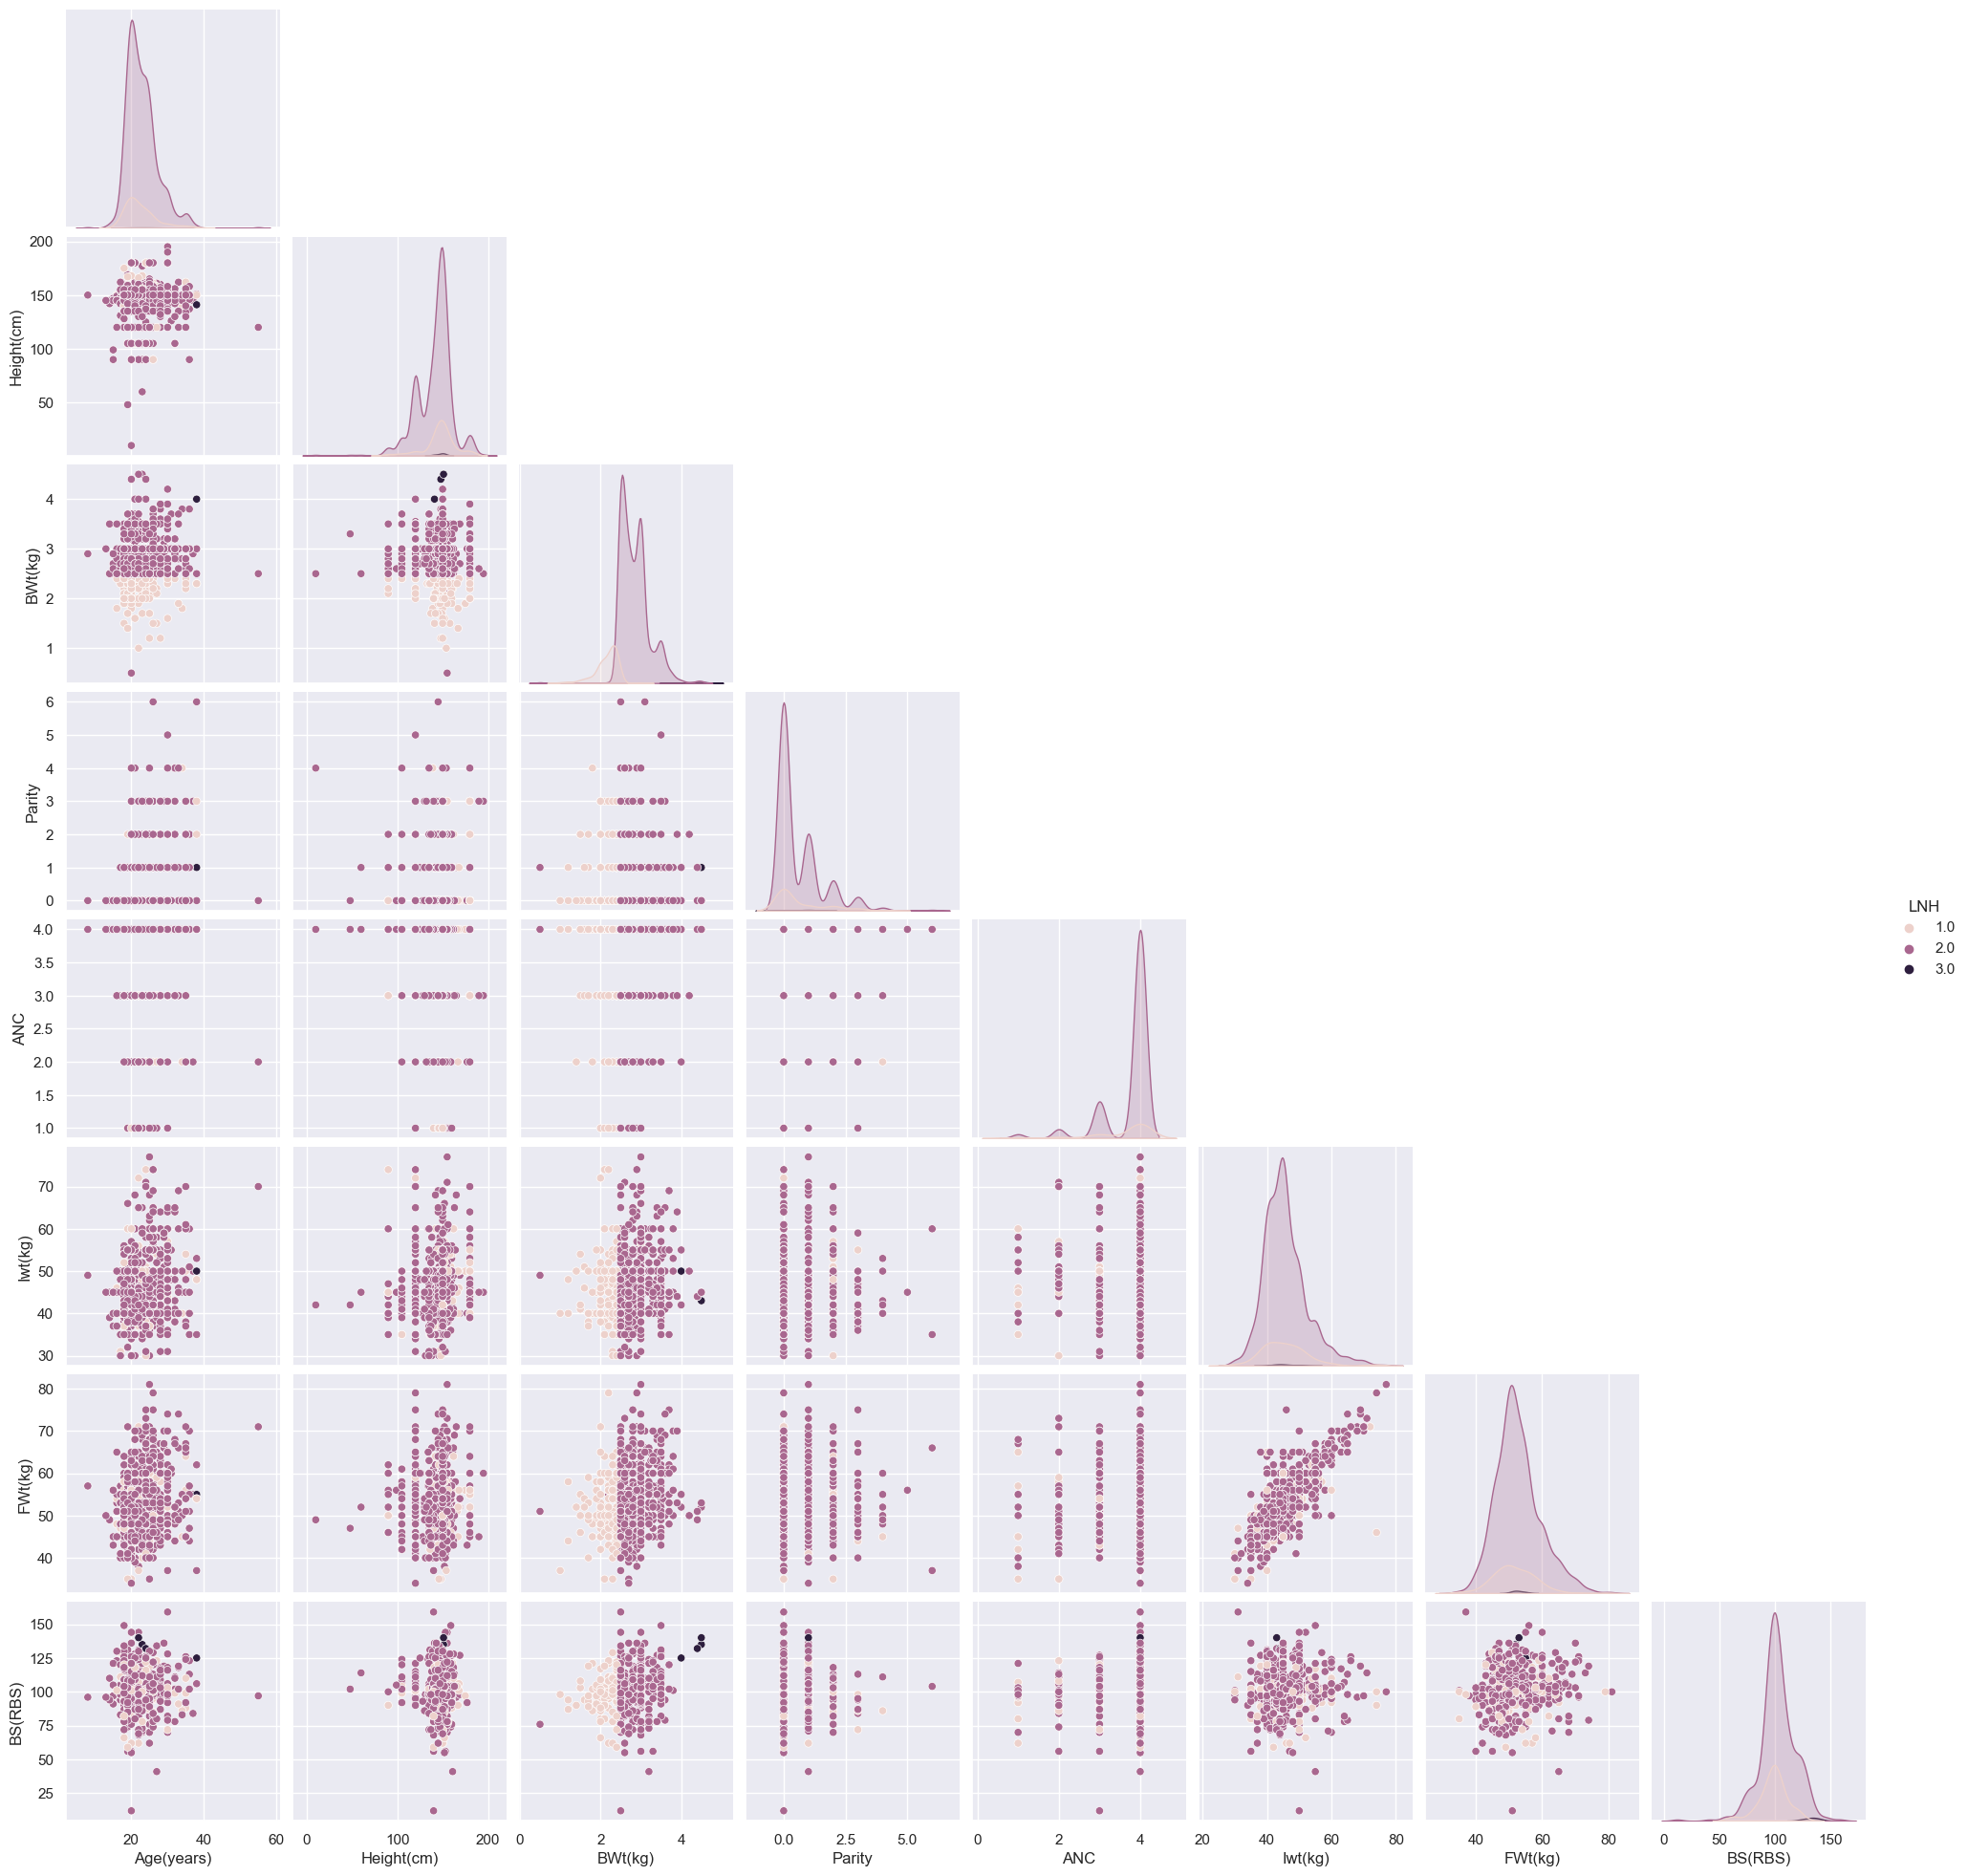

In [638]:
sns.set(rc={'figure.figsize':(25,15)})
sns.pairplot(X.loc[:,['Age(years)', 'Height(cm)', 'BWt(kg)', 'Parity', 'ANC', 'Iwt(kg)', 'FWt(kg)', 'BS(RBS)', 'LNH']], hue="LNH", corner=True)
plt.show()

Prikaz raspršenih grafova u matričnom obliku. Boje oznaka u skladu su sa značajkom LNH. Prikazana je i distribucija samih značajki.

# Nepreklapajući graf

C:\Users\muha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\categorical.py:3543: UserWarning: 27.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\muha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\categorical.py:3543: UserWarning: 26.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\muha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\categorical.py:3543: UserWarning: 50.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\muha\AppData\Local\Packages\PythonSoftwa

C:\Users\muha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\categorical.py:3543: UserWarning: 38.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\muha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\categorical.py:3543: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\muha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\categorical.py:3543: UserWarning: 16.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\muha\AppData\Local\Packages\PythonSoftwar

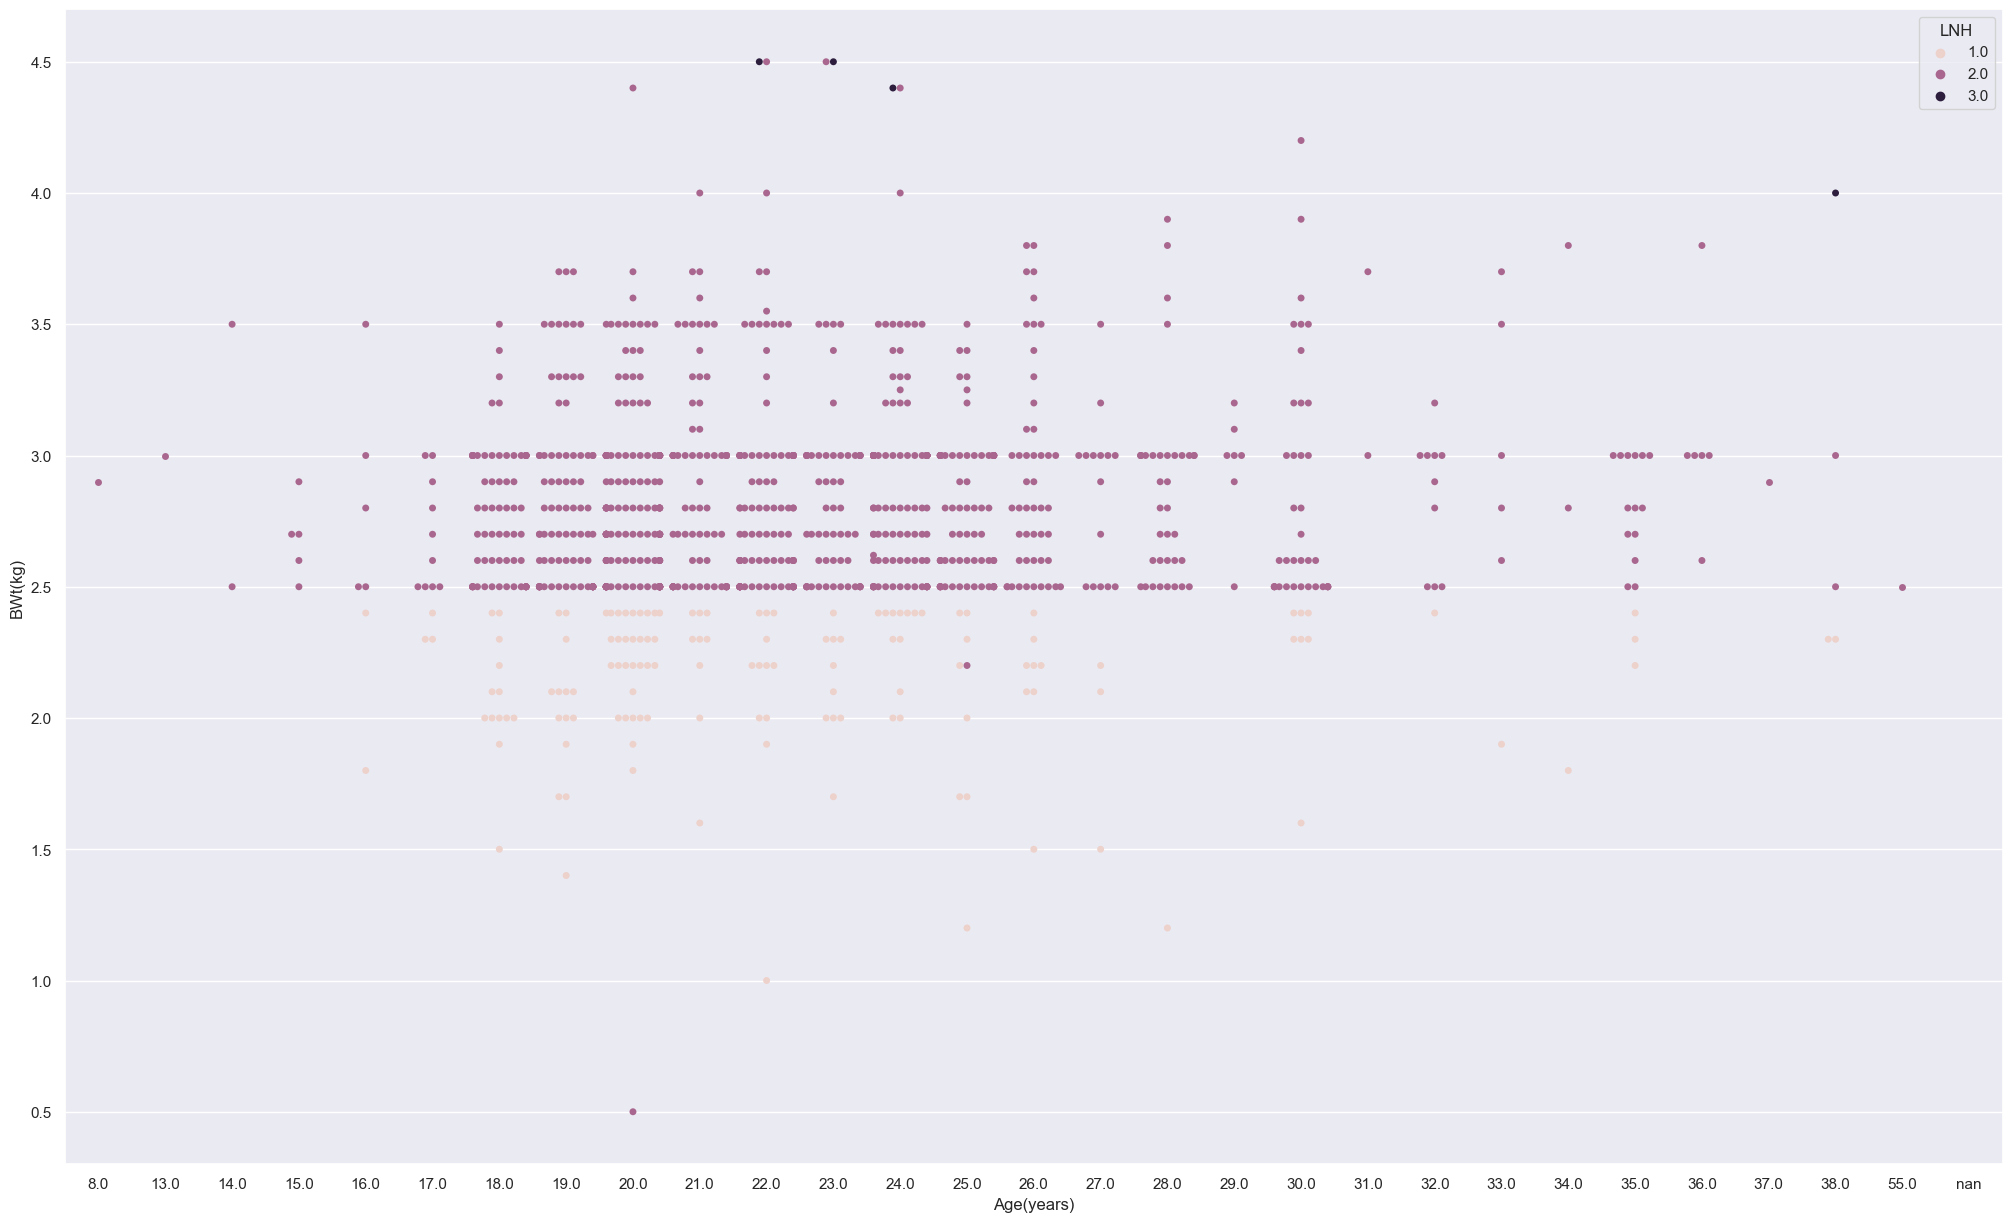

In [639]:
#nepreklapajući graf: dob majke, masa bebe
sns.set(rc={'figure.figsize':(25,15)})
sns.swarmplot(x='Age(years)', y="BWt(kg)", data=X, hue="LNH")
plt.show()

Također, boje oznaka odnose se na značajku LNH.

# Vrijednosti deskriptivne statistike

#count - predstavlja ukupni broj vrijednosti u stupcima<br>
#unique - broji jedinstvene vrijednosti<br>
#top - dominantna vrijednost (mod) D<br>
#freq - frekvencija dominantne vrijednosti<br>
#mean - aritmetička sredina M<br>
#std - standardna devijacija<br>
#min - najmanja vrijednost<br>
#25% - Q1<br>
#50% - Q2 = Centralna vrijednost (medijan) C<br>
#75% - Q3<br>
#max - Q4, gornja granica<br>

In [550]:
df = pd.read_csv("CBWDB.csv")
df.describe(include='all')

,SEC,Age(years),Height(cm),Bgroup,Parity,ANC,Iwt(kg),FWt(kg),IBP_sys,IBP_dias,FBP_sys,FBP_dias,IHb(gm%),FHb(gm%),BS(RBS),Term/Preterm,Sex,BWt(kg),LNH
count,1150,1786.000000,1527.000000,798,1767.000000,1781.000000,1751.000000,1739.000000,1760.000000,1760.000000,1749.000000,1748.000000,1395.000000,1393.000000,608.000000,962,1142,1072.000000,1072.000000
unique,2,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN
top,BPL,NaN,NaN,NIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T,M,NaN,NaN
freq,824,NaN,NaN,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,890,598,NaN,NaN
mean,NaN,22.986002,143.785855,NaN,0.667233,3.423358,45.749857,51.645371,108.032386,66.091477,111.819325,69.405606,9.919398,10.401651,100.898026,NaN,NaN,2.759580,1.871269
std,NaN,4.050843,19.702879,NaN,0.993277,0.889005,6.655457,6.905943,12.021658,8.263232,11.809435,9.249682,1.052058,0.989487,17.251874,NaN,NaN,0.430413,0.346026
min,NaN,8.000000,10.000000,NaN,0.000000,1.000000,30.000000,30.000000,10.000000,14.000000,10.000000,10.000000,6.000000,1.500000,12.000000,NaN,NaN,0.500000,1.000000
25%,NaN,20.000000,135.000000,NaN,0.000000,3.000000,41.000000,47.000000,100.000000,60.000000,110.000000,60.000000,9.200000,10.000000,93.000000,NaN,NaN,2.500000,2.000000
50%,NaN,22.000000,150.000000,NaN,0.000000,4.000000,45.000000,51.000000,110.000000,66.000000,110.000000,70.000000,10.000000,10.400000,100.000000,NaN,NaN,2.700000,2.000000
75%,NaN,25.000000,150.000000,NaN,1.000000,4.000000,50.000000,55.000000,112.000000,70.000000,120.000000,78.000000,10.600000,11.000000,109.000000,NaN,NaN,3.000000,2.000000


Parametri deskriptivne statistike za značajku BWt

In [640]:
df['BWt(kg)'].mean()

2.7595802238805973

In [641]:
df['BWt(kg)'].median()

2.7

In [642]:
df['BWt(kg)'].mode()

0    2.5
Name: BWt(kg), dtype: float64

In [643]:
df['BWt(kg)'].min()

0.5

In [644]:
df['BWt(kg)'].max()

4.5

In [645]:
df['BWt(kg)'].std()

0.4304130332355594

In [646]:
df['BWt(kg)'].var()

0.18525537917903478

In [647]:
df['BWt(kg)'].std() / df['BWt(kg)'].mean() * 100

15.597047315779818

Histogram za značajku BWt s prikazom meana i mediana:

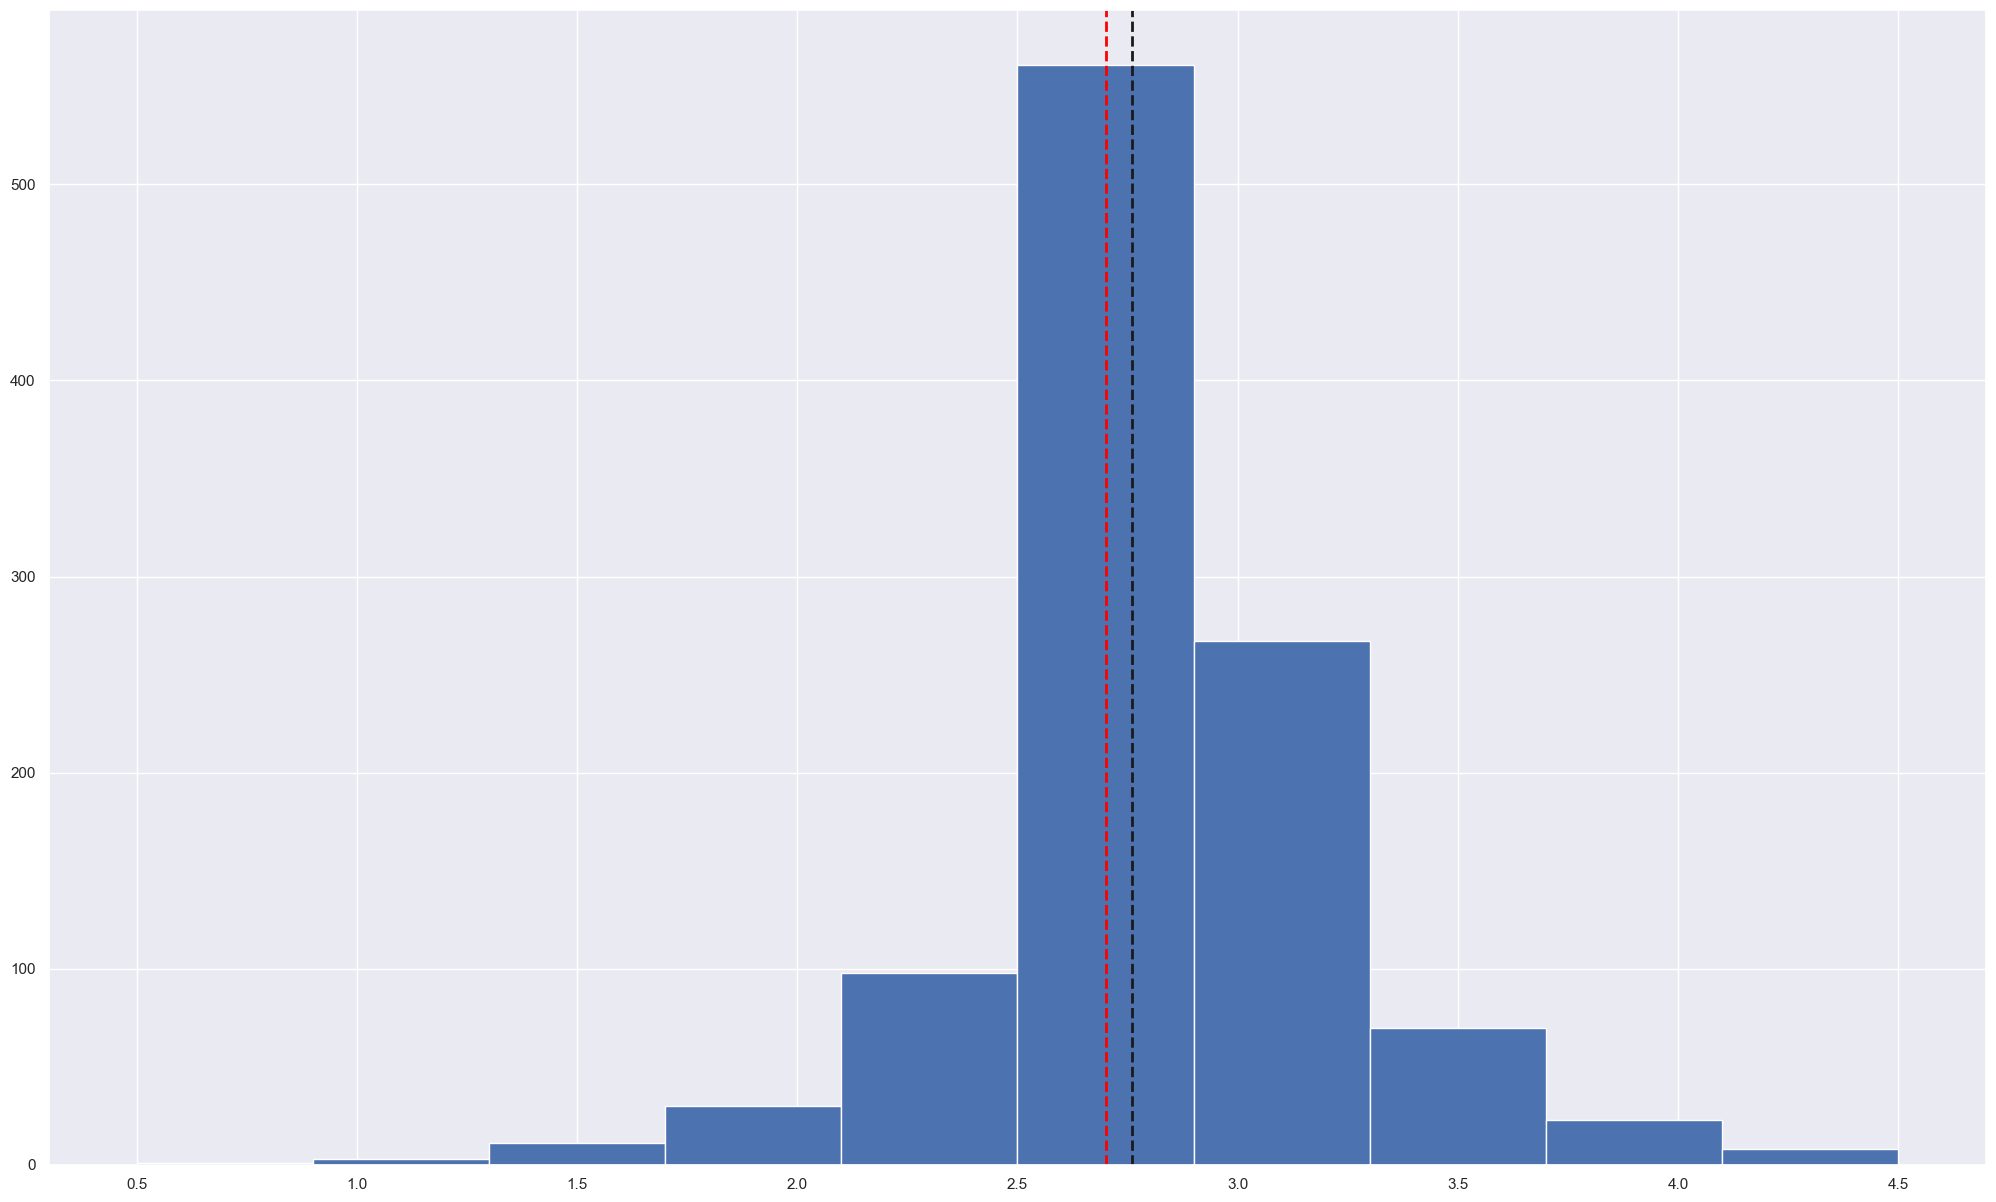

In [652]:
plt.hist(df['BWt(kg)'])
plt.axvline(df['BWt(kg)'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(df['BWt(kg)'].median(), color='red', linestyle='dashed', linewidth=2)

plt.show()

Histogram za značajku Age s prikazom meana i mediana:

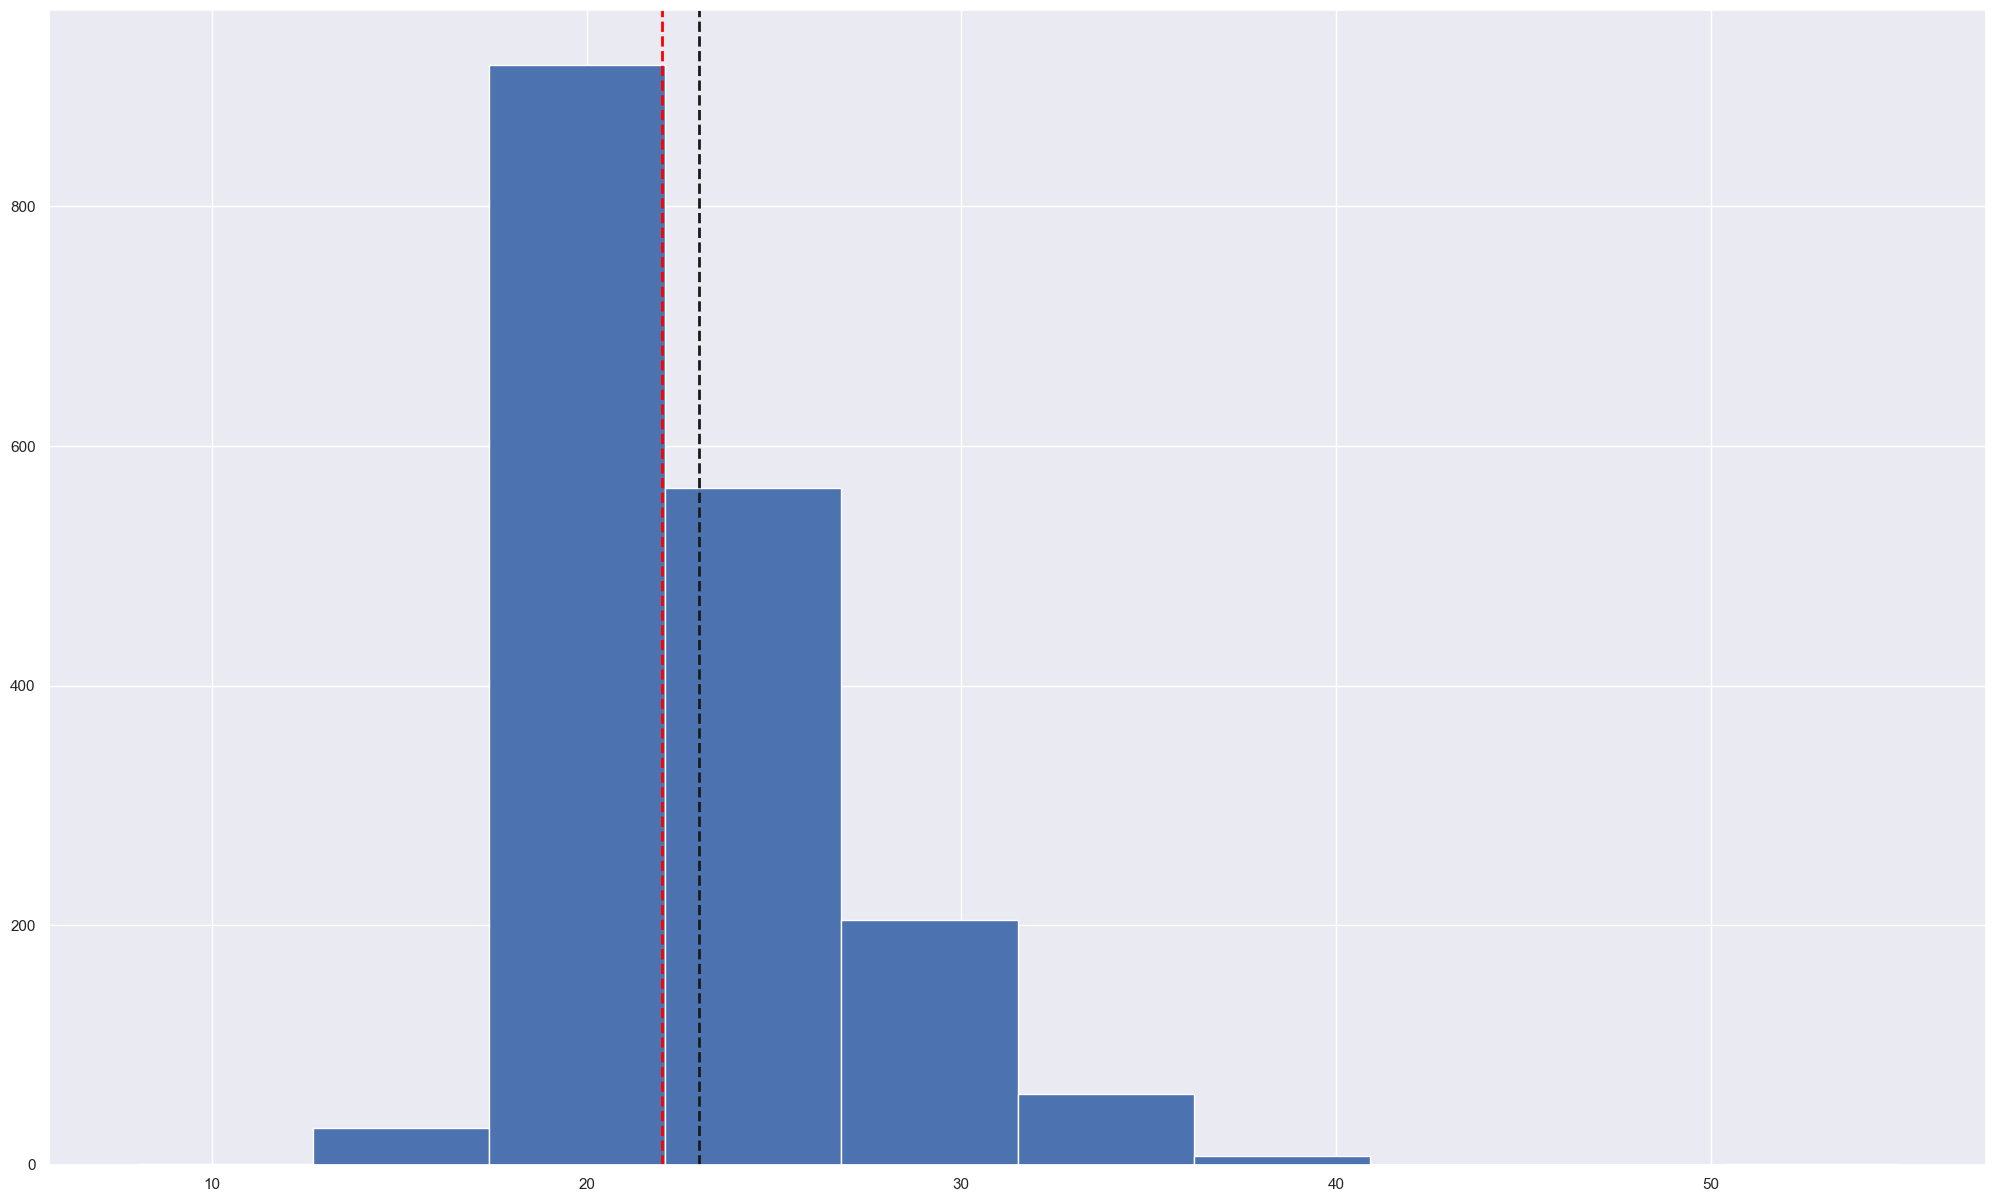

In [654]:
plt.hist(df['Age(years)'])
plt.axvline(df['Age(years)'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(df['Age(years)'].median(), color='red', linestyle='dashed', linewidth=2)

plt.show()

Histogram za značajku BS s prikazom meana i mediana:

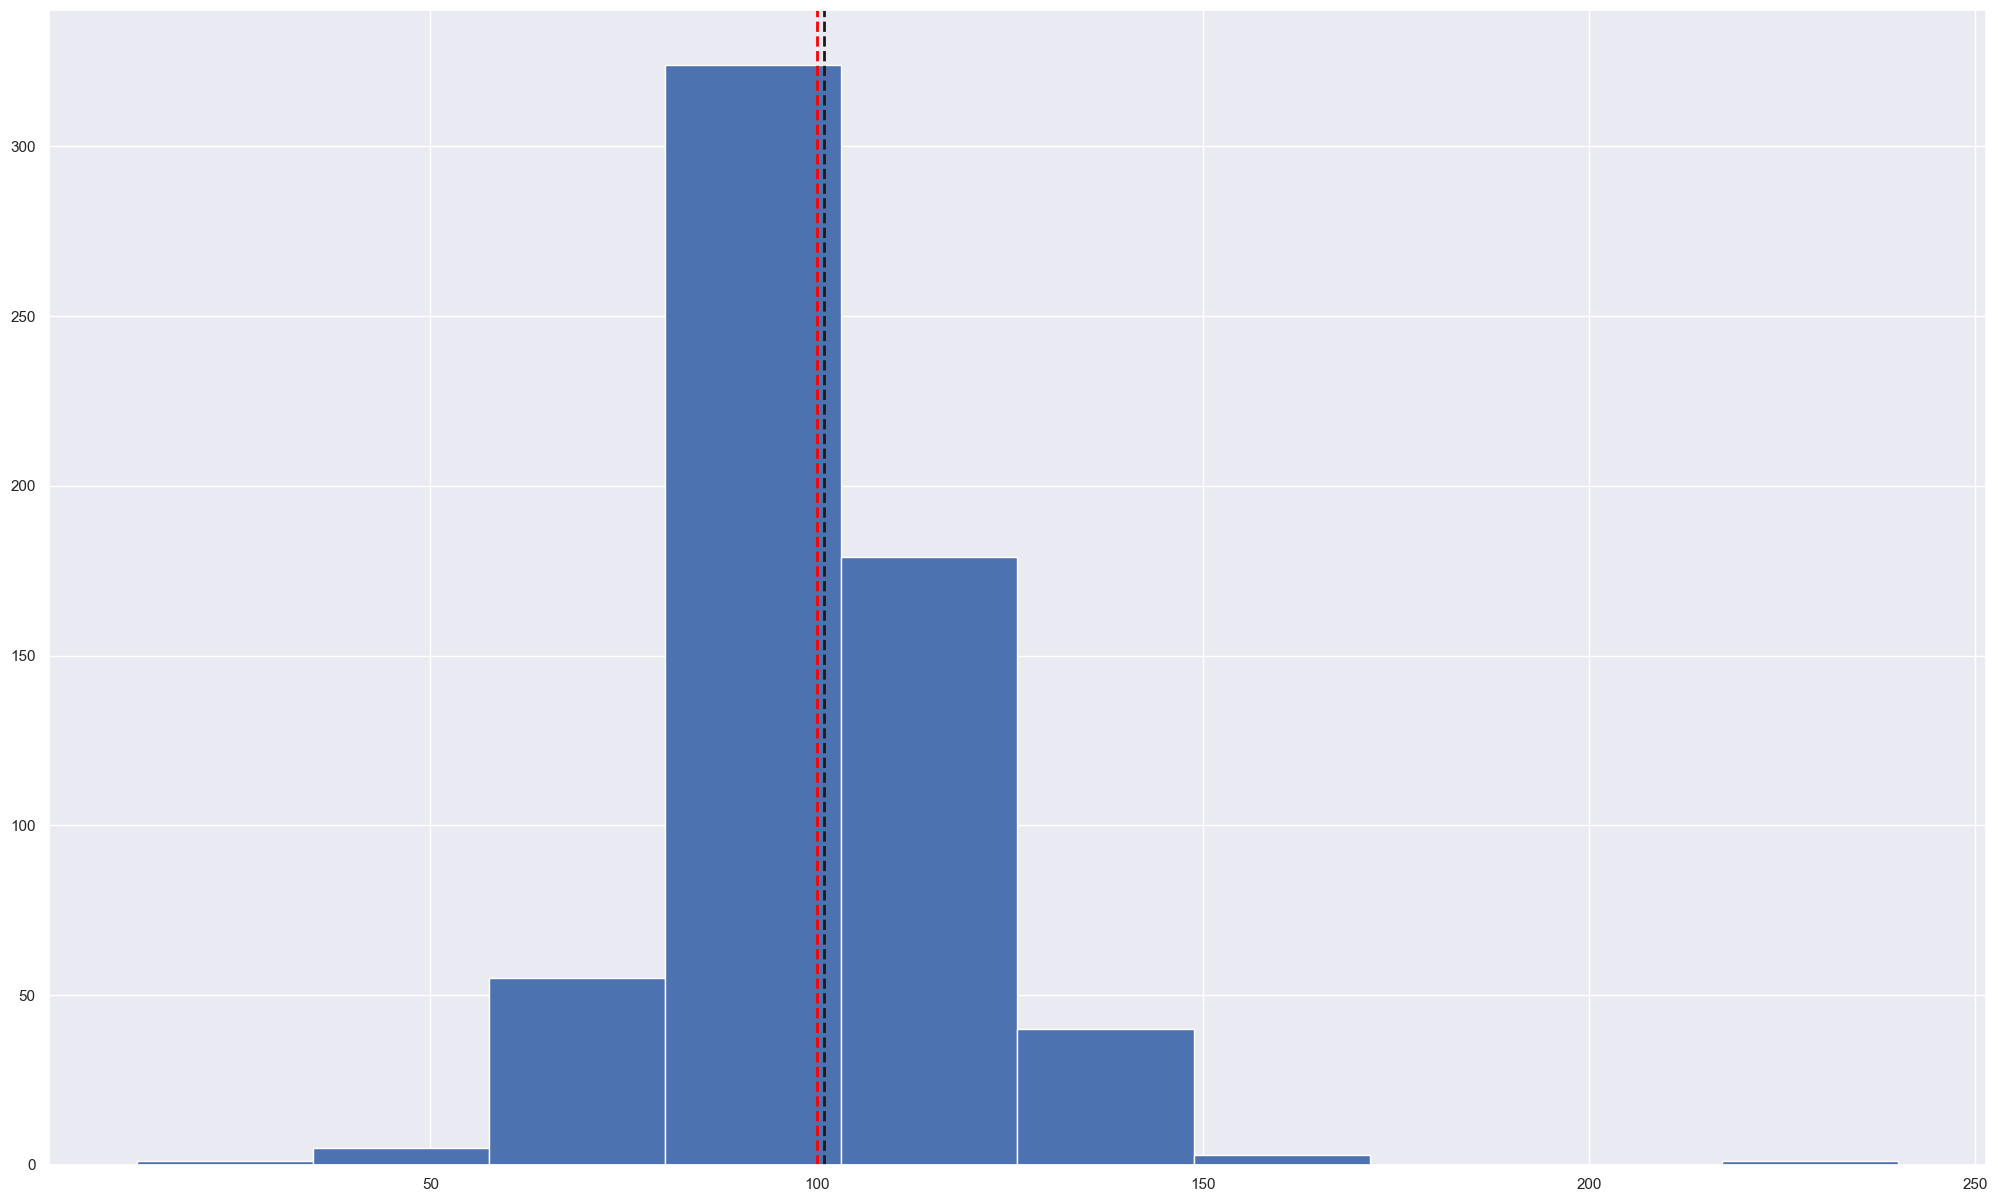

In [655]:
plt.hist(df['BS(RBS)'])
plt.axvline(df['BS(RBS)'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(df['BS(RBS)'].median(), color='red', linestyle='dashed', linewidth=2)

plt.show()

Histogram za značajku Height s prikazom meana i mediana:

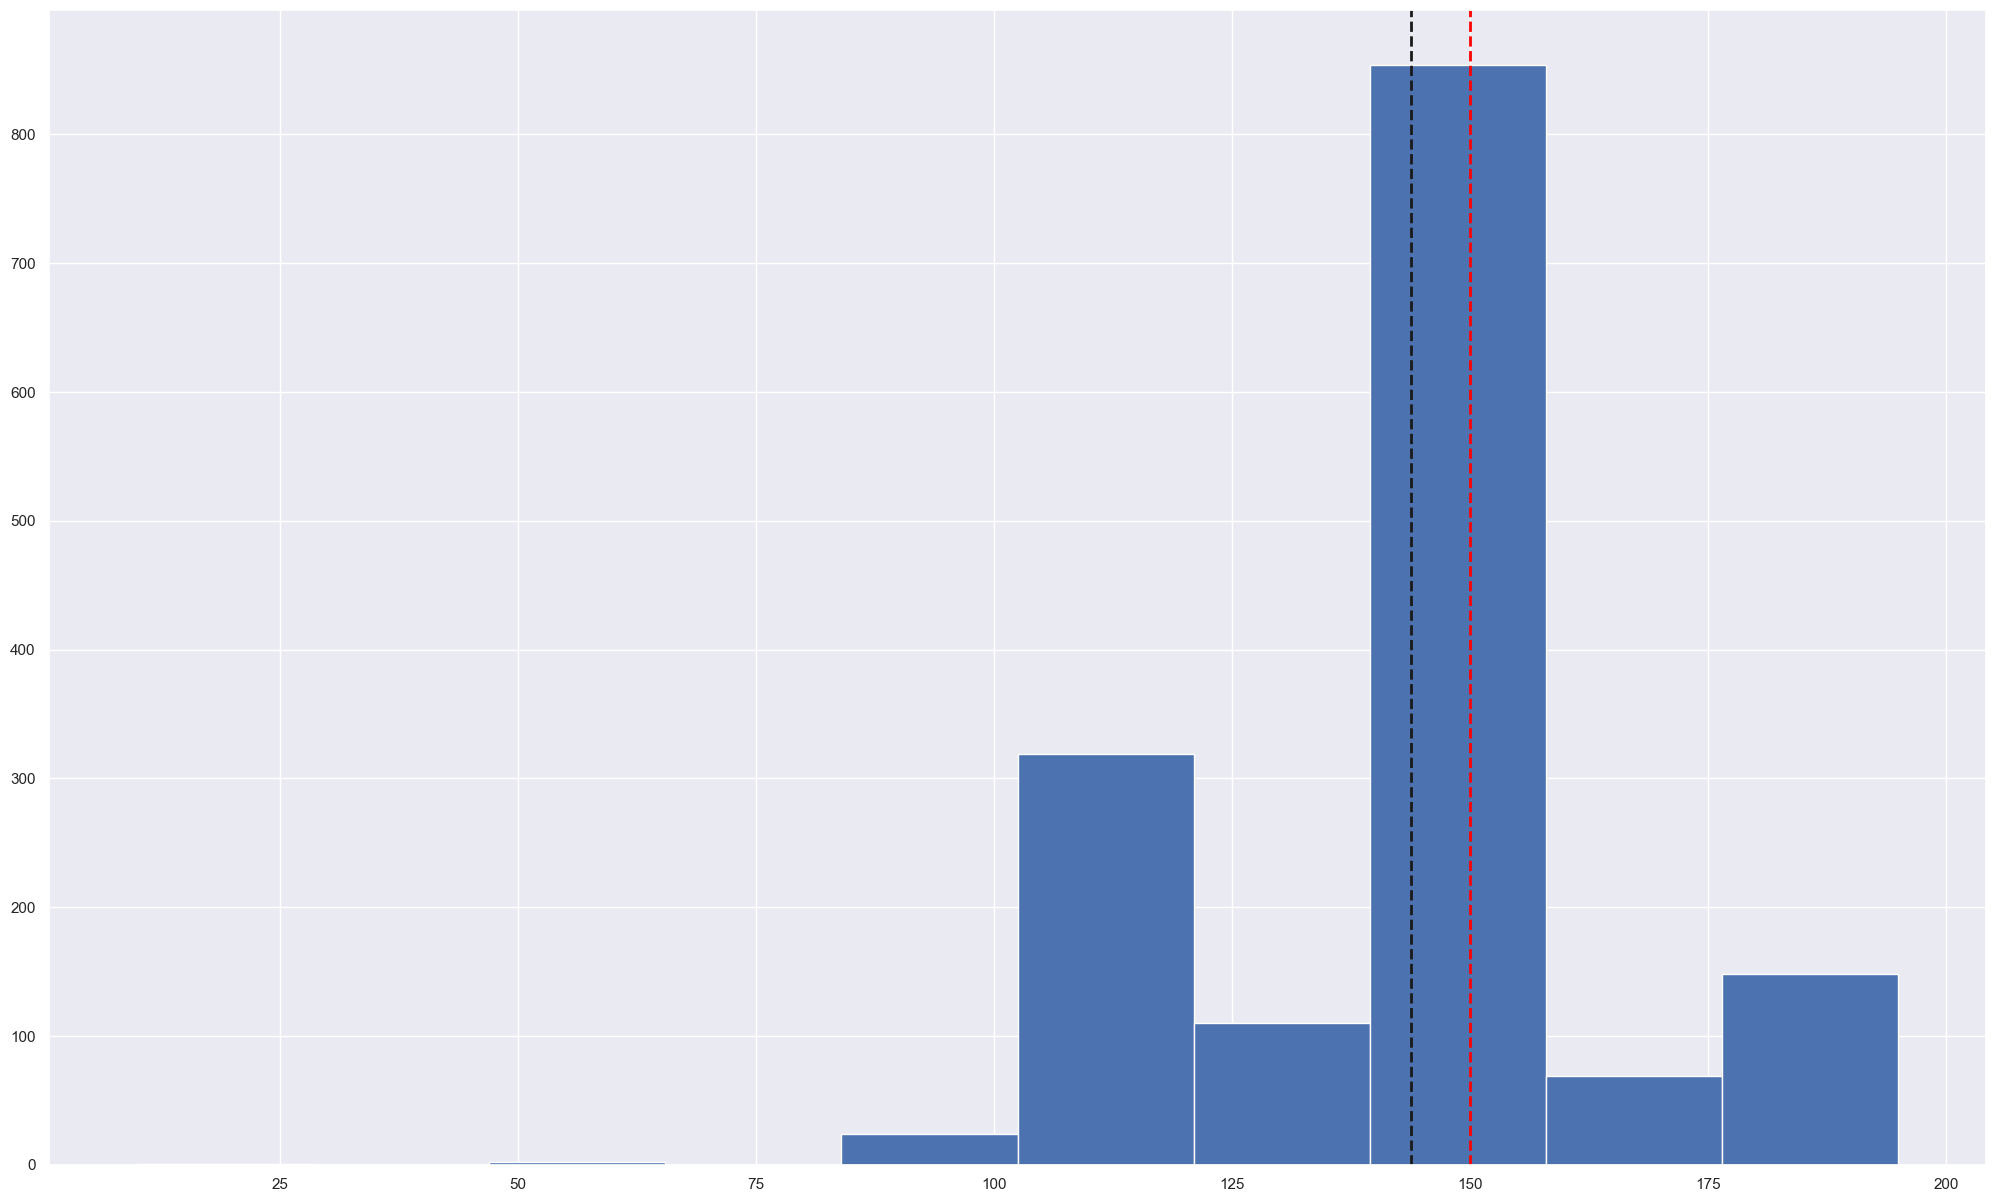

In [657]:
plt.hist(df['Height(cm)'])
plt.axvline(df['Height(cm)'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(df['Height(cm)'].median(), color='red', linestyle='dashed', linewidth=2)

plt.show()

Vrijednosti deskriptivne statistike značajki grupiranih po LNH:

In [658]:
df.groupby('LNH').describe().transpose()

LNH                      1.0         2.0        3.0
Age(years) count  142.000000  923.000000   4.000000
           mean    22.556338   22.856988  26.750000
           std      4.433151    4.254017   7.544314
           min     16.000000    8.000000  22.000000
           25%     20.000000   20.000000  22.750000
...                      ...         ...        ...
BWt(kg)    min      1.000000    0.500000   4.000000
           25%      2.000000    2.500000   4.300000
           50%      2.200000    2.800000   4.450000
           75%      2.400000    3.000000   4.500000
           max      3.000000    4.500000   4.500000

[112 rows x 3 columns]

# Z-test
Nulta hipoteza: socio-ekonomski status ne utječe na masu bebe<br>
Alternativna hipoteza: socio-ekonomski status utječe na masu bebe

In [659]:
from statsmodels.stats.weightstats import ztest as ztest

In [660]:
BPLClass = df.query('SEC == "BPL"')
APLClass = df.query('SEC == "APL"')

BPLClass_sample = BPLClass.sample(n=100, random_state=1)
APLClass_sample = APLClass.sample(n=100, random_state=1)

In [661]:
df.groupby('SEC')['LNH'].mean()

SEC
APL    1.844898
BPL    1.886762
Name: LNH, dtype: float64

Vidimo kako LNH ne ovisi o socioekonomskom statusu.

<AxesSubplot: >

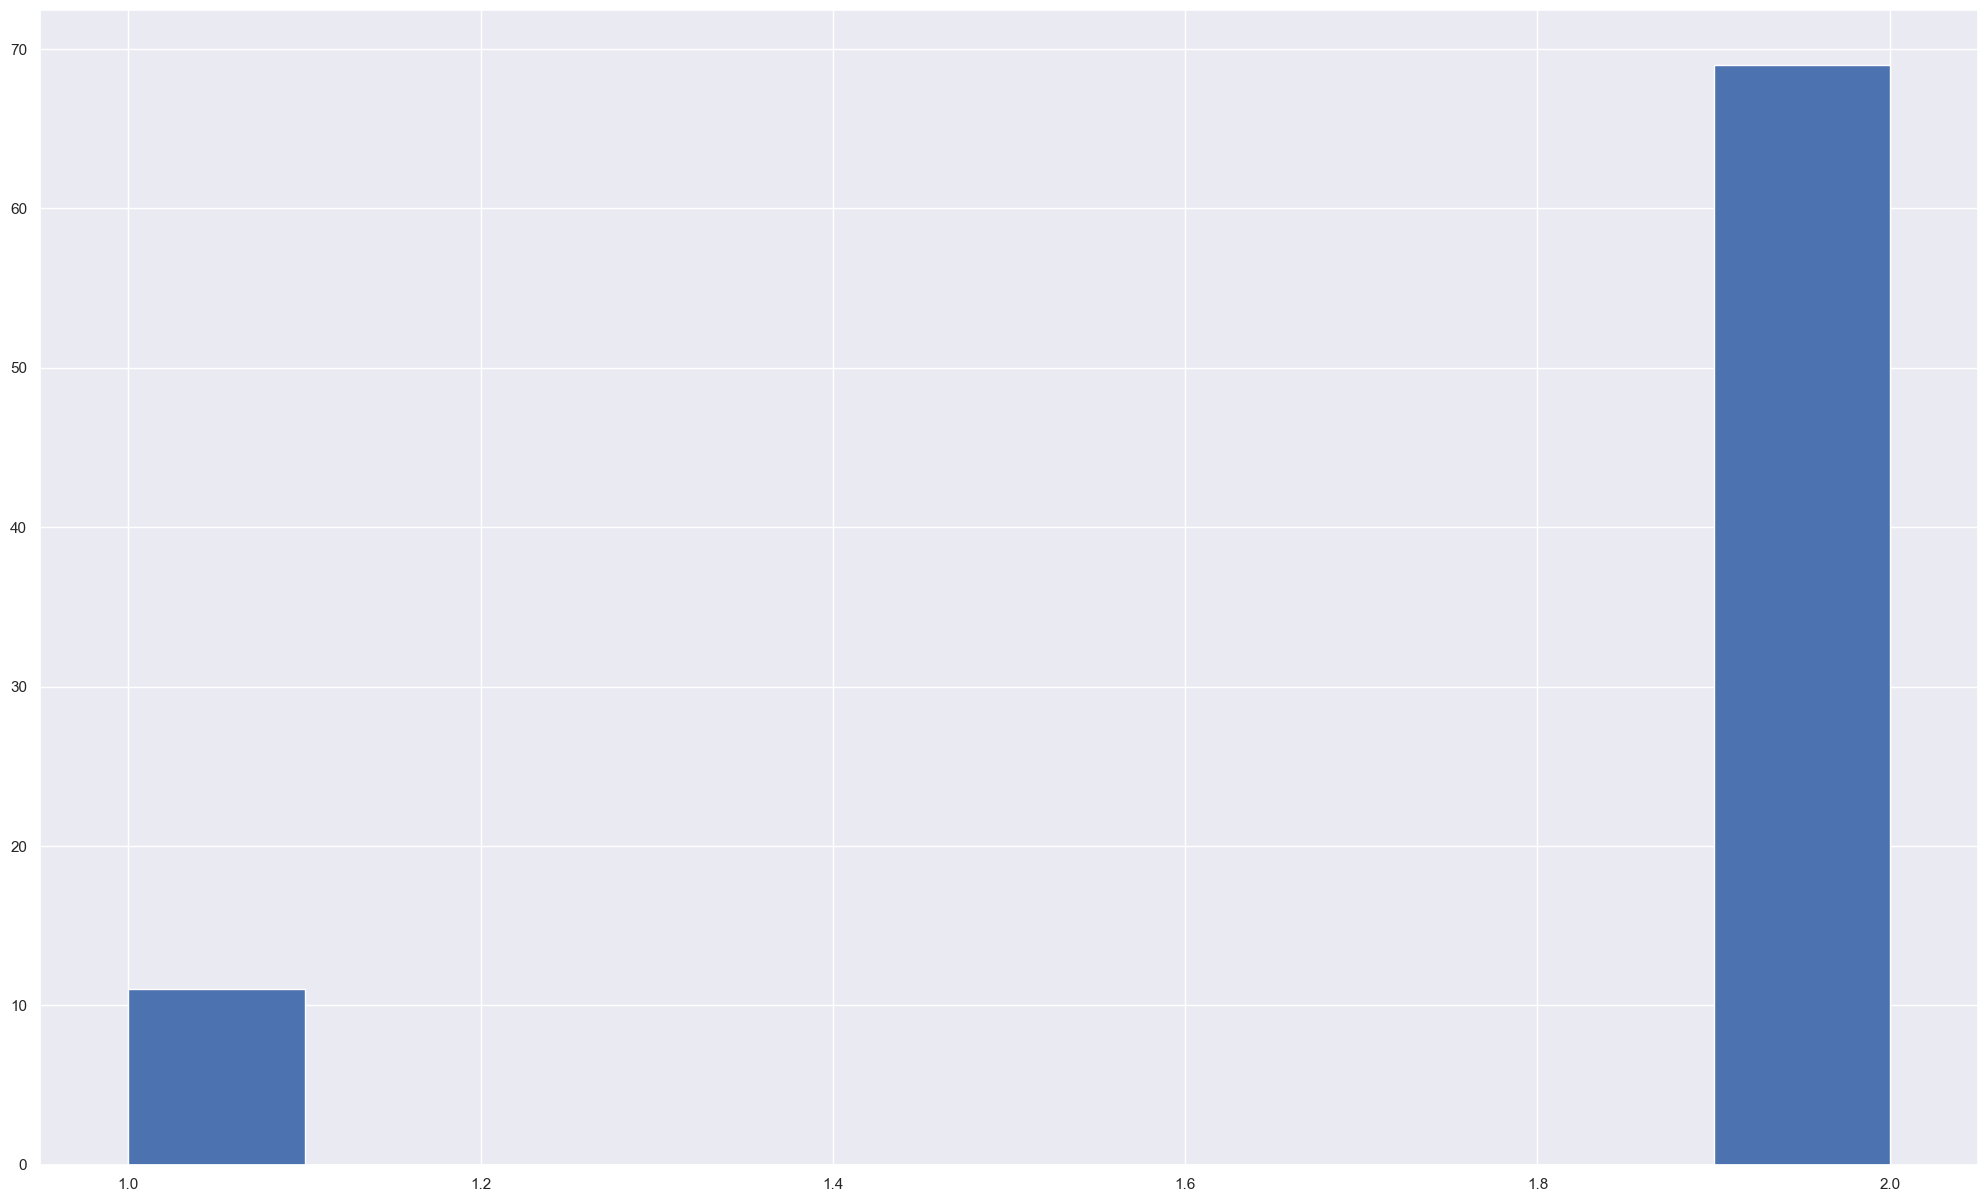

In [662]:
BPLClass_sample['LNH'].hist()

# Je li razdioba Gaussova

In [669]:
from scipy.stats import shapiro
stat, p = shapiro(BPLClass_sample['LNH'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=nan, p=1.000
Probably Gaussian
